# Init and load data

In [4]:
import sys
import socket
print("Working node:", socket.gethostname())
sys.path.append('/workspace/projects/clustering_3d/o3d_analysys/o3d_paper/')
from global_variables import *

Working node: bbgn021


In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import numpy as np
import json
import re

In [6]:
## O3D RUN
input_path = "/workspace/projects/clustering_3d/o3d_analysys/datasets/input/cancer_202404"
cohort_df = pd.read_csv(f"{input_path}/cohorts.tsv", sep="\t")
cohort_df = cohort_df[~cohort_df.COHORT.str.startswith("ICGC")].reset_index(drop=True)
oncotree_df = pd.read_csv(f"{input_path}/oncotree.tsv", sep="\t")
datasets = f"/workspace/projects/clustering_3d/o3d_analysys/datasets/output"
o3d_output_dir = f"{datasets}/cancer_202404/o3d_output/human_mane_raw/{RUN}"

## O3D DATA

# General
o3d_datasets = "/workspace/nobackup/scratch/oncodrive3d/datasets_mane_240506"
o3d_annotations = "/workspace/nobackup/scratch/oncodrive3d/annotations_mane_240506"
o3d_seq_df = pd.read_table(f"{o3d_datasets}/seq_for_mut_prob.tsv")
o3d_annot_df = pd.read_table(f"{o3d_annotations}/uniprot_feat.tsv")
o3d_pdb_tool_df = pd.read_table(f"{o3d_annotations}/pdb_tool_df.tsv")
disorder_df = pd.read_table(f"{o3d_datasets}/confidence.tsv")
o3d_datasets_canonical = "/workspace/nobackup/scratch/oncodrive3d/datasets_240506"
o3d_seq_df_canonical = pd.read_table(f"{o3d_datasets_canonical}/seq_for_mut_prob.tsv")

## Genes annot
uniq_drivers_df = pd.read_table(f"{input_path}/unique_drivers.tsv")
cgc_df = pd.read_csv(f"{input_path}/CGC_list_v99.tsv", sep = "\t")
oncokb_df = pd.read_csv(f"{input_path}/oncokb_list_20240712.tsv", sep = "\t")

cgc_genes = cgc_df["Gene Symbol"].unique()
intogen_genes = uniq_drivers_df.SYMBOL.unique()
oncokb_genes = oncokb_df["Hugo Symbol"].unique()

genetable_path = f"/workspace/projects/clustering_3d/o3d_analysys/o3d_paper/data/results/{SUBDIR}/{RUN}.genetable.tsv"
genetable = pd.read_csv(genetable_path, sep="\t", dtype={1 : str, 2 : str, 3 : int})
genetable = genetable[[not cohort.startswith("ICGC") for cohort in genetable["Cohort"]]].reset_index(drop=True)
hotmaps_genes = genetable[genetable["hotmaps_qval"] < 0.01].Gene.unique()

## Others
degmd = "/home/spellegrini/degrons/degronmd/Predicte_degrons_properties.tsv.gz"   # Predicted + known degrons from DegonMD
degmd = pd.read_csv(degmd, sep="\t")
degmd

/tmp/jobs/spellegrini/10373218/ipykernel_403418/3531590768.py:16: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  o3d_pdb_tool_df = pd.read_table(f"{o3d_annotations}/pdb_tool_df.tsv")
/tmp/jobs/spellegrini/10373218/ipykernel_403418/3531590768.py:17: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  disorder_df = pd.read_table(f"{o3d_datasets}/confidence.tsv")


Entry Entry_Isoform             DEGRON  START  END   ASA_SCORE  \
0      A0A087X1C5    A0A087X1C5    DEG_APCC_DBOX_1    220  228    0.000000   
1      A0A087X1C5    A0A087X1C5     DEG_SPOP_SBC_1    308  312    0.000000   
2      A0A087X1C5    A0A087X1C5    LIG_APCC_ABBA_1    321  326    0.000000   
3      A0A0B4J2F2    A0A0B4J2F2    DEG_APCC_DBOX_1    470  478    0.000000   
4      A0A0C5B5G6    A0A0C5B5G6     DEG_APCC_TPR_1     14   16    0.000000   
...           ...           ...                ...    ...  ...         ...   
53286      Q9UF83        Q9UF83    DEG_APCC_DBOX_1    296  304  107.377778   
53287      Q9UF83        Q9UF83     DEG_SCF_FBW7_2    178  185  113.287500   
53288      Q9UF83        Q9UF83     DEG_SCF_FBW7_2    213  220  113.587500   
53289      Q9UF83        Q9UF83     DEG_SCF_FBW7_2    554  561   95.700000   
53290      Q9UI72        Q9UI72  DEG_APCC_KENBOX_2     29   33  118.160000   

       CONS_SCORE  FCONS_SCORE      COIL     HELIX  ...        Hit  Annotated  \
0        0.000000     0.000000  0.000000  0.000000  ...  LREVLNAVP         NO   
1        0.000000     0.000000  0.000000  0.000000  ...      VTTST         NO   
2        0.000000     0.000000  0.000000  0.000000  ...     MILHLD         NO   
3        0.000000     0.000000  0.000000  0.000000  ...  RRHTLAEVS         NO   
4        0.000000     0.000000  0.000000  0.000000  ...        KLR         NO   
...           ...          ...       ...       ...  ...        ...        ...   
53286    0.382684     0.968748  0.930111  0.049111  ...  SRASLMKME         NO   
53287    0.365005     0.959331  0.974000  0.010500  ...   PTRTPPRE         NO   
53288    0.367393     0.916879  0.963500  0.022500  ...   PTRTPPRE         NO   
53289    0.408822     1.126794  0.969875  0.017375  ...   PASTPSSE         NO   
53290    0.000000     0.000000  0.246200  0.745200  ...      RKENR         NO   

        Database              E3  Prob_DEGRON  Prob_RANDOM Predicted_Class  \
0      Predicted  APC,CDC20,FZR1     0.024823     0.975177               0   
1      Predicted            SPOP     0.024823     0.975177               0   
2      Predicted  APC,CDC20,FZR1     0.024823     0.975177               0   
3      Predicted  APC,CDC20,FZR1     0.035229     0.964771               0   
4      Predicted  APC,CDC20,FZR1     0.035229     0.964771               0   
...          ...             ...          ...          ...             ...   
53286  Predicted  APC,CDC20,FZR1     0.973176     0.026824               1   
53287  Predicted           FBXW7     0.949765     0.050235               1   
53288  Predicted           FBXW7     0.934346     0.065654               1   
53289  Predicted           FBXW7     0.933086     0.066914               1   
53290  Predicted  APC,CDC20,FZR1     0.014931     0.985069               0   

       Min_Class       Class  Class_DEGRON_threshold  
0       0.985877  NON-DEGRON             Motif match  
1       0.919203  NON-DEGRON             Motif match  
2       0.959828  NON-DEGRON             Motif match  
3       0.985877  NON-DEGRON             Motif match  
4       0.966761  NON-DEGRON             Motif match  
...          ...         ...                     ...  
53286   0.985877  NON-DEGRON          Novel instance  
53287   0.998569  NON-DEGRON          Novel instance  
53288   0.998569  NON-DEGRON          Novel instance  
53289   0.998569  NON-DEGRON          Novel instance  
53290   0.951566  NON-DEGRON             Motif match  

[53291 rows x 31 columns]

# Get data
__I need:__
* Clustering scores of a given genes across all cohorts
* Cluster of a given gene across all cohorts
* Missense mutations probability of a given genes across all cohorts

In [7]:
# Get only result from genes that were detected as significant in the cohort
def get_o3d_result(cohorts, o3d_output_dir):

    lst_dfs = []

    for cohort in cohorts:
        cohort = "TCGA_WXS_SOFT_TISSUE" if cohort == "TCGA_WXS_SARC" else cohort
        
        path_csv = f"{o3d_output_dir}/{cohort}/{cohort}.3d_clustering_pos.csv"
        path_genes_csv = f"{o3d_output_dir}/{cohort}/{cohort}.3d_clustering_genes.csv"
        if os.path.exists(path_csv) and os.path.exists(path_genes_csv):

            # Get detected genes
            df_genes_cohort = pd.read_csv(path_genes_csv)
            df_genes_cohort = df_genes_cohort[df_genes_cohort["C_gene"] == 1] 
            genes_detected = df_genes_cohort.apply(lambda x: x.Gene, axis=1).values

            if len(genes_detected) > 0:
                # Get per-residue result
                df_cohort = pd.read_csv(path_csv)
                cols = ["Gene", "Uniprot_ID", "F", "Pos", "Mut_in_gene", "Score_obs_sim", "C", "C_ext", 'Cancer', 'Cohort'] #"Mut_in_res", "Mut_in_vol", "pval"
                df_cohort = df_cohort.loc[df_cohort.Gene.isin(genes_detected), cols]
                lst_dfs.append(df_cohort)
                
        else:
            print(f"Path doesn't exist: {path_csv}")

    return pd.concat(lst_dfs)

o3d_pos_result = get_o3d_result(cohort_df["COHORT"].values, o3d_output_dir)
o3d_pos_result

/tmp/jobs/spellegrini/10373218/ipykernel_403418/495394011.py:20: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cohort = pd.read_csv(path_csv)


Path doesn't exist: /workspace/projects/clustering_3d/o3d_analysys/datasets/output/cancer_202404/o3d_output/human_mane_raw/run_2024-07-01_16-04-14/PEDCBIOP_WXS_TALL_REL/PEDCBIOP_WXS_TALL_REL.3d_clustering_pos.csv


Gene Uniprot_ID  F  Pos  Mut_in_gene  Score_obs_sim  C  C_ext  Cancer  \
1047  FBXW7     Q969H0  1  505            8       3.204794  1    0.0     NaN   
1048  FBXW7     Q969H0  1  465            8       3.409612  1    0.0     NaN   
1049  FBXW7     Q969H0  1  176            8       0.410806  0    NaN     NaN   
1050  FBXW7     Q969H0  1  280            8       0.390281  0    NaN     NaN   
1057  FGFR3     P22607  1  248           17       4.734346  1    0.0     NaN   
...     ...        ... ..  ...          ...            ... ..    ...     ...   
1     EPAS1     Q99814  1  531            8       5.687067  1    0.0     NaN   
2     EPAS1     Q99814  1  530            8       6.057751  1    0.0     NaN   
3     EPAS1     Q99814  1  532            8       6.386988  1    0.0     NaN   
5      HRAS     P01112  1   13           18       7.463746  1    0.0     NaN   
6      HRAS     P01112  1   61           18       6.826611  1    0.0     NaN   

                     Cohort  
1047  HARTWIG_WGS_BLCA_2023  
1048  HARTWIG_WGS_BLCA_2023  
1049  HARTWIG_WGS_BLCA_2023  
1050  HARTWIG_WGS_BLCA_2023  
1057  HARTWIG_WGS_BLCA_2023  
...                     ...  
1             TCGA_WXS_PGNG  
2             TCGA_WXS_PGNG  
3             TCGA_WXS_PGNG  
5             TCGA_WXS_PGNG  
6             TCGA_WXS_PGNG  

[7252 rows x 10 columns]

In [8]:
# I could start plotting from the genes that is either detected across more cohorts or that has clusters across more cohorts

# Sort by number of cohorts with at least one cluster
display(o3d_pos_result.groupby("Gene").apply(lambda x: len(x[x["C"] == 1].Cohort.unique())).sort_values(ascending=False)[:40])
genes_order = o3d_pos_result.groupby("Gene").apply(lambda x: len(x[x["C"] == 1].Cohort.unique())).sort_values(ascending=False)

Gene
TP53        66
PIK3CA      35
KRAS        33
CTNNB1      19
BRAF        18
NRAS        16
SMAD4       10
SPOP        10
NFE2L2      10
FBXW7        9
SF3B1        9
EGFR         9
IDH1         8
HRAS         7
FGFR3        6
MED12        6
ERBB2        5
FOXA1        5
PTEN         5
PTPN11       4
SMARCA4      4
EZH2         4
MYD88        4
AR           4
AKT1         3
SMO          3
CREBBP       3
GNAS         3
CDKN2A       3
U2AF1        3
ALK          3
HLA-DQA1     3
RAC1         3
KIT          3
PPP6C        3
IDH2         3
PPP2R1A      3
XPO1         3
LILRB2       2
ERBB3        2
dtype: int64

In [9]:
dict_prob_cohorts = {}
o3d_dict = {}
for gene in o3d_pos_result.Gene.unique(): 
    print(gene)
    o3d_dict[gene] = {}
    for cohort in o3d_pos_result[o3d_pos_result["Gene"] == gene].Cohort.unique():
        o3d_gene_cohort = o3d_pos_result.loc[(o3d_pos_result["Gene"] == gene) & (o3d_pos_result["Cohort"] == cohort)]
        o3d_dict[gene][cohort] = {}
        o3d_dict[gene][cohort]["Result"] = o3d_gene_cohort
        uni_id, af_f = o3d_gene_cohort[["Uniprot_ID", "F"]].drop_duplicates().values[0]
        
        if cohort not in dict_prob_cohorts:
            prob_dict_cohort_path = f"{o3d_output_dir}/{cohort}/{cohort}.miss_prob.processed.json"
            with open(prob_dict_cohort_path, 'r') as file:
                dict_prob_cohorts[cohort] = json.load(file)
        
        o3d_dict[gene][cohort]["Prob"] = dict_prob_cohorts[cohort][f"{uni_id}-F{af_f}"]

FBXW7
FGFR3
PIK3CA
RXRA
TP53
BRAF
CTAGE6
CTNNA2
NBPF3
NRAS
PPP6C
ZNF804A
CUX2
FAM186A
CTNNB1
BCL9L
ERBB2
ERBB3
KRAS
PCBP1
SMAD4
EGFR
SPOP
KIT
G3BP1
SF3B1
IKZF3
IRF4
MED12
MYD88
XPO1
ALK
U2AF1
UGT2B17
ADH4
CNOT9
CRNKL1
IDH1
KNSTRN
MAP2K1
RAC1
ZFX
EZH2
MEF2C
CREM
ITPRID2
IFITM3
HRAS
PPP1R13L
CD79B
POU2F2
AKT1
ESR1
FOXA1
MADCAM1
NOTCH2
ZNF83
BCOR
NFE2L2
PPP2R1A
PTEN
ANKAR
TRIO
ANKRD36
FAM8A1
HLA-A
HLA-DQA1
HLA-DRB5
KIR2DL1
LILRB2
MUC17
BAP1
VHL
CDKN2A
RETSAT
CSMD2
KDR
PLCG1
ZNF430
AR
AHNAK
ANKRD30A
ERBB4
SPDYE5
TMPRSS13
ZAN
FMN2
TLL1
NSD2
PTPN11
ANK2
ANKMY1
ASPM
GOLGA3
MYCN
TEX15
TNFAIP2
FOXO1
ID3
OR5H14
ATG2A
EPPK1
ESX1
PER3
TMEM14B
ZNF880
AHNAK2
BMP6
FAM180B
OR5F1
PLXNB1
RALGAPA1
SEL1L2
UNC93B1
USP7
ZNF646
ZNF780B
KRTAP13-3
ALOX15
ARHGAP5
BMP2K
CCND1
DIS3
EFTUD2
EGR1
FOXD4L1
H1-5
HNRNPU
IGLL5
IKBKB
IVL
KLHL6
MAX
ODAD2
PANK3
PRKD2
RPL10
RPS3A
SIGLEC10
TGFB1
TRIM73
USP8
ZNF395
APOBR
CREBBP
MEF2B
SGK1
STAT3
FAM174B
GBP4
H3-3A
HLA-DQB1
KMT2D
SIRPA
SMARCA4
SMO
TBR1
TIPIN
KDM6A
RIMS4
ADGRV1
E

## Missense mut

In [10]:
lst_gene_cohort = []
for gene in o3d_dict.keys():
    for cohort in o3d_dict[gene].keys():
        lst_gene_cohort.append((cohort, gene))
gene_cohort_df = pd.DataFrame(lst_gene_cohort, columns=["Cohort", "Gene"])
gene_cohort_df = gene_cohort_df.groupby("Cohort")["Gene"].agg(list).reset_index()
gene_cohort_df

Cohort  \
0    CBIOP_WGS_PRAD_EURUROL_2017   
1     CBIOP_WGS_STAD_ONCOSG_2018   
2             CBIOP_WXS_ACY_2019   
3    CBIOP_WXS_ANGS_TREATED_2020   
4    CBIOP_WXS_ANGS_UNTREAT_2020   
..                           ...   
130                TCGA_WXS_THYM   
131                TCGA_WXS_UCEC   
132                 TCGA_WXS_UCS   
133                  TCGA_WXS_UM   
134                TCGA_WXS_WDTC   

                                                  Gene  
0                                               [SPOP]  
1                                               [TP53]  
2                                     [NOTCH2, RETSAT]  
3                                              [G3BP1]  
4                          [CSMD2, KDR, PLCG1, ZNF430]  
..                                                 ...  
130                                            [GTF2I]  
131  [FBXW7, PIK3CA, TP53, NRAS, CTNNB1, ERBB3, KRA...  
132                             [FBXW7, TP53, PPP2R1A]  
133                               [SF3B1, GNA11, GNAQ]  
134                                 [BRAF, NRAS, HRAS]  

[135 rows x 2 columns]

In [11]:
lst_missense_df = []
for cohort, genes in gene_cohort_df[["Cohort", "Gene"]].values:
    cohort_missense_df = pd.read_table(f"{o3d_output_dir}/{cohort}/{cohort}.mutations.processed.tsv")
    cohort_missense_df = cohort_missense_df[cohort_missense_df["Gene"].isin(genes)].reset_index(drop=True)
    cohort_missense_df["Cohort"] = cohort
    lst_missense_df.append(cohort_missense_df)

missense_df = pd.concat(lst_missense_df)
display(missense_df)

missense_count_df = missense_df.groupby(['Gene', 'Pos']).size().reset_index(name='Count')

Gene  Pos WT Mut    Transcript_ID O3D_transcript_ID Transcript_status  \
0    SPOP   87  Y   C  ENST00000504102   ENST00000504102             Match   
1    SPOP  102  F   C  ENST00000504102   ENST00000504102             Match   
2    SPOP  102  F   C  ENST00000504102   ENST00000504102             Match   
3    SPOP  102  F   C  ENST00000504102   ENST00000504102             Match   
4    SPOP  102  F   Y  ENST00000504102   ENST00000504102             Match   
..    ...  ... ..  ..              ...               ...               ...   
338  NRAS   61  Q   K  ENST00000369535   ENST00000369535             Match   
339  NRAS   61  Q   K  ENST00000369535   ENST00000369535             Match   
340  NRAS   61  Q   K  ENST00000369535   ENST00000369535             Match   
341  NRAS   61  Q   K  ENST00000369535   ENST00000369535             Match   
342  NRAS   61  Q   K  ENST00000369535   ENST00000369535             Match   

                          Cohort  
0    CBIOP_WGS_PRAD_EURUROL_2017  
1    CBIOP_WGS_PRAD_EURUROL_2017  
2    CBIOP_WGS_PRAD_EURUROL_2017  
3    CBIOP_WGS_PRAD_EURUROL_2017  
4    CBIOP_WGS_PRAD_EURUROL_2017  
..                           ...  
338                TCGA_WXS_WDTC  
339                TCGA_WXS_WDTC  
340                TCGA_WXS_WDTC  
341                TCGA_WXS_WDTC  
342                TCGA_WXS_WDTC  

[20367 rows x 8 columns]

In [12]:
import pandas as pd
import pickle

# Predicted + known degrons
degmd_pred = "/home/spellegrini/degrons/degronmd/Predicte_degrons_properties.tsv.gz"
degmd_pred = pd.read_csv(degmd_pred, sep="\t").rename(columns={"START" : "Begin", "END" : "End"})
degmd_pred = degmd_pred[degmd_pred["Predicted_Class"] == 1].reset_index(drop=True)
degmd_pred

Entry Entry_Isoform             DEGRON  Begin  End   ASA_SCORE  \
0      A0AV02        A0AV02         DEG_COP1_1    550  559   82.760000   
1      A0AV96        A0AV96     DEG_SCF_FBW7_1    517  523   79.700000   
2      A0AVK6        A0AVK6  DEG_APCC_KENBOX_2      4    8   94.120000   
3      A0AVK6        A0AVK6  DEG_APCC_KENBOX_2    374  378   77.120000   
4      A0AVK6        A0AVK6     DEG_SCF_FBW7_1    809  816   79.950000   
...       ...           ...                ...    ...  ...         ...   
18002  Q9UF83        Q9UF83    DEG_APCC_DBOX_1     32   40  113.700000   
18003  Q9UF83        Q9UF83    DEG_APCC_DBOX_1    296  304  107.377778   
18004  Q9UF83        Q9UF83     DEG_SCF_FBW7_2    178  185  113.287500   
18005  Q9UF83        Q9UF83     DEG_SCF_FBW7_2    213  220  113.587500   
18006  Q9UF83        Q9UF83     DEG_SCF_FBW7_2    554  561   95.700000   

       CONS_SCORE  FCONS_SCORE      COIL     HELIX  ...         Hit  \
0        0.120921     0.880733  0.689700  0.127900  ...  TYGEQLVPEL   
1        0.554680     1.031022  0.904714  0.013286  ...     PITPVYT   
2        0.318672     1.115642  0.674400  0.232200  ...       EKENL   
3        0.331552     1.125787  0.416000  0.554200  ...       SKENC   
4        0.310199     1.036946  0.891375  0.017375  ...    VPVTPKGS   
...           ...          ...       ...       ...  ...         ...   
18002    0.376580     0.915669  0.907778  0.065222  ...   FRASLTKME   
18003    0.382684     0.968748  0.930111  0.049111  ...   SRASLMKME   
18004    0.365005     0.959331  0.974000  0.010500  ...    PTRTPPRE   
18005    0.367393     0.916879  0.963500  0.022500  ...    PTRTPPRE   
18006    0.408822     1.126794  0.969875  0.017375  ...    PASTPSSE   

       Annotated   Database              E3  Prob_DEGRON  Prob_RANDOM  \
0             NO  Predicted            COP1     0.874611     0.125389   
1             NO  Predicted           FBXW7     0.912683     0.087317   
2             NO  Predicted  APC,CDC20,FZR1     0.741276     0.258724   
3             NO  Predicted  APC,CDC20,FZR1     0.963682     0.036318   
4             NO  Predicted           FBXW7     0.982278     0.017722   
...          ...        ...             ...          ...          ...   
18002         NO  Predicted  APC,CDC20,FZR1     0.880218     0.119782   
18003         NO  Predicted  APC,CDC20,FZR1     0.973176     0.026824   
18004         NO  Predicted           FBXW7     0.949765     0.050235   
18005         NO  Predicted           FBXW7     0.934346     0.065654   
18006         NO  Predicted           FBXW7     0.933086     0.066914   

      Predicted_Class  Min_Class       Class          Class_DEGRON_threshold  
0                   1   0.887594  NON-DEGRON                  Novel instance  
1                   1   0.963488  NON-DEGRON                  Novel instance  
2                   1   0.951566  NON-DEGRON                  Novel instance  
3                   1   0.951566      DEGRON  High confidence novel instance  
4                   1   0.963488      DEGRON  High confidence novel instance  
...               ...        ...         ...                             ...  
18002               1   0.985877  NON-DEGRON                  Novel instance  
18003               1   0.985877  NON-DEGRON                  Novel instance  
18004               1   0.998569  NON-DEGRON                  Novel instance  
18005               1   0.998569  NON-DEGRON                  Novel instance  
18006               1   0.998569  NON-DEGRON                  Novel instance  

[18007 rows x 31 columns]

## Grouping by tissue

In [13]:
def get_parent_tissues_dict(lst_tissues, oncotree_df):

    tissue_parent_dict = {}
    upper_ttypes = ["SOLID", "BOWEL", "OTHER", "CANCER", "NON_SOLID", np.nan]
    for tissue in lst_tissues:
        parent = tissue
        while parent not in upper_ttypes:
            if parent not in upper_ttypes:
                if parent not in upper_ttypes:
                    tissue_parent_dict[tissue] = parent
                    parent = oncotree_df[oncotree_df["ID"] == parent].PARENT.values
                    if len(parent) == 0:
                        parent = "OTHER"
                    else:
                        parent = parent[0]

    return tissue_parent_dict

In [14]:
# Get general cancer type for our cohorts
cohorts_tissue_parent_dict = get_parent_tissues_dict(cohort_df.CANCER_TYPE.unique(), oncotree_df)
cohort_df["GENERAL_CANCER_TYPE"] = cohort_df.CANCER_TYPE.apply(lambda x: cohorts_tissue_parent_dict[x])
cohort_df

COHORT  CANCER_TYPE PLATFORM  MUTATIONS  SAMPLES  \
0         HARTWIG_WGS_BLCA_2023         BLCA      WGS    5017561      144   
1          HARTWIG_WGS_EGC_2023          EGC      WGS     573540       21   
2          HARTWIG_WGS_LMS_2023          LMS      WGS     339549       43   
3    CBIOP_WGS_STAD_ONCOSG_2018         STAD      WGS     861309      147   
4      CBIOP_WXS_CM_VALLEN_2018          MEL      WXS     132960      151   
..                          ...          ...      ...        ...      ...   
210               TCGA_WXS_PRCC         PRCC      WXS      34566      276   
211               TCGA_WXS_PRAD         PRAD      WXS      34239      494   
212             TCGA_WXS_PLMESO       PLMESO      WXS       3980       82   
213        TCGA_WXS_SOFT_TISSUE  SOFT_TISSUE      WXS      31484      234   
214               TCGA_WXS_PGNG         PGNG      WXS       2666      178   

    GENERAL_CANCER_TYPE  
0               BLADDER  
1               STOMACH  
2           SOFT_TISSUE  
3               STOMACH  
4                  SKIN  
..                  ...  
210              KIDNEY  
211            PROSTATE  
212              PLEURA  
213         SOFT_TISSUE  
214         SOFT_TISSUE  

[215 rows x 6 columns]

# Plot

In [15]:
plot_pars = {"fsize"                     : (12,9),
             "hspace"                    : 0.1,                    # General space between all tracks
             "track_title_x_coord"       : 0.83,                   # x-coordinate (respect to protein len) for track txt title
             "score_txt_x_coord"         : 1.13,                   # as track title but for track score txt
             "track_title_fontsize"      : 14,
             "ylabel_fontsize"           : 12,
             "xlabel_fontsize"           : 13.5,
             "ylabel_pad"                : 38,
             "ticksize"                  : 10.25,
             "legend_fontsize"           : 12,
             "legend_frameon"            : False,
             "y_labels_coord"            : [-0.12, 0.5],
             "cnsq_bbox_to_anchor"       : [1.1123, 0.9],
             "o3d_bbox_to_anchor"        : [1.27, 1.35],
             "depth_bbox_to_anchor"      : [1.086, -2.2, 1.4, 5.05],
             "depth_0_bbox_to_anchor"    : [1, -2.2, 0.35, 4.31],
             "legend_depth_fontsize"     : 10.5,
             "sse_bbox_to_anchor"        : [1.25, 3.6],
             "domain_bbox_to_anchor"     : [1.15, 15.5],                   
             "dpi"                       : 300,
             "sse_colors"                : {'Coil'   : "#d1d1d1", 
                                             'Helix'  : "#DDDD90", 
                                             'Ladder' : "#8ADEE6"
                                           }
            }

In [16]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import MaxNLocator
from tqdm.notebook import tqdm
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import LinearSegmentedColormap

In [58]:
def write_defattr_file(attr_file_path, gene, uni_id, df_attr, attr_name="Conservation"):

    chimerax_sel_command = "sel :" + ",".join(map(str, gene_conservation_df.Pos.values))
    
    header = f"""#
#  Cluster conservation for {uni_id} ({gene})
#
#  Use this file to assign the attribute in Chimera with the 
#  Define Attribute tool or the command defattr.
#  {chimerax_sel_command}
#"""

    with open(attr_file_path, "w") as file:
        # Write the data to the file
        file.write(header)

    with open(attr_file_path, "a") as file:
        file.write(f"\nattribute: {attr_name}")
        file.write("\nrecipient: residues")

        for res, attr in zip(df_attr["Pos"], df_attr[attr_name]):
            file.write('\n\t:' + str(res) + '\t' + str(attr))
            

def get_o3d_gene_data(gene, 
                      seq_df, 
                      o3d_pos_df,
                      extend_clusters=True):
    
    # Subset gene
    seq_df_gene = seq_df[seq_df["Gene"] == gene]
    gene_len = len(seq_df_gene.Seq.values[0])
    gene_pos = pd.DataFrame({"Pos" : range(1, gene_len+1)})
    uni_id, af_f = seq_df_gene[["Uniprot_ID", "F"]].values[0]
    score_gene_df = o3d_pos_df[o3d_pos_df["Gene"] == gene].reset_index(drop=True)
    
    ## O3D score vector
    score_gene_df = gene_pos.merge(score_gene_df[["Pos", "Score_obs_sim", "C", "C_ext"]], how="left", on="Pos")

    # Clusters
    if extend_clusters:
        score_gene_df["C"] = (score_gene_df["C"] == 1).astype(int)
    else:
        score_gene_df["C"] = ((score_gene_df["C"] == 1) & (score_gene_df["C_ext"] == 0)).astype(int)
    score_gene_df = score_gene_df.drop(columns=["C_ext"])

    score_gene_df.columns = "Pos", "O3D_score", "Cluster"
    score_gene_df["O3D_score"] = score_gene_df["O3D_score"].fillna(0)
    score_gene_df["Cluster"] = score_gene_df["Cluster"].fillna(0)
    
    return score_gene_df


def add_consecutive_numbers(nums, max_n):

    result = []
    for i in range(len(nums)):
        result.append(nums[i])
        # Check if the current number is the start of a consecutive sequence
        if i < len(nums) - 1 and nums[i] + 1 != nums[i + 1]:
            result.append(nums[i] + 1)
            
    # Add the last consecutive number after the final element
    result.append(nums[-1] + 1)
    
    return result


def where_plus(condition):
    """
    Util function to extend the color of mpl filling to the next position.
    """
    
    ix = np.where(condition)[0]
    
    if len(ix) > 0:
        ix = add_consecutive_numbers(ix, max_n=len(condition))
        if len(condition) in ix:
            ix.remove(len(condition))
        boolean_vector = np.zeros(len(condition), dtype=bool)
        boolean_vector[ix] = True

        return pd.Series(boolean_vector)
    
    else:
        return condition


def clean_cohort_name(s):

    return re.sub(r"_(WXS|WES|WGS)|_\d+|\d+", "", s).replace("_", " ")


def is_gene_in_lst(gene, lst_genes, lst_name):
    
 return f"{lst_name}={'YES' if gene in lst_genes else 'NO'}"


def plot_cluster_conservation(o3d_dict,
                           mut_df,
                           domain_df,
                           degron_df,
                           disorder_df,
                           pdb_tool_df,
                           cohort_df,
                           gene,
                           plot_pars,
                           o3d_seq_df,
                           title=None,
                           alpha_scatter=1,
                           figsize=(15,9),
                           j_margin=15,
                           hratio_one_cohort=0.05,
                           hratio_needle=0.25,
                           needle_ypad_ratio=0.1,
                           hspace_proportion=0.15,
                           len_txt_thr=2400,
                           len_txt_thr_degron=600,
                           absolute_score=False,
                           extend_clusters=True,
                           filename=None,
                           return_conservation_df=False,
                           annotated_deg_only=True):
    
    # Construct the full height ratios with the dynamic height for the second track
    n_cohorts = len(o3d_dict.keys())
    hratio_one_cohort = 0.06 if n_cohorts < 5 else hratio_one_cohort
    dynamic_height = hratio_one_cohort * n_cohorts  
    h_ratios = [hratio_needle, dynamic_height, hratio_needle, 0.1, 0.1, 0.05, 0.05, 0.05]
    base_height_per_unit = 6  
    total_height = sum(h_ratios) * base_height_per_unit
    hspace = hspace_proportion * base_height_per_unit / total_height
    
    fig, axes = plt.subplots(len(h_ratios), 1, 
                             figsize=(figsize[0], total_height),
                             sharex=True, 
                             gridspec_kw={'hspace': hspace, 
                                          'height_ratios': h_ratios})
    
 
    # Missense mutations
    # ==================

    n_max = np.max(mut_df["Count"])
    ax_ylim_min = 0-n_max*needle_ypad_ratio
    ax_ylim_max = n_max+n_max*needle_ypad_ratio
    axes[0].vlines(mut_df["Pos"], ymin=ax_ylim_min, ymax=mut_df["Count"], lw=1, zorder=1, alpha=0.5, color="lightgray")
    axes[0].scatter(mut_df["Pos"], mut_df["Count"], color='white', zorder=3, lw=1, ec="white") # To cover the overlapping needle top part
    axes[0].scatter(mut_df["Pos"], mut_df["Count"].values, zorder=4, 
                     alpha=alpha_scatter, lw=0.1, ec="black", s=60, color="#BDD7E7") ##FFDEB5 
    axes[0].set_ylim(ax_ylim_min, ax_ylim_max)
    axes[0].set_ylabel('Missense\nmutations count', fontsize=plot_pars["ylabel_fontsize"], rotation=0, va='center')
    axes[0].yaxis.set_label_coords(plot_pars["y_labels_coord"][0], plot_pars["y_labels_coord"][1])


    # Clusters
    # ========

    if extend_clusters:
        score_max = np.max([o3d_dict[cohort]["Result"][o3d_dict[cohort]["Result"].C == 1].Score_obs_sim.max() for cohort in o3d_dict.keys()])
        score_min = np.min([o3d_dict[cohort]["Result"][o3d_dict[cohort]["Result"].C == 1].Score_obs_sim.min() for cohort in o3d_dict.keys()])
    else:
        score_max = np.max([o3d_dict[cohort]["Result"][(o3d_dict[cohort]["Result"].C == 1) & (o3d_dict[cohort]["Result"].C_ext == 0)].Score_obs_sim.max() for cohort in o3d_dict.keys()])
        score_min = np.min([o3d_dict[cohort]["Result"][(o3d_dict[cohort]["Result"].C == 1) & (o3d_dict[cohort]["Result"].C_ext == 0)].Score_obs_sim.min() for cohort in o3d_dict.keys()])

    for i, cohort in enumerate(cohort_df.COHORT.values):

        o3d_cohort_df = get_o3d_gene_data(gene, o3d_seq_df, o3d_dict[cohort]["Result"], extend_clusters=extend_clusters)
        gene_len = len(disorder_df)
        # axes[1].plot(range(1, gene_len+1), o3d_cohort_df["O3D_score"], zorder=2, lw=1, label=cohort)       #color=sns.color_palette("tab20", 20)[i]

        axes[1].hlines(y=i, xmin=0, xmax=gene_len, linewidth=1, color='lightgray', alpha=1, zorder=0)
        cluster_pos = o3d_cohort_df[o3d_cohort_df["Cluster"] == 1].Pos.values
        cluster_score = o3d_cohort_df[o3d_cohort_df["Cluster"] == 1].O3D_score.values 

        scatter = axes[1].scatter(y=np.repeat(i, len(cluster_pos)), x=cluster_pos, 
                                c=cluster_score, cmap='Reds', 
                                vmin=score_min if absolute_score else None, 
                                vmax=score_max if absolute_score else None, 
                                zorder=2, lw=0.2, label=cohort, alpha=alpha_scatter, ec="black", s=60)   # color=sns.color_palette("tab20", 20)[i]

    y_ticks_positions = np.arange(n_cohorts)   
    axes[1].set_yticks(y_ticks_positions)
    axes[1].set_ylim(-1, n_cohorts-0.5)
    axes[1].set_yticklabels([clean_cohort_name(cohort) for cohort in cohort_df.COHORT.values])
    axes[1].set_ylabel('Clusters', fontsize=plot_pars["ylabel_fontsize"])

    # Cbar
    # ----
    
    fig_width, fig_height = fig.get_size_inches()
    margin_factor = 0.1 
    colorbar_y_position = margin_factor + (0.45 * (6 / fig_height)) 
    colorbar_height = 0.015 * (8.5 / fig_height)  
    fig.subplots_adjust(right=0.75)
    cbar_ax = fig.add_axes([0.79, colorbar_y_position, 0.1, colorbar_height])
    cbar = fig.colorbar(scatter, cax=cbar_ax, orientation='horizontal')
    cbar.set_label('3D clustering score' if absolute_score else 'Relative 3D\nclustering score', 
                   fontsize=plot_pars["legend_fontsize"], labelpad=6.5)
    cbar.ax.xaxis.set_label_position('top')
    
    cbar.ax.tick_params(labelsize=plot_pars["ticksize"])    
    if not absolute_score:
        span = cluster_score.max() - cluster_score.min()
        left_tick = cluster_score.min() + 0.1 * span  
        right_tick = cluster_score.max() - 0.1 * span 
        tick_values = [left_tick, right_tick]
        cbar.set_ticks(tick_values)
        cbar.set_ticklabels([tick for tick in ["Low", "High"]])
    else:
        span = score_max - score_min
        j = 1 if span > 10 else 10 if span > 1 else 100
        ticks = np.linspace(score_min, score_max, 3)
        cbar.set_ticks([np.ceil(ticks[0] * j) / j, np.round(ticks[1] * j) / j, np.floor(ticks[2] * j) / j])
    


    # Tissue annotation
    # -----------------

    for indices, tissue_name in cohort_df.groupby("GENERAL_CANCER_TYPE").apply(lambda x: (x.index, x.name)):
        y_start = indices[0]
        y_end = indices[-1]
        y_pos = (y_start + y_end) / 2
        axes[1].vlines(x=gene_len, ymin=y_start, ymax=y_end, color="lightgray", lw=1, zorder=0)
        axes[1].text(x=gene_len + gene_len*0.013, y=y_pos, s=tissue_name.replace("_", " "), 
                     verticalalignment='center', fontsize=10, color="black")

    
    # Conservation of clusters
    # ========================
    
    colors = ["blue", "#9DBEF8", "yellow", "orange", "red"]
    custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
    
    df_gene = pd.concat([o3d_dict[cohort]["Result"] for cohort in o3d_dict.keys()])
    if extend_clusters:
        conservation_df = df_gene[df_gene["C"] == 1].value_counts("Pos") / len(o3d_dict.keys())
    else:
        conservation_df = df_gene[(df_gene["C"] == 1) & (df_gene["C_ext"] == 0)].value_counts("Pos") / len(o3d_dict.keys())
    conservation_df = conservation_df.reset_index().rename(columns = {0 : "Conservation"}).sort_values("Pos")
    
    axes[2].vlines(conservation_df["Pos"], ymin=-0.1, ymax=conservation_df["Conservation"], lw=1, zorder=1, alpha=0.5, color="lightgray")
    scatter = axes[2].scatter(y=conservation_df["Conservation"], 
                              x=conservation_df["Pos"], 
                              c=conservation_df["Conservation"], 
                              cmap=custom_cmap, vmin=0, vmax=1,
                              zorder=2, lw=0.2, alpha=alpha_scatter, ec="black", s=60)
    ax_ylim_min, ax_ylim_max = 0-1*needle_ypad_ratio, 1+1*needle_ypad_ratio
    axes[2].set_ylim(ax_ylim_min, ax_ylim_max)
    axes[2].set_ylabel('Cluster\nrecurrence', fontsize=plot_pars["ylabel_fontsize"], rotation=0, va='center')
    axes[2].yaxis.set_label_coords(plot_pars["y_labels_coord"][0], plot_pars["y_labels_coord"][1]) 
    axes[2].set_yticks([0, 0.5, 1])

    # Cbar
    fig_width, fig_height = fig.get_size_inches()
    margin_factor = 0.1 
    colorbar_y_position = margin_factor + (0.32 * (6 / fig_height)) 
    colorbar_height = 0.015 * (8.5 / fig_height)  
    fig.subplots_adjust(right=0.75)
    cbar_ax = fig.add_axes([0.79, colorbar_y_position, 0.1, colorbar_height])
    cbar = fig.colorbar(scatter, cax=cbar_ax, orientation='horizontal')
    cbar.set_label('Cluster recurrence', fontsize=plot_pars["legend_fontsize"], labelpad=6.5)
    cbar.ax.xaxis.set_label_position('top')
    cbar.ax.tick_params(labelsize=plot_pars["ticksize"])    

    
    # Track pACC
    # ==========

    ax=3

    if isinstance(pdb_tool_df, pd.DataFrame):
        max_pacc = np.max(pdb_tool_df["pACC"].fillna(0))
        axes[ax].fill_between(pdb_tool_df["Pos"], 0, pdb_tool_df["pACC"].fillna(0),                  
                              zorder=2, color=sns.color_palette("pastel")[4], alpha=0.35)
        axes[ax].set_ylabel('Solvent\naccessibility', fontsize=plot_pars["ylabel_fontsize"], rotation=0, va='center')
        axes[ax].yaxis.set_label_coords(plot_pars["y_labels_coord"][0], plot_pars["y_labels_coord"][1])
    else:
        axes[ax].remove()


    # pLDDT
    # ==========

    ax=4

    if isinstance(disorder_df, pd.DataFrame):
        max_pacc = np.max(disorder_df["Confidence"].fillna(0))
        axes[ax].fill_between(disorder_df["Pos"], 0, disorder_df["Confidence"].fillna(0),                  
                              zorder=2, color=sns.color_palette("pastel")[4], alpha=0.35)
        axes[ax].set_ylabel('pLDDT', fontsize=plot_pars["ylabel_fontsize"], rotation=0, va='center')
        axes[ax].yaxis.set_label_coords(plot_pars["y_labels_coord"][0], plot_pars["y_labels_coord"][1])
    else:
        axes[ax].remove()


    # Track SSE
    # =========

    ax=5
   
    if isinstance(pdb_tool_df, pd.DataFrame):
        for n, sse in enumerate(('Coil', 'Helix', 'Ladder')):   
            axes[ax].fill_between(pdb_tool_df["Pos"], 0, 1, where=(pdb_tool_df['SSE'] == sse),
                                  zorder=2, color=plot_pars["sse_colors"][sse], 
                                  alpha=1, 
                                  label=sse, 
                                  lw=4.2 if gene_len < 200 else 3.4 if gene_len < 300 else 2.2 if gene_len < 450 else 1.7 if gene_len < 1000 else 1)
        axes[ax].set_yticks([])  
        axes[ax].legend(fontsize=10.5, frameon=plot_pars["legend_frameon"], 
                        bbox_to_anchor=plot_pars["sse_bbox_to_anchor"], title = "Secondary structure", 
                        title_fontsize=plot_pars["legend_fontsize"], 
                        handleheight=0.67, handlelength=2, markerscale=1) 
        axes[ax].set_ylabel('Secondary structure', fontsize=plot_pars["ylabel_fontsize"], rotation=0, va='center')
        axes[ax].yaxis.set_label_coords(plot_pars["y_labels_coord"][0], plot_pars["y_labels_coord"][1])
    else:
        axes[ax].remove()


    # Track degron
    # ============

    ax=6

    if len(degron_df["DEGRON"]) > 0:
        if annotated_deg_only == True:
            degron_df = degron_df[degron_df.Annotated == "YES"] 
        else:    
            degron_df["DEGRON"] = degron_df.apply(lambda x: f"{x.DEGRON} ({'K' if x.Annotated == 'YES' else 'P'})", axis=1)
        degron_color_dict = {}
        genes_clashing_degrons = ["FOXA1", "PTEN", "KLF5"]
        genes_not_clashing_degrons = ["AR", "FGFR3", "BRAF", "SMO", "KIT", "EGFR", "NFE2L2"]
        for n, name in enumerate(degron_df["DEGRON"].unique()):
            degron_color_dict[name] = f"C{n}"
            
        n = 0
        added_degron = []
        for i, row in degron_df.iterrows():
            if pd.Series([row["DEGRON"], row["Begin"], row["End"]]).isnull().any():
                continue
    
            name = row["DEGRON"]
            start = int(row["Begin"])
            end = int(row["End"])
            
            if name not in added_degron and (gene_len >= len_txt_thr_degron or gene in genes_clashing_degrons) and gene not in genes_not_clashing_degrons:
                axes[ax].fill_between(range(start, end + 1), -0.5, 0.45, alpha=0.5, color=degron_color_dict[name], label=name, lw=0.5)
            else:
                axes[ax].fill_between(range(start, end + 1), -0.5, 0.45, alpha=0.5, color=degron_color_dict[name], lw=0.5)
            
            if name not in added_degron:
                if ((gene_len < len_txt_thr_degron and gene not in genes_clashing_degrons) or gene in genes_not_clashing_degrons):
                    y = -0.04
                    axes[ax].text(((start + end) / 2)+0.5, y, name, ha='center', va='center', fontsize=9, color="black")
                added_degron.append(name)
        axes[ax].set_yticks([])  
        if ((gene_len >= len_txt_thr_degron or gene in genes_clashing_degrons) and len(added_degron) > 0) and gene not in genes_not_clashing_degrons:
            axes[ax].legend(fontsize=10.5, frameon=plot_pars["legend_frameon"], loc="upper center",
                            bbox_to_anchor=(1.155, -0.2),
                            title = "Degron", 
                            title_fontsize=plot_pars["legend_fontsize"],
                            handleheight=0.67, handlelength=2) 
        axes[ax].set_ylabel('Degron', fontsize=plot_pars["ylabel_fontsize"], rotation=0, va='center')
        axes[ax].yaxis.set_label_coords(plot_pars["y_labels_coord"][0], plot_pars["y_labels_coord"][1])
        ix = 0
    else:
        ix = 1
    
        
    # Track Domain
    # ============

    ax=7-ix

    if isinstance(domain_df, pd.DataFrame):
        domain_color_dict = {}
        genes_clashing_domains = ["KDM6A", "XPO1"]

        for n, name in enumerate(domain_df["Description"].unique()):
            domain_color_dict[name] = f"C{n}"

        n = 0
        added_domain = []
        for i, row in domain_df.iterrows():
            if pd.Series([row["Description"], row["Begin"], row["End"]]).isnull().any():
                continue

            name = row["Description"]
            start = int(row["Begin"])
            end = int(row["End"])
            
            if name not in added_domain and (gene_len >= len_txt_thr or gene in genes_clashing_domains):
                axes[ax].fill_between(range(start, end + 1), -0.5, 0.45, alpha=0.5, color=domain_color_dict[name], label=name, lw=0.5)
            else:
                axes[ax].fill_between(range(start, end + 1), -0.5, 0.45, alpha=0.5, color=domain_color_dict[name], lw=0.5)
            
            if name not in added_domain:
                if gene_len < len_txt_thr and gene not in genes_clashing_domains:
                    y = -0.04
                    axes[ax].text(((start + end) / 2)+0.5, y, name, ha='center', va='center', fontsize=10, color="black")
                added_domain.append(name)
        axes[ax].set_yticks([])  
        if (gene_len >= len_txt_thr or gene in genes_clashing_domains) and len(added_domain) > 0:
            axes[ax].legend(fontsize=10.5, frameon=plot_pars["legend_frameon"], loc="lower center",
                            bbox_to_anchor=plot_pars["domain_bbox_to_anchor"], title = "Domain", 
                            title_fontsize=plot_pars["legend_fontsize"],
                            handleheight=0.67, handlelength=2) 
        axes[ax].set_ylabel('Domain', fontsize=plot_pars["ylabel_fontsize"], rotation=0, va='center')
        axes[ax].yaxis.set_label_coords(plot_pars["y_labels_coord"][0], plot_pars["y_labels_coord"][1])
    else:
        axes[ax].remove()

    if ix == 1:
        axes[ax+ix].remove()
        axes[-2].tick_params(labelbottom=True)
        axes[-2].set_xlabel("Protein position", fontsize=plot_pars["ylabel_fontsize"])
    else:
        axes[-1].set_xlabel("Protein position", fontsize=plot_pars["ylabel_fontsize"])

    
    # Details
    # =======

    if gene is not None:
        fig.suptitle(title, y=0.905, x=0.44)

    for n in range(5):
        axes[n].spines['top'].set_visible(False)
        axes[n].spines['right'].set_visible(False)

    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

    if return_conservation_df and n_cohorts > 1:
        return conservation_df

/tmp/jobs/spellegrini/10373218/ipykernel_403418/2306167696.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_dict[gene][cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


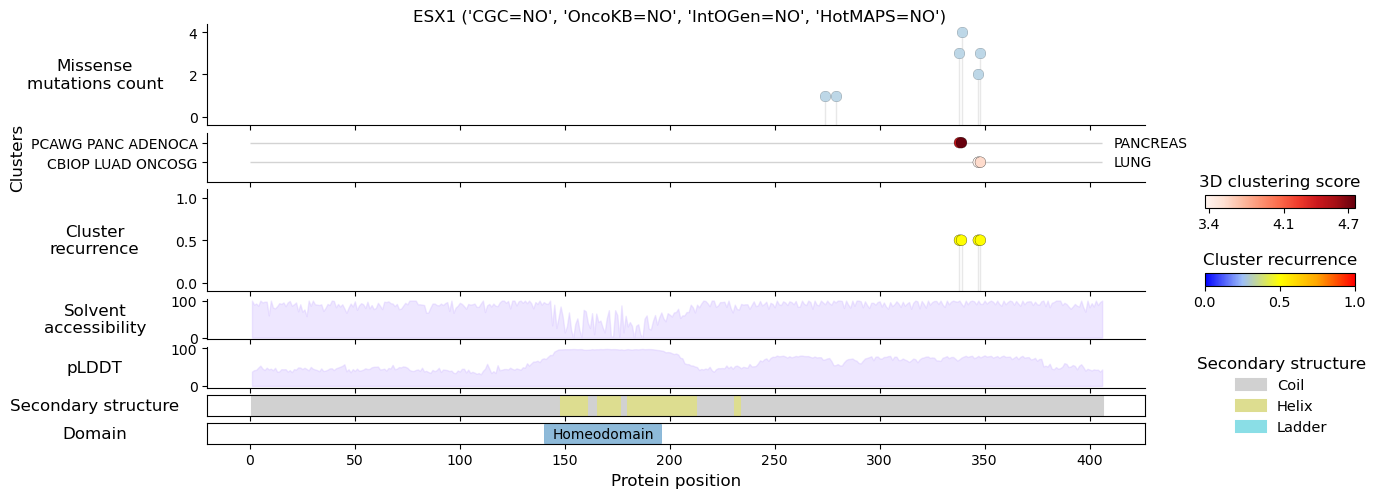

In [34]:
gene = "ESX1"
annotated_deg = True

uni_id, tr_id = o3d_seq_df.loc[o3d_seq_df["Gene"] == gene, ["Uniprot_ID", "Ens_Transcr_ID"]].values[0]
pdb_tool_gene = o3d_pdb_tool_df[o3d_pdb_tool_df["Uniprot_ID"] == uni_id].reset_index(drop=True)
domain_gene = o3d_annot_df[(o3d_annot_df["Gene"] == gene) & 
                           (o3d_annot_df["Type"] == "DOMAIN") & 
                           (o3d_annot_df["Evidence"] == "Pfam")].reset_index(drop=True)
disorder_gene = disorder_df[disorder_df["Uniprot_ID"] == uni_id].reset_index(drop=True)
if gene in ["EGFR", "ERBB2"]:
    domain_gene.Description = domain_gene.Description.replace("GF_recep_IV", "GF_recep_IV      ")
    domain_gene.Description = domain_gene.Description.replace("TM_ErbB1", "   TM_ErbB1")

cohort_df_gene = cohort_df[cohort_df.COHORT.isin(o3d_dict[gene].keys())]
cohort_df_gene["MAX_SCORE"] = [o3d_dict[gene][cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]
cohort_df_gene = cohort_df_gene.sort_values(["GENERAL_CANCER_TYPE", "CANCER_TYPE", "MAX_SCORE"], ascending=[True, True, False]).reset_index(drop=True)

degmd_gene = degmd_pred[degmd_pred["Entry"] == uni_id].reset_index(drop=True)
if len(degmd_gene) == 0:
    uni_id_canonical, tr_id_canonical = o3d_seq_df_canonical.loc[o3d_seq_df_canonical["Gene"] == gene, ["Uniprot_ID", "Ens_Transcr_ID"]].values[0]
    if tr_id_canonical == tr_id:
        degmd_gene = degmd_pred[degmd_pred["Entry"] == uni_id_canonical].reset_index(drop=True)

title = f'{gene} {is_gene_in_lst(gene, cgc_genes, "CGC"), is_gene_in_lst(gene, oncokb_genes, "OncoKB"), is_gene_in_lst(gene, intogen_genes, "IntOGen"), is_gene_in_lst(gene, hotmaps_genes, "HotMAPS")}'

missense_gene_df = missense_count_df[missense_count_df["Gene"] == gene]
    
plot_cluster_conservation(o3d_dict[gene],
                           missense_gene_df,
                           domain_gene, 
                           degmd_gene,
                           disorder_gene,
                           pdb_tool_gene,
                           cohort_df_gene,
                           gene,
                           plot_pars,
                           o3d_seq_df,
                           title=title,
                           absolute_score=True,
                           extend_clusters=True)

/tmp/jobs/spellegrini/10373218/ipykernel_403418/3519093314.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_dict[gene][cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


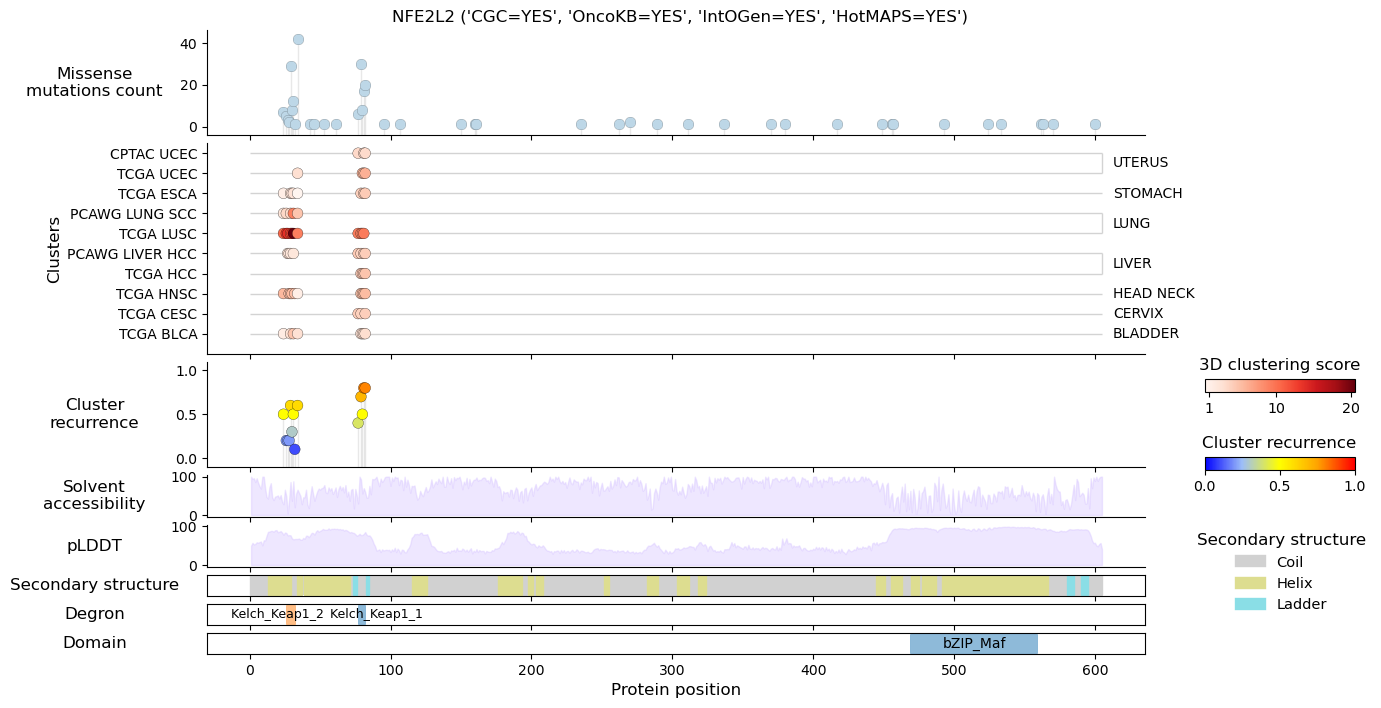

/tmp/jobs/spellegrini/10373218/ipykernel_403418/3519093314.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_dict[gene][cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


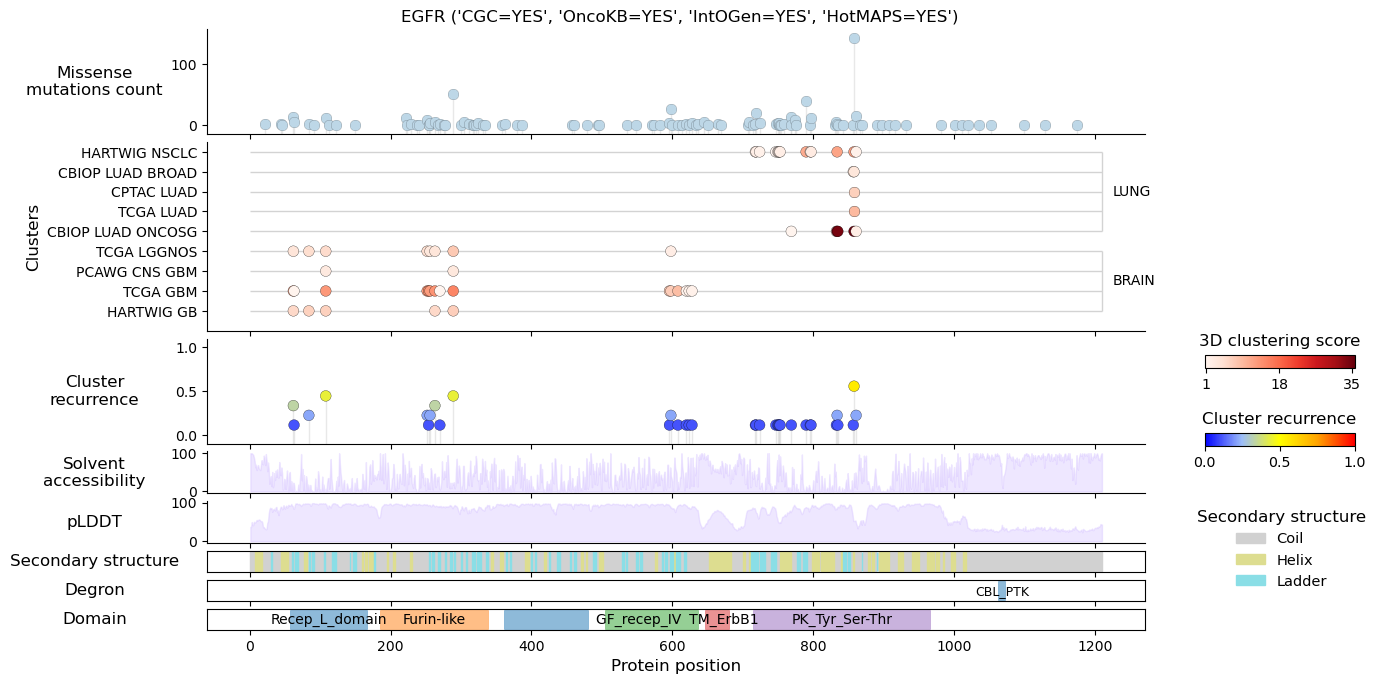

Gene, Uniprot ID tuple for cluster conservation: [('NFE2L2', 'Q16236'), ('EGFR', 'P00533')]


In [60]:
genes_cluster_conservation = ["NFE2L2", "EGFR"]
uni_id_cluster_conservation = []
show_degron = True

# for i, gene in enumerate(list(genes_order[genes_order > 2].index)):
for i, gene in enumerate(genes_cluster_conservation):
    
    uni_id, tr_id = o3d_seq_df.loc[o3d_seq_df["Gene"] == gene, ["Uniprot_ID", "Ens_Transcr_ID"]].values[0]
    pdb_tool_gene = o3d_pdb_tool_df[o3d_pdb_tool_df["Uniprot_ID"] == uni_id].reset_index(drop=True)
    domain_gene = o3d_annot_df[(o3d_annot_df["Gene"] == gene) & 
                               (o3d_annot_df["Type"] == "DOMAIN") & 
                               (o3d_annot_df["Evidence"] == "Pfam")].reset_index(drop=True)
    disorder_gene = disorder_df[disorder_df["Uniprot_ID"] == uni_id].reset_index(drop=True)
    if gene in ["EGFR", "ERBB2"]:
        domain_gene.Description = domain_gene.Description.replace("GF_recep_IV", "GF_recep_IV      ")
        domain_gene.Description = domain_gene.Description.replace("TM_ErbB1", "   TM_ErbB1")
    
    cohort_df_gene = cohort_df[cohort_df.COHORT.isin(o3d_dict[gene].keys())]
    cohort_df_gene["MAX_SCORE"] = [o3d_dict[gene][cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]
    cohort_df_gene = cohort_df_gene.sort_values(["GENERAL_CANCER_TYPE", "CANCER_TYPE", "MAX_SCORE"], ascending=[True, True, False]).reset_index(drop=True)

    if show_degron:
        degmd_gene = degmd_pred[degmd_pred["Entry"] == uni_id].reset_index(drop=True)
        if len(degmd_gene) == 0:
            uni_id_canonical, tr_id_canonical = o3d_seq_df_canonical.loc[o3d_seq_df_canonical["Gene"] == gene, ["Uniprot_ID", "Ens_Transcr_ID"]].values[0]
            if tr_id_canonical == tr_id:
                degmd_gene = degmd_pred[degmd_pred["Entry"] == uni_id_canonical].reset_index(drop=True)
        else:
            if gene in ["NFE2L2"]:
                degmd_gene.DEGRON = degmd_gene.DEGRON.replace("DEG_Kelch_Keap1_1", "       Kelch_Keap1_1")
                degmd_gene.DEGRON = degmd_gene.DEGRON.replace("DEG_Kelch_Keap1_2", "Kelch_Keap1_2       ")
            if annotated_deg:
                degmd_gene = degmd_gene[degmd_gene.Annotated == "YES"]
    else:
        degmd_gene = pd.DataFrame(columns=['DEGRON'])
        
    title = f'{gene} {is_gene_in_lst(gene, cgc_genes, "CGC"), is_gene_in_lst(gene, oncokb_genes, "OncoKB"), is_gene_in_lst(gene, intogen_genes, "IntOGen"), is_gene_in_lst(gene, hotmaps_genes, "HotMAPS")}'

    missense_gene_df = missense_count_df[missense_count_df["Gene"] == gene]

    gene_conservation_df = plot_cluster_conservation(o3d_dict[gene],
                                                       missense_gene_df,
                                                       domain_gene, 
                                                       degmd_gene,
                                                       disorder_gene,
                                                       pdb_tool_gene,
                                                       cohort_df_gene,
                                                       gene,
                                                       plot_pars,
                                                       o3d_seq_df,
                                                       title=title,
                                                       absolute_score=True,
                                                       extend_clusters=True,
                                                       return_conservation_df=True,
                                                       annotated_deg_only=True,
                                                       filename=f"plots_presentation/{gene}_conservation.png")

    if gene in genes_cluster_conservation:
        attr_file_path = f"data/cancer/{gene}.clusters_conservation.defattr"
        write_defattr_file(attr_file_path, gene, uni_id, gene_conservation_df)
        uni_id_cluster_conservation.append((gene, uni_id))

print("Gene, Uniprot ID tuple for cluster conservation:", uni_id_cluster_conservation)

/tmp/jobs/spellegrini/10373218/ipykernel_403418/2657242685.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_dict[gene][cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


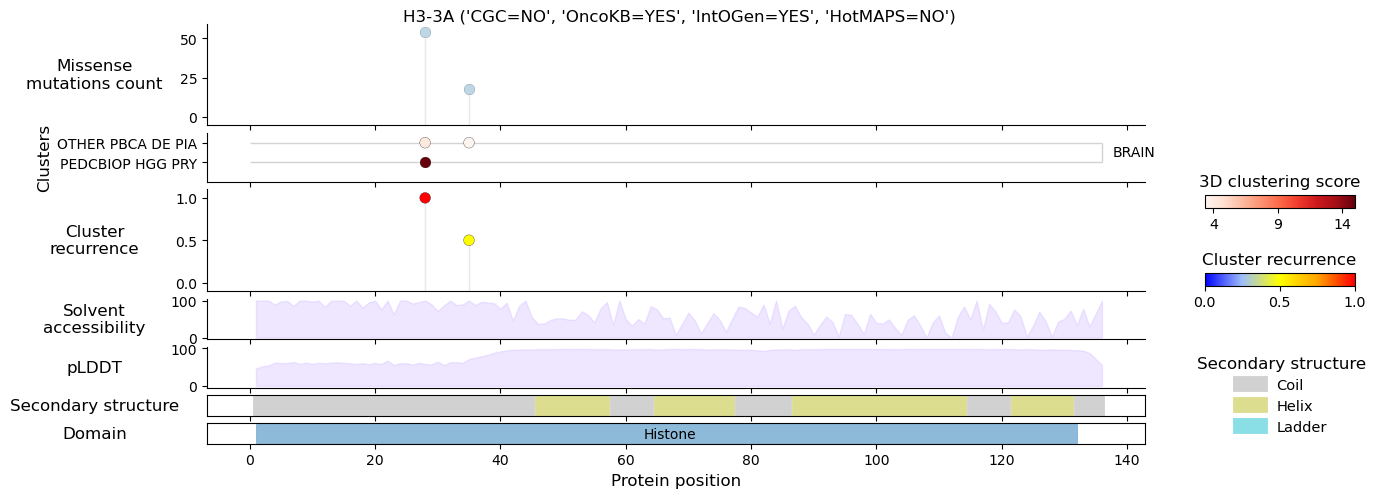

/tmp/jobs/spellegrini/10373218/ipykernel_403418/2657242685.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_dict[gene][cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


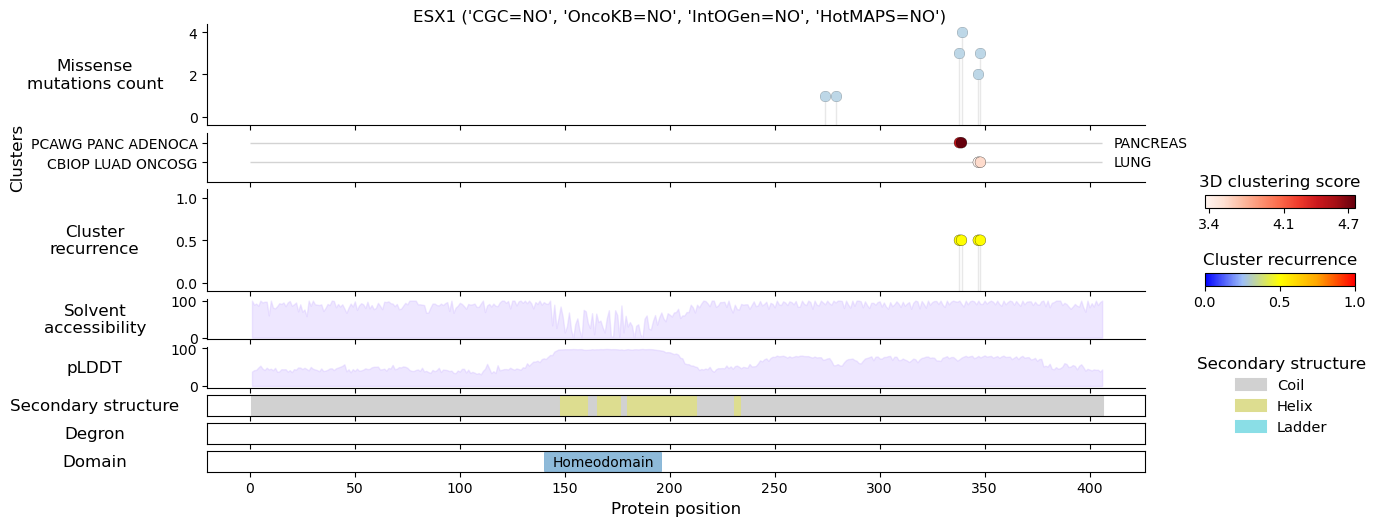

/tmp/jobs/spellegrini/10373218/ipykernel_403418/2657242685.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_dict[gene][cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


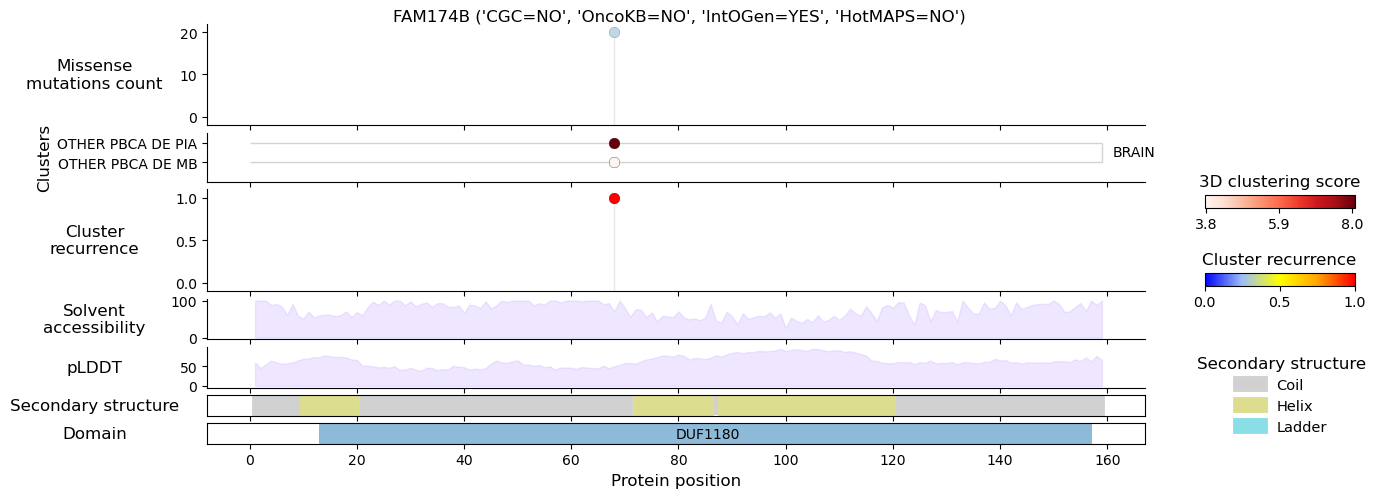

/tmp/jobs/spellegrini/10373218/ipykernel_403418/2657242685.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_dict[gene][cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


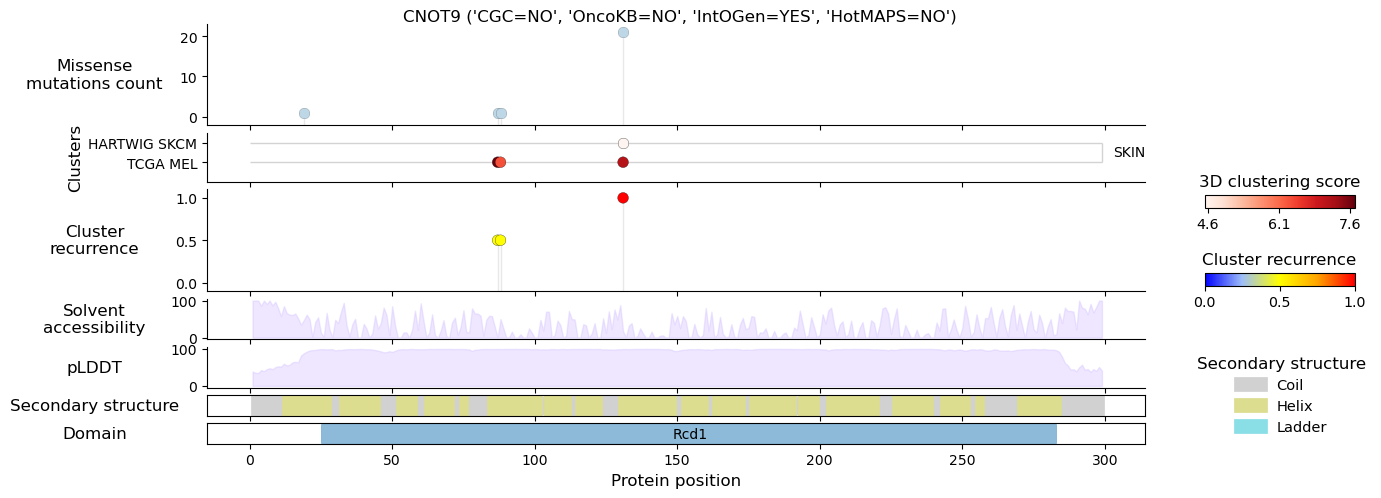


KeyboardInterrupt



In [46]:
# Potential new drivers

genes_cluster_conservation = ["H3-3A", "ESX1", "C3orf70", "FAM174B"]
uni_id_cluster_conservation = []
show_degron=True

for i, gene in enumerate(["H3-3A", "ESX1", "FAM174B", "CNOT9",
                          "IGLL5", "LILRB2", "GBP4", "HLA-DQA1", "AHNAK2", 
                          "MADCAM1", "ESX1", "HLA-DQB1", "OR5H14", 
                          "C3orf70", "RETSAT", "APOBR", "KLF5"]):
    
    uni_id, tr_id = o3d_seq_df.loc[o3d_seq_df["Gene"] == gene, ["Uniprot_ID", "Ens_Transcr_ID"]].values[0]
    pdb_tool_gene = o3d_pdb_tool_df[o3d_pdb_tool_df["Uniprot_ID"] == uni_id].reset_index(drop=True)
    domain_gene = o3d_annot_df[(o3d_annot_df["Gene"] == gene) & 
                               (o3d_annot_df["Type"] == "DOMAIN") & 
                               (o3d_annot_df["Evidence"] == "Pfam")].reset_index(drop=True)
    
    if show_degron:
        degmd_gene = degmd_pred[degmd_pred["Entry"] == uni_id].reset_index(drop=True)
        if len(degmd_gene) == 0:
            uni_id_canonical, tr_id_canonical = o3d_seq_df_canonical.loc[o3d_seq_df_canonical["Gene"] == gene, ["Uniprot_ID", "Ens_Transcr_ID"]].values[0]
            if tr_id_canonical == tr_id:
                degmd_gene = degmd_pred[degmd_pred["Entry"] == uni_id_canonical].reset_index(drop=True)
    else:
        degmd_gene = pd.DataFrame(columns=['DEGRON'])
    
    disorder_gene = disorder_df[disorder_df["Uniprot_ID"] == uni_id].reset_index(drop=True)

    cohort_df_gene = cohort_df[cohort_df.COHORT.isin(o3d_dict[gene].keys())]
    cohort_df_gene["MAX_SCORE"] = [o3d_dict[gene][cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]
    cohort_df_gene = cohort_df_gene.sort_values(["GENERAL_CANCER_TYPE", "CANCER_TYPE", "MAX_SCORE"], ascending=[True, True, False]).reset_index(drop=True)

    title = f'{gene} {is_gene_in_lst(gene, cgc_genes, "CGC"), is_gene_in_lst(gene, oncokb_genes, "OncoKB"), is_gene_in_lst(gene, intogen_genes, "IntOGen"), is_gene_in_lst(gene, hotmaps_genes, "HotMAPS")}'

    missense_gene_df = missense_count_df[missense_count_df["Gene"] == gene]

    gene_conservation_df = plot_cluster_conservation(o3d_dict[gene],
                                                       missense_gene_df,
                                                       domain_gene, 
                                                       degmd_gene,
                                                       disorder_gene,
                                                       pdb_tool_gene,
                                                       cohort_df_gene,
                                                       gene,
                                                       plot_pars,
                                                       o3d_seq_df,
                                                       title=title,
                                                       absolute_score=True,
                                                       hratio_needle=0.25,
                                                       hspace_proportion=0.15,
                                                       extend_clusters=True,
                                                       return_conservation_df=True)

    if gene in genes_cluster_conservation:
        attr_file_path = f"data/cancer/{gene}.clusters_conservation.defattr"
        write_defattr_file(attr_file_path, gene, uni_id, gene_conservation_df)
        uni_id_cluster_conservation.append((gene, uni_id))

print("Gene, Uniprot ID tuple for cluster conservation:", uni_id_cluster_conservation)

__TODO:__
* Try plots without extended clusters (IGLL5) __V__

__Interesting cases__
* ERBB2 (common cluster across BLADDER and CERVIX and different to BREAST and COADREAD)
* EGFR (very different clusters across LUNG and BRAIN)
* MED12 (different clusters in PROSTATE vs LYMPH vs CERVIX) - However low signal
* SMARCA4 (very different clusters between LYMPH vs BRAIN)
* CTNNB1 (degron)
* NFE2L2 (degron)
* SF3B1 (clusters unique to BLADDER)
* Potential new drivers
    * LILRB2   (common clusters)
    * HLA-DQA1 (common clusters)
    * GBP4     (common clusters)               
    * MADCAM1  (close clusters, matching with degron?)
    * ESX1     (close clusters, matching with degron?)
    * C3orf70  (common clusters)
    * RETSAT   (common clusters)
    * KLF5     (common clusters)
    * OR5H14   (close clusters)
    * H3-3A    (common clusters)                       - High signal
    * CNOT9    (common clusters)                       - High signal
    * FAM174B  (common clusters)                       - High signal
    * IGLL5    (common clusters)                       - High signal

# CH and AML

In [92]:
def plot_cluster_conservation_ch(o3d_dict,
                               mut_df,
                               mut_ch_df,
                               domain_df,
                               degron_df,
                               disorder_df,
                               pdb_tool_df,
                               cohort_df,
                               gene,
                               plot_pars,
                               o3d_seq_df,
                               title=None,
                               alpha_scatter=1,
                               figsize=(15,9),
                               j_margin=15,
                               hratio_one_cohort=0.05,
                               hratio_needle=0.25,
                               needle_ypad_ratio=0.1,
                               hspace_proportion=0.2,
                               len_txt_thr=2400,
                               len_txt_thr_degron=600,
                               absolute_score=False,
                               extend_clusters=True,
                               save=False,
                               filename="conservation_ch.png",
                               return_conservation_df=False):
    
    # Set height of tracks
    n_cohorts = len(o3d_dict.keys())
    hratio_one_cohort = 0.06 if n_cohorts < 5 else hratio_one_cohort
    dynamic_height = hratio_one_cohort * n_cohorts  
    if n_cohorts == 1:
        h_ratios = [hratio_needle, dynamic_height, 0.1, 0.1, 0.05, 0.05, 0.05]
    else:
        h_ratios = [hratio_needle, dynamic_height, hratio_needle, 0.1, 0.1, 0.05, 0.05, 0.05]
    if len(mut_df) > 0:
        h_ratios = [hratio_needle] + h_ratios
        tm_mut_ax = 1
    else:
        tm_mut_ax = 0
    base_height_per_unit = 6  
    total_height = sum(h_ratios) * base_height_per_unit
    hspace = hspace_proportion * base_height_per_unit / total_height
    
    fig, axes = plt.subplots(len(h_ratios), 1, 
                             figsize=(figsize[0], total_height),
                             sharex=True, 
                             gridspec_kw={'hspace': hspace, 
                                          'height_ratios': h_ratios})
    
 
    # Missense mutations
    # ==================

    
    max_count_ch = np.max(mut_ch_df["Count"])
    ax_ylim_min_ch = 0-max_count_ch*needle_ypad_ratio
    ax_ylim_max_ch = max_count_ch+max_count_ch*needle_ypad_ratio

    axes[0].vlines(mut_ch_df["Pos"], ymin=ax_ylim_min_ch, ymax=mut_ch_df["Count"], lw=1, zorder=1, alpha=0.5, color="lightgray")
    axes[0].scatter(mut_ch_df["Pos"], mut_ch_df["Count"], color='white', zorder=3, lw=1, ec="white") # To cover the overlapping needle top part
    axes[0].scatter(mut_ch_df["Pos"], mut_ch_df["Count"].values, zorder=4, 
                     alpha=alpha_scatter, lw=0.1, ec="black", s=60, color="#c4edd8")  
    
    axes[0].set_ylim(ax_ylim_min_ch, ax_ylim_max_ch)
    axes[0].set_ylabel(f'CH\nmissense\nmutations count', fontsize=plot_pars["ylabel_fontsize"], rotation=0, va='center')
    axes[0].yaxis.set_label_coords(plot_pars["y_labels_coord"][0], plot_pars["y_labels_coord"][1])

    if len(mut_df) > 0:
        max_count = np.max(mut_df["Count"])
        ax_ylim_min = 0-max_count*needle_ypad_ratio
        ax_ylim_max = max_count+max_count*needle_ypad_ratio

        label = "AML" if "AML" in cohort_df.GENERAL_CANCER_TYPE.values else "Tumor"
        axes[1].set_ylabel(f'{label}\nmissense\nmutations count', fontsize=plot_pars["ylabel_fontsize"], rotation=0, va='center')
        axes[1].yaxis.set_label_coords(plot_pars["y_labels_coord"][0]-0.002, plot_pars["y_labels_coord"][1])
        axes[1].vlines(mut_df["Pos"], ymin=ax_ylim_min, ymax=mut_df["Count"], lw=1, zorder=1, alpha=0.5, color="lightgray")
        axes[1].scatter(mut_df["Pos"], mut_df["Count"], color='white', zorder=3, lw=1, ec="white") # To cover the overlapping needle top part
        axes[1].scatter(mut_df["Pos"], mut_df["Count"].values, zorder=4, 
                        alpha=alpha_scatter, lw=0.1, ec="black", s=60, color="#BDD7E7") 


    # Clusters
    # ========

    if extend_clusters:
        score_max = np.max([o3d_dict[cohort]["Result"][o3d_dict[cohort]["Result"].C == 1].Score_obs_sim.max() for cohort in o3d_dict.keys()])
        score_min = np.min([o3d_dict[cohort]["Result"][o3d_dict[cohort]["Result"].C == 1].Score_obs_sim.min() for cohort in o3d_dict.keys()])
    else:
        score_max = np.max([o3d_dict[cohort]["Result"][(o3d_dict[cohort]["Result"].C == 1) & (o3d_dict[cohort]["Result"].C_ext == 0)].Score_obs_sim.max() for cohort in o3d_dict.keys()])
        score_min = np.min([o3d_dict[cohort]["Result"][(o3d_dict[cohort]["Result"].C == 1) & (o3d_dict[cohort]["Result"].C_ext == 0)].Score_obs_sim.min() for cohort in o3d_dict.keys()])

    for i, cohort in enumerate(cohort_df.COHORT.values):

        o3d_cohort_df = get_o3d_gene_data(gene, o3d_seq_df, o3d_dict[cohort]["Result"], extend_clusters=extend_clusters)
        gene_len = len(disorder_df)
        # axes[1].plot(range(1, gene_len+1), o3d_cohort_df["O3D_score"], zorder=2, lw=1, label=cohort)       #color=sns.color_palette("tab20", 20)[i]

        axes[1+tm_mut_ax].hlines(y=i, xmin=0, xmax=gene_len, linewidth=1, color='lightgray', alpha=1, zorder=0)
        cluster_pos = o3d_cohort_df[o3d_cohort_df["Cluster"] == 1].Pos.values
        cluster_score = o3d_cohort_df[o3d_cohort_df["Cluster"] == 1].O3D_score.values 

        scatter = axes[1+tm_mut_ax].scatter(y=np.repeat(i, len(cluster_pos)), x=cluster_pos, 
                                c=cluster_score, cmap='Reds', 
                                vmin=score_min if absolute_score else None, 
                                vmax=score_max if absolute_score else None, 
                                zorder=2, lw=0.2, label=cohort, alpha=alpha_scatter, ec="black", s=60)   # color=sns.color_palette("tab20", 20)[i]

    y_ticks_positions = np.arange(n_cohorts)   
    axes[1+tm_mut_ax].set_yticks(y_ticks_positions)
    axes[1+tm_mut_ax].set_ylim(-1, n_cohorts-0.5)
    axes[1+tm_mut_ax].set_yticklabels([clean_cohort_name(cohort) for cohort in cohort_df.COHORT.values])
    axes[1+tm_mut_ax].set_ylabel('Clusters', fontsize=plot_pars["ylabel_fontsize"])

    # Cbar
    # ----
    
    fig_width, fig_height = fig.get_size_inches()
    margin_factor = 0.1 
    colorbar_y_position = margin_factor + (0.45 * (6 / fig_height)) 
    colorbar_height = 0.015 * (8.5 / fig_height)  
    fig.subplots_adjust(right=0.75)
    cbar_ax = fig.add_axes([0.79, colorbar_y_position, 0.1, colorbar_height])
    cbar = fig.colorbar(scatter, cax=cbar_ax, orientation='horizontal')
    cbar.set_label('3D clustering score' if absolute_score else 'Relative 3D\nclustering score', 
                   fontsize=plot_pars["legend_fontsize"], labelpad=6.5)
    cbar.ax.xaxis.set_label_position('top')
    
    cbar.ax.tick_params(labelsize=plot_pars["ticksize"])    
    if not absolute_score:
        span = cluster_score.max() - cluster_score.min()
        left_tick = cluster_score.min() + 0.1 * span  
        right_tick = cluster_score.max() - 0.1 * span 
        tick_values = [left_tick, right_tick]
        cbar.set_ticks(tick_values)
        cbar.set_ticklabels([tick for tick in ["Low", "High"]])
    else:
        span = score_max - score_min
        j = 1 if span > 10 else 10 if span > 1 else 100
        ticks = np.linspace(score_min, score_max, 3)
        cbar.set_ticks([np.ceil(ticks[0] * j) / j, np.round(ticks[1] * j) / j, np.floor(ticks[2] * j) / j])
    

    # Tissue annotation
    # -----------------

    for indices, tissue_name in cohort_df.groupby("GENERAL_CANCER_TYPE").apply(lambda x: (x.index, x.name)):
        y_start = indices[0]
        y_end = indices[-1]
        y_pos = (y_start + y_end) / 2
        axes[1+tm_mut_ax].vlines(x=gene_len, ymin=y_start, ymax=y_end, color="lightgray", lw=1, zorder=0)
        axes[1+tm_mut_ax].text(x=gene_len + gene_len*0.013, y=y_pos, s=tissue_name.replace("_", " "), 
                     verticalalignment='center', fontsize=10, color="black")

    
    # Conservation of clusters
    # ========================
    if n_cohorts > 1:
        colors = ["blue", "#9DBEF8", "yellow", "orange", "red"]
        custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
        
        df_gene = pd.concat([o3d_dict[cohort]["Result"] for cohort in o3d_dict.keys()])
        if extend_clusters:
            conservation_df = df_gene[df_gene["C"] == 1].value_counts("Pos") / len(o3d_dict.keys())
        else:
            conservation_df = df_gene[(df_gene["C"] == 1) & (df_gene["C_ext"] == 0)].value_counts("Pos") / len(o3d_dict.keys())
        conservation_df = conservation_df.reset_index().rename(columns = {0 : "Conservation"}).sort_values("Pos").reset_index(drop=True)
        
        axes[2+tm_mut_ax].vlines(conservation_df["Pos"], ymin=-0.1, ymax=conservation_df["Conservation"], lw=1, zorder=1, alpha=0.5, color="lightgray")
        scatter = axes[2+tm_mut_ax].scatter(y=conservation_df["Conservation"], 
                                            x=conservation_df["Pos"], 
                                            c=conservation_df["Conservation"], 
                                            cmap=custom_cmap, vmin=0, vmax=1,
                                            zorder=2, lw=0.2, alpha=alpha_scatter, ec="black", s=60)
        ax_ylim_min, ax_ylim_max = 0-1*needle_ypad_ratio, 1+1*needle_ypad_ratio
        axes[2+tm_mut_ax].set_ylim(ax_ylim_min, ax_ylim_max)
        axes[2+tm_mut_ax].set_ylabel('Cluster\nrecurrence', fontsize=plot_pars["ylabel_fontsize"], rotation=0, va='center')
        axes[2+tm_mut_ax].yaxis.set_label_coords(plot_pars["y_labels_coord"][0], plot_pars["y_labels_coord"][1]) 
        axes[2+tm_mut_ax].set_yticks([0, 0.5, 1])
    
        # Cbar
        fig_width, fig_height = fig.get_size_inches()
        margin_factor = 0.1 
        colorbar_y_position = margin_factor + (0.32 * (6 / fig_height)) 
        colorbar_height = 0.015 * (8.5 / fig_height)  
        fig.subplots_adjust(right=0.75)
        cbar_ax = fig.add_axes([0.79, colorbar_y_position, 0.1, colorbar_height])
        cbar = fig.colorbar(scatter, cax=cbar_ax, orientation='horizontal')
        cbar.set_label('Cluster recurrence', fontsize=plot_pars["legend_fontsize"], labelpad=6.5)
        cbar.ax.xaxis.set_label_position('top')
        cbar.ax.tick_params(labelsize=plot_pars["ticksize"])    
    else:
        tm_mut_ax -= 1

    
    # Track pACC
    # ==========

    ax=3+tm_mut_ax

    if isinstance(pdb_tool_df, pd.DataFrame):
        max_pacc = np.max(pdb_tool_df["pACC"].fillna(0))
        axes[ax].fill_between(pdb_tool_df["Pos"], 0, pdb_tool_df["pACC"].fillna(0),                  
                              zorder=2, color=sns.color_palette("pastel")[4], alpha=0.35)
        axes[ax].set_ylabel('Solvent\naccessibility', fontsize=plot_pars["ylabel_fontsize"], rotation=0, va='center')
        axes[ax].yaxis.set_label_coords(plot_pars["y_labels_coord"][0], plot_pars["y_labels_coord"][1])
    else:
        axes[ax].remove()


    # pLDDT
    # ==========

    ax=4+tm_mut_ax

    if isinstance(disorder_df, pd.DataFrame):
        max_pacc = np.max(disorder_df["Confidence"].fillna(0))
        axes[ax].fill_between(disorder_df["Pos"], 0, disorder_df["Confidence"].fillna(0),                  
                              zorder=2, color=sns.color_palette("pastel")[4], alpha=0.35)
        axes[ax].set_ylabel('pLDDT', fontsize=plot_pars["ylabel_fontsize"], rotation=0, va='center')
        axes[ax].yaxis.set_label_coords(plot_pars["y_labels_coord"][0], plot_pars["y_labels_coord"][1])
    else:
        axes[ax].remove()


    # Track SSE
    # =========

    ax=5+tm_mut_ax
   
    if isinstance(pdb_tool_df, pd.DataFrame):
        for n, sse in enumerate(('Coil', 'Helix', 'Ladder')):   
            axes[ax].fill_between(pdb_tool_df["Pos"], 0, 1, where=(pdb_tool_df['SSE'] == sse),
                                  zorder=2, color=plot_pars["sse_colors"][sse], 
                                  alpha=1, 
                                  label=sse, 
                                  lw=4.2 if gene_len < 200 else 3.4 if gene_len < 300 else 2.2 if gene_len < 450 else 1.7 if gene_len < 1000 else 1)
        axes[ax].set_yticks([])  
        axes[ax].legend(fontsize=10.5, frameon=plot_pars["legend_frameon"], 
                        bbox_to_anchor=plot_pars["sse_bbox_to_anchor"], title = "Secondary structure", 
                        title_fontsize=plot_pars["legend_fontsize"], 
                        handleheight=0.67, handlelength=2, markerscale=1) 
        axes[ax].set_ylabel('Secondary structure', fontsize=plot_pars["ylabel_fontsize"], rotation=0, va='center')
        axes[ax].yaxis.set_label_coords(plot_pars["y_labels_coord"][0], plot_pars["y_labels_coord"][1])
    else:
        axes[ax].remove()


    # Track degron
    # ============

    ax=6+tm_mut_ax

    if len(degron_df["DEGRON"]) > 0:
        degron_df["DEGRON"] = degron_df.apply(lambda x: f"{x.DEGRON} ({'K' if x.Annotated == 'YES' else 'P'})", axis=1)
        degron_color_dict = {}
        genes_clashing_degrons = ["FOXA1", "PTEN", "KLF5"]
        genes_not_clashing_degrons = ["AR", "FGFR3", "BRAF", "SMO", "KIT"]
        for n, name in enumerate(degron_df["DEGRON"].unique()):
            degron_color_dict[name] = f"C{n}"
            
        n = 0
        added_degron = []
        for i, row in degron_df.iterrows():
            if pd.Series([row["DEGRON"], row["Begin"], row["End"]]).isnull().any():
                continue
    
            name = row["DEGRON"]
            start = int(row["Begin"])
            end = int(row["End"])
            
            if name not in added_degron and (gene_len >= len_txt_thr_degron or gene in genes_clashing_degrons) and gene not in genes_not_clashing_degrons:
                axes[ax].fill_between(range(start, end + 1), -0.5, 0.45, alpha=0.5, color=degron_color_dict[name], label=name, lw=0.5)
            else:
                axes[ax].fill_between(range(start, end + 1), -0.5, 0.45, alpha=0.5, color=degron_color_dict[name], lw=0.5)
            
            if name not in added_degron:
                if ((gene_len < len_txt_thr_degron and gene not in genes_clashing_degrons) or gene in genes_not_clashing_degrons):
                    y = -0.04
                    axes[ax].text(((start + end) / 2)+0.5, y, name, ha='center', va='center', fontsize=9, color="black")
                added_degron.append(name)
        axes[ax].set_yticks([])  
        if ((gene_len >= len_txt_thr_degron or gene in genes_clashing_degrons) and len(added_degron) > 0) and gene not in genes_not_clashing_degrons:
            axes[ax].legend(fontsize=10.5, frameon=plot_pars["legend_frameon"], loc="upper center",
                            bbox_to_anchor=(1.155, -0.2),
                            title = "Degron", 
                            title_fontsize=plot_pars["legend_fontsize"],
                            handleheight=0.67, handlelength=2) 
        axes[ax].set_ylabel('Degron', fontsize=plot_pars["ylabel_fontsize"], rotation=0, va='center')
        axes[ax].yaxis.set_label_coords(plot_pars["y_labels_coord"][0], plot_pars["y_labels_coord"][1])
        ix = 0
    else:
        ix = 1
    
        
    # Track Domain
    # ============

    ax=7-ix+tm_mut_ax

    if isinstance(domain_df, pd.DataFrame):
        domain_color_dict = {}
        genes_clashing_domains = ["KDM6A", "XPO1"]

        for n, name in enumerate(domain_df["Description"].unique()):
            domain_color_dict[name] = f"C{n}"

        n = 0
        added_domain = []
        for i, row in domain_df.iterrows():
            if pd.Series([row["Description"], row["Begin"], row["End"]]).isnull().any():
                continue

            name = row["Description"]
            start = int(row["Begin"])
            end = int(row["End"])
            
            if name not in added_domain and (gene_len >= len_txt_thr or gene in genes_clashing_domains):
                axes[ax].fill_between(range(start, end + 1), -0.5, 0.45, alpha=0.5, color=domain_color_dict[name], label=name, lw=0.5)
            else:
                axes[ax].fill_between(range(start, end + 1), -0.5, 0.45, alpha=0.5, color=domain_color_dict[name], lw=0.5)
            
            if name not in added_domain:
                if gene_len < len_txt_thr and gene not in genes_clashing_domains:
                    y = -0.04
                    axes[ax].text(((start + end) / 2)+0.5, y, name, ha='center', va='center', fontsize=10, color="black")
                added_domain.append(name)
        axes[ax].set_yticks([])  
        if (gene_len >= len_txt_thr or gene in genes_clashing_domains) and len(added_domain) > 0:
            axes[ax].legend(fontsize=10.5, frameon=plot_pars["legend_frameon"], loc="lower center",
                            bbox_to_anchor=plot_pars["domain_bbox_to_anchor"], title = "Domain", 
                            title_fontsize=plot_pars["legend_fontsize"],
                            handleheight=0.67, handlelength=2) 
        axes[ax].set_ylabel('Domain', fontsize=plot_pars["ylabel_fontsize"], rotation=0, va='center')
        axes[ax].yaxis.set_label_coords(plot_pars["y_labels_coord"][0], plot_pars["y_labels_coord"][1])
    else:
        axes[ax].remove()

    if ix == 1:
        axes[ax+ix].remove()
        axes[-2].tick_params(labelbottom=True)
        axes[-2].set_xlabel("Protein position", fontsize=plot_pars["ylabel_fontsize"])
    else:
        axes[-1].set_xlabel("Protein position", fontsize=plot_pars["ylabel_fontsize"])

    
    # Details
    # =======

    if gene is not None:
        fig.suptitle(title, y=0.905, x=0.44)

    for n in range(5+tm_mut_ax):
        axes[n].spines['top'].set_visible(False)
        axes[n].spines['right'].set_visible(False)
    
    plt.show()

    if return_conservation_df and n_cohorts > 1:
        return conservation_df

## Missense mut

In [98]:
# Get all myeloid cohorts and CH
o3d_ch_output_dir = f"{datasets}/ch/o3d_output/run_20241004_ch/run_2024-11-04_13-09-49"
cohorts = ["OTHER_WGS_HMF_FULL", "OTHER_WXS_CH_IMPACT_PANEL", "OTHER_WXS_TCGA_FULL"]

cohort_ch_df = pd.DataFrame({"COHORT" : cohorts,
                              "CANCER_TYPE" : np.nan,
                              "PLATFORM" : np.nan,
                              "MUTATIONS" : np.nan, 
                              "SAMPLES" : np.nan,
                              "GENERAL_CANCER_TYPE" : "CH"})

cohort_all_df = pd.concat((cohort_df, cohort_ch_df)).reset_index(drop=True)
cohort_all_ch_df = pd.concat((cohort_df[cohort_df["CANCER_TYPE"] == "AML"], cohort_ch_df)).reset_index(drop=True)
cohort_all_ch_df.GENERAL_CANCER_TYPE = cohort_all_ch_df.GENERAL_CANCER_TYPE.replace("MYELOID", "AML")
cohort_all_ch_df

COHORT CANCER_TYPE PLATFORM  MUTATIONS  SAMPLES  \
0        STJUDE_WGS_D_AML_2018         AML      WGS    30265.0     21.0   
1        PCAWG_WGS_MYELOID_AML         AML      WGS    20309.0     13.0   
2  OTHER_WXS_AML_PRY_BEAT_2018         AML      WXS    79225.0    257.0   
3         PEDCBIOP_WXS_AML_PRY         AML      WXS      233.0     28.0   
4          TARGET_WXS_AML_2020         AML      WXS      962.0     22.0   
5                 TCGA_WXS_AML         AML      WXS     8313.0    140.0   
6           OTHER_WGS_HMF_FULL         NaN      NaN        NaN      NaN   
7    OTHER_WXS_CH_IMPACT_PANEL         NaN      NaN        NaN      NaN   
8          OTHER_WXS_TCGA_FULL         NaN      NaN        NaN      NaN   

  GENERAL_CANCER_TYPE  
0                 AML  
1                 AML  
2                 AML  
3                 AML  
4                 AML  
5                 AML  
6                  CH  
7                  CH  
8                  CH

In [99]:
## Get o3d pos result for ch

o3d_ch_pos_result = get_o3d_result(cohorts, o3d_ch_output_dir)
o3d_ch_pos_result

Gene Uniprot_ID    F   Pos  Mut_in_gene  Score_obs_sim  C  C_ext  \
75       AHNAK     Q09666  24M  3471           21       3.953334  1    0.0   
76       AHNAK     Q09666  24M  1671           21       3.329254  1    0.0   
77       AHNAK     Q09666  24M  5717           21       0.450493  0    NaN   
78       AHNAK     Q09666  24M  2335           21       0.436987  0    NaN   
79       AHNAK     Q09666  24M  4969           21       0.431308  0    NaN   
...        ...        ...  ...   ...          ...            ... ..    ...   
176410  ZNF106     Q9H2Y7    1  1626           63       0.309666  0    NaN   
176411  ZNF106     Q9H2Y7    1  1101           63       0.312538  0    NaN   
176412  ZNF106     Q9H2Y7    1  1807           63       0.298748  0    NaN   
176413  ZNF106     Q9H2Y7    1  1868           63       0.285253  0    NaN   
176414  ZNF106     Q9H2Y7    1  1725           63       0.267092  0    NaN   

        Cancer               Cohort  
75         NaN   OTHER_WGS_HMF_FULL  
76         NaN   OTHER_WGS_HMF_FULL  
77         NaN   OTHER_WGS_HMF_FULL  
78         NaN   OTHER_WGS_HMF_FULL  
79         NaN   OTHER_WGS_HMF_FULL  
...        ...                  ...  
176410     NaN  OTHER_WXS_TCGA_FULL  
176411     NaN  OTHER_WXS_TCGA_FULL  
176412     NaN  OTHER_WXS_TCGA_FULL  
176413     NaN  OTHER_WXS_TCGA_FULL  
176414     NaN  OTHER_WXS_TCGA_FULL  

[2353 rows x 10 columns]

In [100]:
# Get o3d ch dict

o3d_ch_dict = {}
for gene in o3d_ch_pos_result.Gene.unique(): 
    print(gene)
    o3d_ch_dict[gene] = {}
    for cohort in o3d_ch_pos_result[o3d_ch_pos_result["Gene"] == gene].Cohort.unique():
        o3d_gene_cohort_ch = o3d_ch_pos_result.loc[(o3d_ch_pos_result["Gene"] == gene) & (o3d_ch_pos_result["Cohort"] == cohort)]
        o3d_ch_dict[gene][cohort] = {}
        o3d_ch_dict[gene][cohort]["Result"] = o3d_gene_cohort_ch

AHNAK
ARMCX4
BICRA
C11orf95
COL8A1
COL8A2
DHX58
DNMT3A
FLYWCH1
FNBP1L
FOXN4
JAK2
KCNA7
KIAA1210
KNL1
LOR
MARCKS
NLRP13
NR0B1
OR4C5
PIWIL3
PLEC
RAB44
RASAL3
RBM15B
RTL9
SCART1
SECISBP2
SHANK1
SOX4
SPATA31E1
TCHH
ZMAT1
ZNF224
ZNF264
ZNF273
ZNF334
ZNF358
ZNF497
ZNF646
ZNF649
ZNF691
ZNF697
ZNF749
ZNF768
ZNF775
ZNF79
ZNF865
ATM
CBL
CTCF
EGFR
GNAS
IDH1
IDH2
KMT2C
KRAS
MDM4
NRAS
SF3B1
SRSF2
STAT3
TET2
TP53
U2AF1
AASDH
AKNAD1
APOBR
AR
B4GALT5
C5
CEP350
CHIT1
CNTNAP1
CNTNAP4
COL14A1
CPM
CWC25
DSPP
FAM47A
FAM71E2
GPRC6A
GPRIN2
KRT4
KRTAP5-5
LAD1
MORF4L1
MRI1
MSH3
MYO1E
NBAS
NBEAL1
NLRP8
NOCT
NUCB2
ORC1
PABPC1
PIKFYVE
PNPLA4
PTGFRN
PYGL
REPS1
RP1L1
RPTN
SDHAF2
SPIRE2
TMEM247
TPRX1
TRPC5
VPS13A
ZNF106


In [101]:
## Add CH result to o3d_dict

for gene in o3d_ch_pos_result.Gene.unique(): 
    print(gene)
    for cohort in o3d_ch_pos_result[o3d_ch_pos_result["Gene"] == gene].Cohort.unique():
        o3d_ch_gene_cohort = o3d_ch_pos_result.loc[(o3d_ch_pos_result["Gene"] == gene) & (o3d_ch_pos_result["Cohort"] == cohort)]
        if gene not in o3d_dict.keys():
            o3d_dict[gene] = {}
        o3d_dict[gene][cohort] = {}
        o3d_dict[gene][cohort]["Result"] = o3d_ch_gene_cohort

AHNAK
ARMCX4
BICRA
C11orf95
COL8A1
COL8A2
DHX58
DNMT3A
FLYWCH1
FNBP1L
FOXN4
JAK2
KCNA7
KIAA1210
KNL1
LOR
MARCKS
NLRP13
NR0B1
OR4C5
PIWIL3
PLEC
RAB44
RASAL3
RBM15B
RTL9
SCART1
SECISBP2
SHANK1
SOX4
SPATA31E1
TCHH
ZMAT1
ZNF224
ZNF264
ZNF273
ZNF334
ZNF358
ZNF497
ZNF646
ZNF649
ZNF691
ZNF697
ZNF749
ZNF768
ZNF775
ZNF79
ZNF865
ATM
CBL
CTCF
EGFR
GNAS
IDH1
IDH2
KMT2C
KRAS
MDM4
NRAS
SF3B1
SRSF2
STAT3
TET2
TP53
U2AF1
AASDH
AKNAD1
APOBR
AR
B4GALT5
C5
CEP350
CHIT1
CNTNAP1
CNTNAP4
COL14A1
CPM
CWC25
DSPP
FAM47A
FAM71E2
GPRC6A
GPRIN2
KRT4
KRTAP5-5
LAD1
MORF4L1
MRI1
MSH3
MYO1E
NBAS
NBEAL1
NLRP8
NOCT
NUCB2
ORC1
PABPC1
PIKFYVE
PNPLA4
PTGFRN
PYGL
REPS1
RP1L1
RPTN
SDHAF2
SPIRE2
TMEM247
TPRX1
TRPC5
VPS13A
ZNF106


In [102]:
## Get missense mut ch

lst_ch_gene_cohort = []
for gene in o3d_ch_dict.keys():
    for cohort in o3d_ch_dict[gene].keys():
        lst_ch_gene_cohort.append((cohort, gene))
gene_cohort_ch_df = pd.DataFrame(lst_ch_gene_cohort, columns=["Cohort", "Gene"])
gene_cohort_ch_df = gene_cohort_ch_df.groupby("Cohort")["Gene"].agg(list).reset_index()
display(gene_cohort_ch_df)

lst_missense_ch_df = []
for cohort, genes in gene_cohort_ch_df[["Cohort", "Gene"]].values:
    cohort_missense_ch_df = pd.read_table(f"{o3d_ch_output_dir}/{cohort}/{cohort}.mutations.processed.tsv")
    cohort_missense_ch_df = cohort_missense_ch_df[cohort_missense_ch_df["Gene"].isin(genes)].reset_index(drop=True)
    cohort_missense_ch_df["Cohort"] = cohort
    lst_missense_ch_df.append(cohort_missense_ch_df)

missense_ch_df = pd.concat(lst_missense_ch_df)
display(missense_ch_df)

missense_count_ch_df = missense_ch_df.groupby(['Gene', 'Pos']).size().reset_index(name='Count')
missense_count_ch_df

Cohort  \
0         OTHER_WGS_HMF_FULL   
1  OTHER_WXS_CH_IMPACT_PANEL   
2        OTHER_WXS_TCGA_FULL   

                                                Gene  
0  [AHNAK, ARMCX4, BICRA, C11orf95, COL8A1, COL8A...  
1  [DNMT3A, JAK2, ATM, CBL, CTCF, EGFR, GNAS, IDH...  
2  [DNMT3A, JAK2, GNAS, SF3B1, SRSF2, TP53, AASDH...

Gene   Pos WT Mut         Tumor_Sample_Barcode    Transcript_ID  \
0      AHNAK   116  G   R  DRUP01050016T_DRUP01050016R  ENST00000378024   
1      AHNAK  1001  I   M  CPCT02020449T_CPCT02020449R  ENST00000378024   
2      AHNAK  1671  M   T  CPCT02210039T_CPCT02210039R  ENST00000378024   
3      AHNAK  1671  M   V  CPCT02010705T_CPCT02010705R  ENST00000378024   
4      AHNAK  1671  M   V  CPCT02030361T_CPCT02030361R  ENST00000378024   
...      ...   ... ..  ..                          ...              ...   
1956  ZNF106  1807  L   P                 TCGA-EP-A3JL  ENST00000263805   
1957  ZNF106  1849  R   L                 TCGA-55-8091  ENST00000263805   
1958  ZNF106  1849  R   H                 TCGA-5U-AB0F  ENST00000263805   
1959  ZNF106  1858  T   N                 TCGA-QT-A5XJ  ENST00000263805   
1960  ZNF106  1868  A   T                 TCGA-AJ-A8CV  ENST00000263805   

     O3D_transcript_ID Transcript_status               Cohort  
0      ENST00000378024             Match   OTHER_WGS_HMF_FULL  
1      ENST00000378024             Match   OTHER_WGS_HMF_FULL  
2      ENST00000378024             Match   OTHER_WGS_HMF_FULL  
3      ENST00000378024             Match   OTHER_WGS_HMF_FULL  
4      ENST00000378024             Match   OTHER_WGS_HMF_FULL  
...                ...               ...                  ...  
1956   ENST00000263805             Match  OTHER_WXS_TCGA_FULL  
1957   ENST00000263805             Match  OTHER_WXS_TCGA_FULL  
1958   ENST00000263805             Match  OTHER_WXS_TCGA_FULL  
1959   ENST00000263805             Match  OTHER_WXS_TCGA_FULL  
1960   ENST00000263805             Match  OTHER_WXS_TCGA_FULL  

[5812 rows x 9 columns]

Gene  Pos  Count
0      AASDH  105      1
1      AASDH  180      1
2      AASDH  217      1
3      AASDH  231      1
4      AASDH  241      1
...      ...  ...    ...
2195   ZNF79  477      5
2196   ZNF79  490      1
2197  ZNF865  193      6
2198  ZNF865  326      1
2199  ZNF865  645      1

[2200 rows x 3 columns]

### Plots

/tmp/jobs/spellegrini/10373218/ipykernel_952499/471277626.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


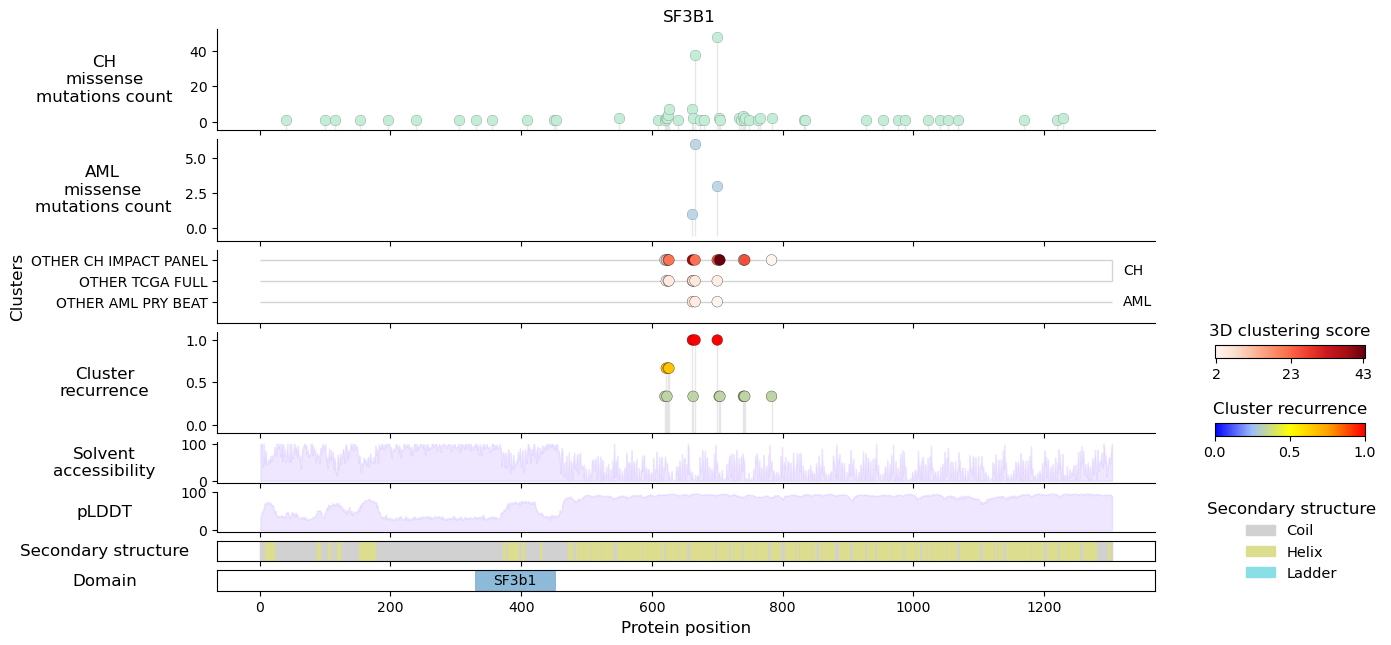

In [121]:
gene = "SF3B1"
o3d_gene_dict = o3d_dict[gene] 
    
if gene not in o3d_seq_df.Gene.values:
    cohort_1 = list(o3d_gene_dict.keys())[0]
    o3d_seq_df_gene = f"{o3d_ch_output_dir}/{cohort_1}/{cohort_1}.seq_df.processed.tsv"
    o3d_seq_df_gene = pd.read_table(o3d_seq_df_gene)
else:
    o3d_seq_df_gene = o3d_seq_df.copy()

uni_id, tr_id = o3d_seq_df_gene.loc[o3d_seq_df_gene["Gene"] == gene, ["Uniprot_ID", "Ens_Transcr_ID"]].values[0]
pdb_tool_gene = o3d_pdb_tool_df[o3d_pdb_tool_df["Uniprot_ID"] == uni_id].reset_index(drop=True)
domain_gene = o3d_annot_df[(o3d_annot_df["Gene"] == gene) & 
                           (o3d_annot_df["Type"] == "DOMAIN") & 
                           (o3d_annot_df["Evidence"] == "Pfam")].reset_index(drop=True)
disorder_gene = disorder_df[disorder_df["Uniprot_ID"] == uni_id].reset_index(drop=True)
if gene in ["EGFR", "ERBB2"]:
    domain_gene.Description = domain_gene.Description.replace("GF_recep_IV", "GF_recep_IV      ")
    domain_gene.Description = domain_gene.Description.replace("TM_ErbB1", "   TM_ErbB1")
if gene in ["DNMT3A"]:
    domain_gene.Description = domain_gene.Description.replace("ADD_DNMT3", "ADD_DNMT3             ")
    domain_gene.Description = domain_gene.Description.replace("ADDz_Dnmt3b", "        ADDz_Dnmt3b")

cohort_df_gene = cohort_all_ch_df[cohort_all_ch_df.COHORT.isin(o3d_gene_dict.keys())]

if len(cohort_df_gene.GENERAL_CANCER_TYPE.unique()) == 1:
    cohort_df_gene = cohort_all_df[cohort_all_df.COHORT.isin(o3d_gene_dict.keys())]    
    cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
    cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]
    cohort_df_gene = cohort_df_gene.sort_values(["ORDER", "GENERAL_CANCER_TYPE", "CANCER_TYPE", "MAX_SCORE"], ascending=[True, True, True, False]).reset_index(drop=True)
else:
    cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]
    cohort_df_gene = cohort_df_gene.sort_values(["GENERAL_CANCER_TYPE", "MAX_SCORE"], ascending=[True, True]).reset_index(drop=True)

o3d_gene_dict = {k: v for k, v in o3d_gene_dict.items() if k in cohort_df_gene.COHORT.values}
missense_gene_df = missense_df[missense_df.Cohort.isin(o3d_gene_dict.keys())]
missense_gene_df = missense_gene_df.groupby(['Gene', 'Pos']).size().reset_index(name='Count')
missense_gene_df = missense_gene_df[missense_gene_df["Gene"] == gene]
missense_gene_ch_df = missense_count_ch_df[missense_count_ch_df["Gene"] == gene]

gene_conservation_df = plot_cluster_conservation_ch(o3d_gene_dict,
                                                   missense_gene_df,
                                                   missense_gene_ch_df,
                                                   domain_gene, 
                                                   pd.DataFrame(columns=['DEGRON']),
                                                   disorder_gene,
                                                   pdb_tool_gene,
                                                   cohort_df_gene,
                                                   gene,
                                                   plot_pars,
                                                   o3d_seq_df_gene,
                                                   title=gene,
                                                   absolute_score=True,
                                                   extend_clusters=True,
                                                   return_conservation_df=True)

/tmp/jobs/spellegrini/10373218/ipykernel_952499/2679420442.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


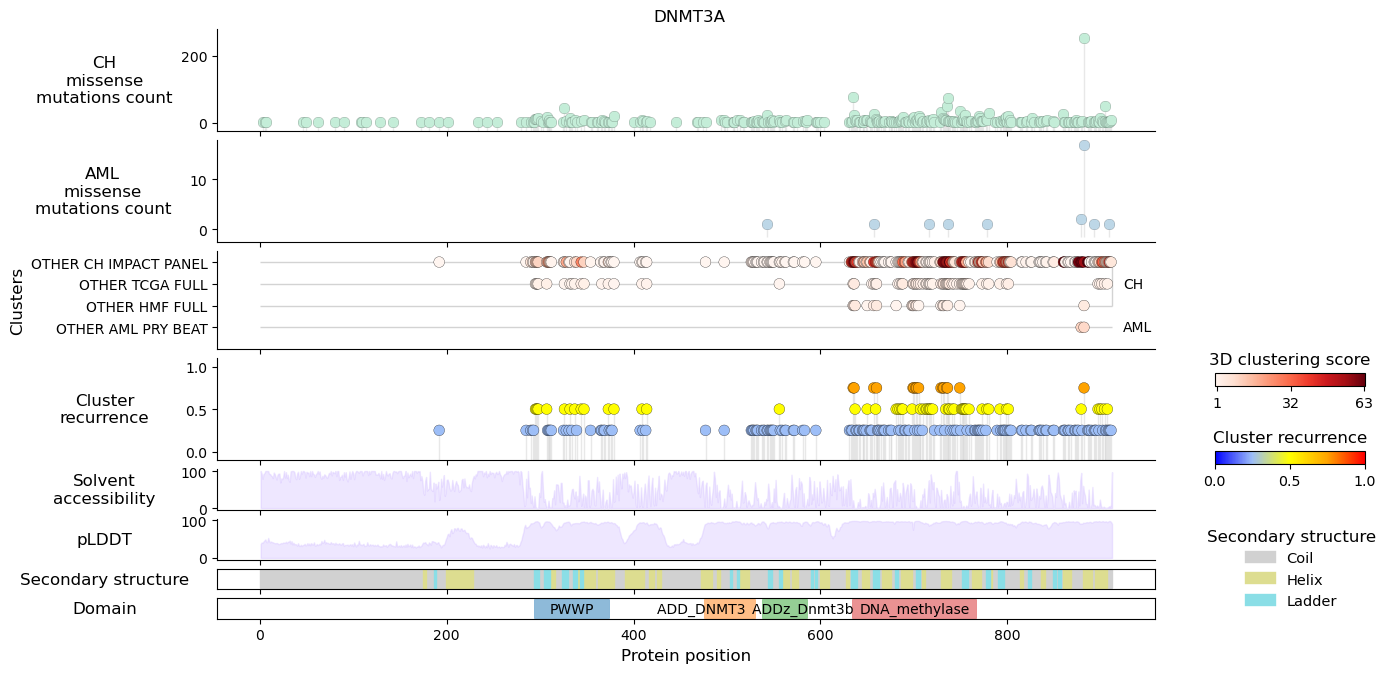

/tmp/jobs/spellegrini/10373218/ipykernel_952499/2679420442.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


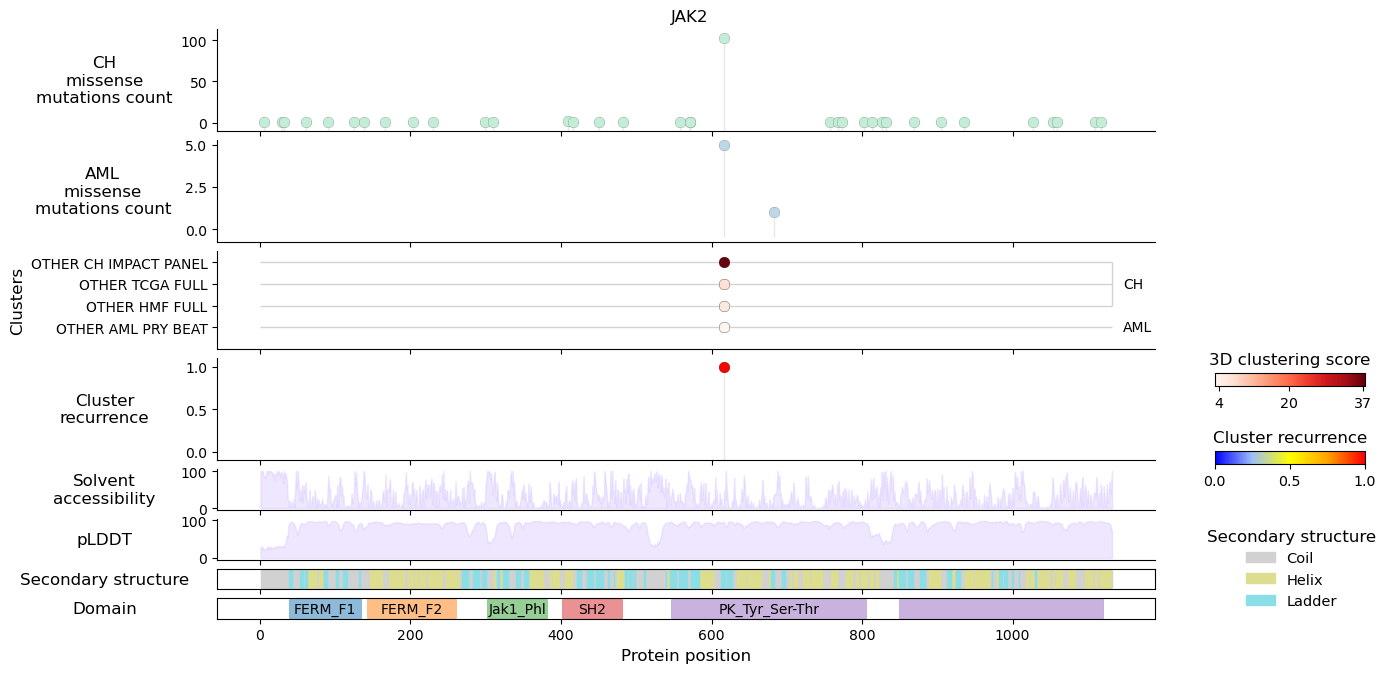

/tmp/jobs/spellegrini/10373218/ipykernel_952499/2679420442.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/2679420442.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


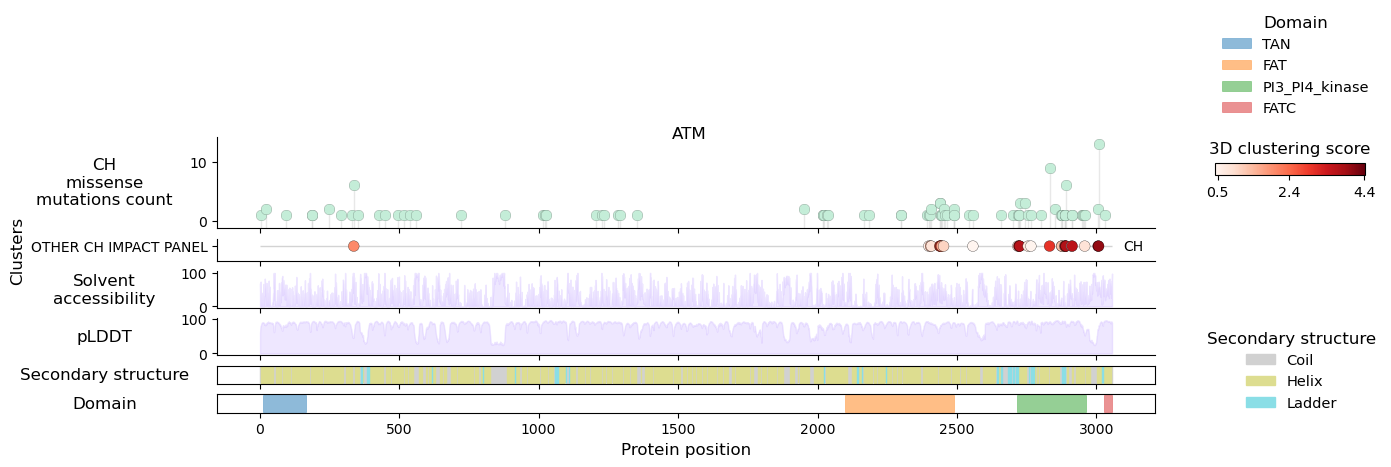

/tmp/jobs/spellegrini/10373218/ipykernel_952499/2679420442.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/2679420442.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


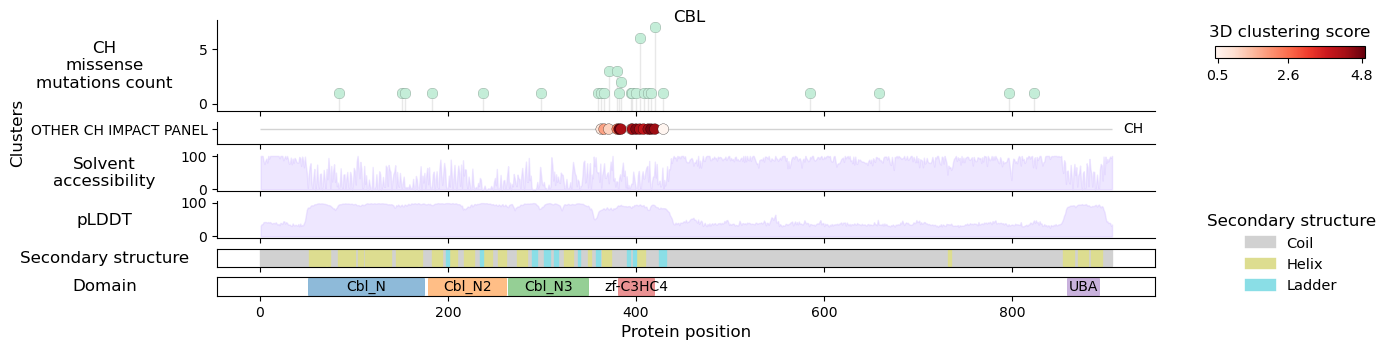

/tmp/jobs/spellegrini/10373218/ipykernel_952499/2679420442.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/2679420442.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


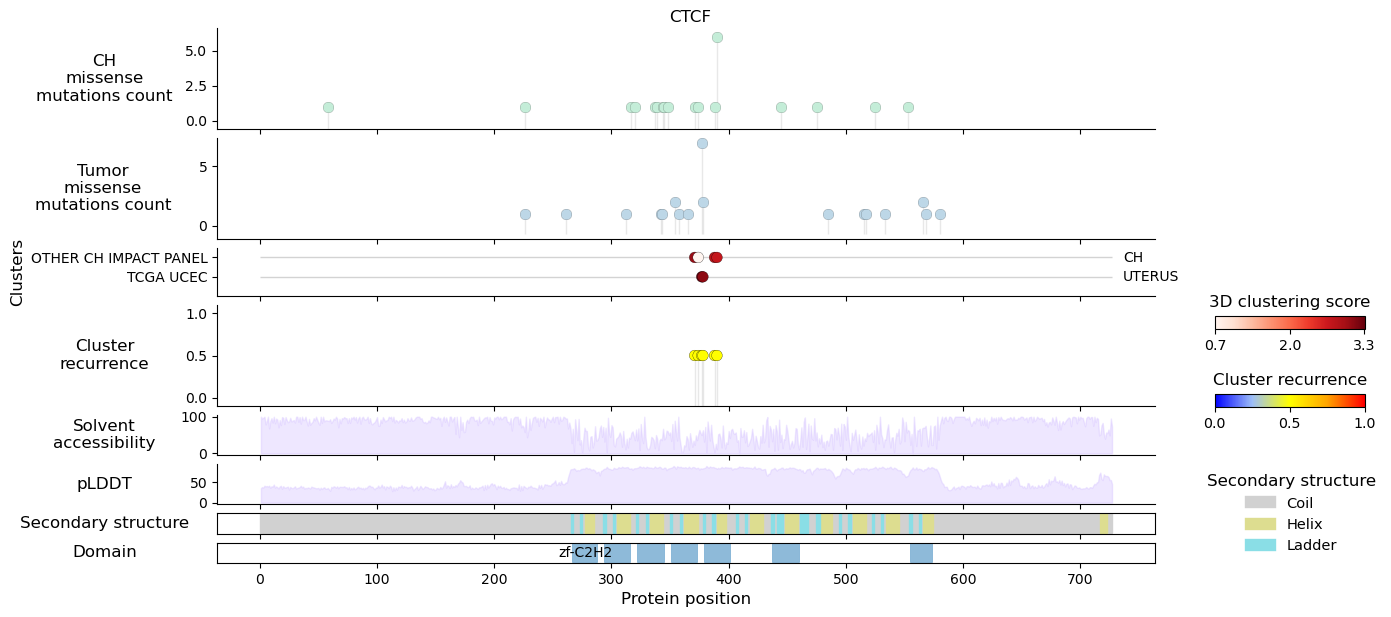

/tmp/jobs/spellegrini/10373218/ipykernel_952499/2679420442.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/2679420442.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


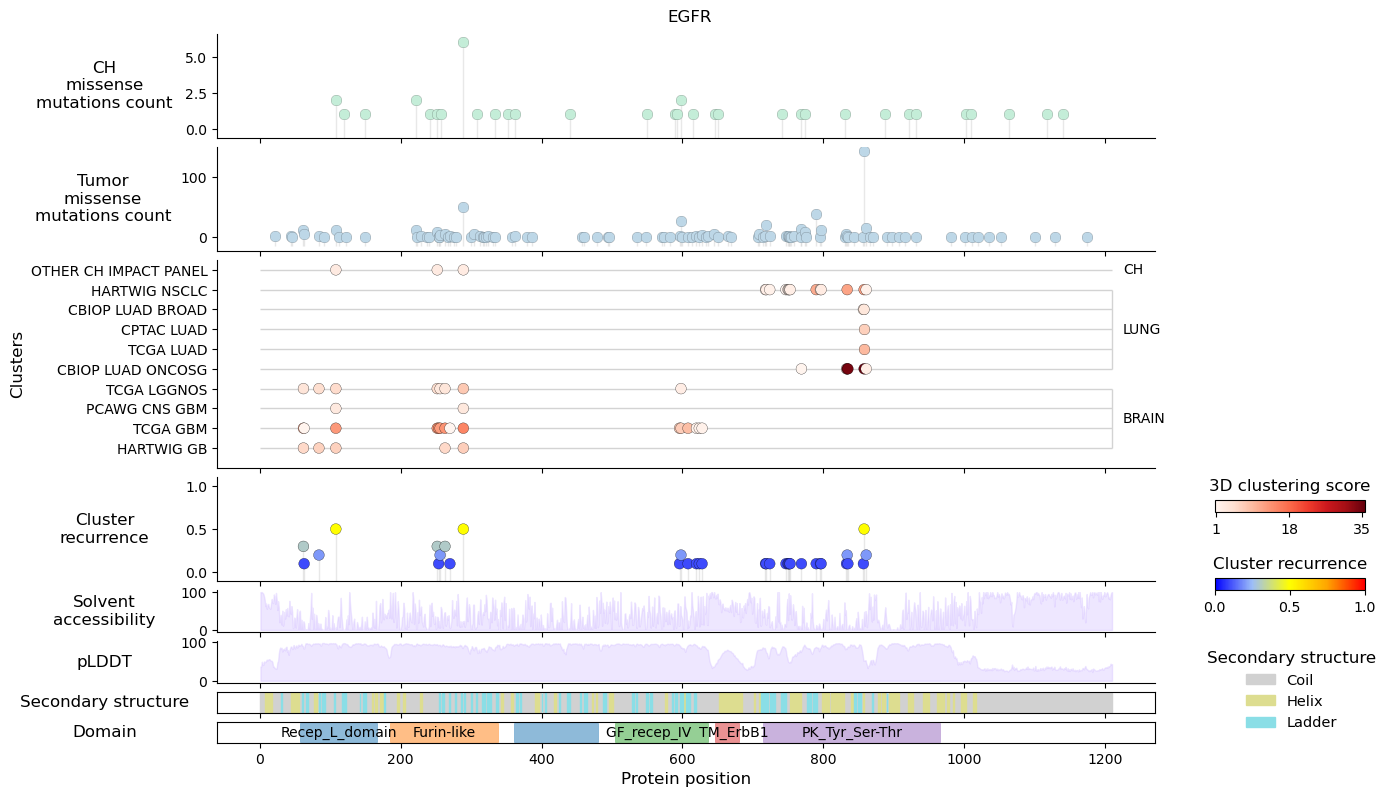

/tmp/jobs/spellegrini/10373218/ipykernel_952499/2679420442.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


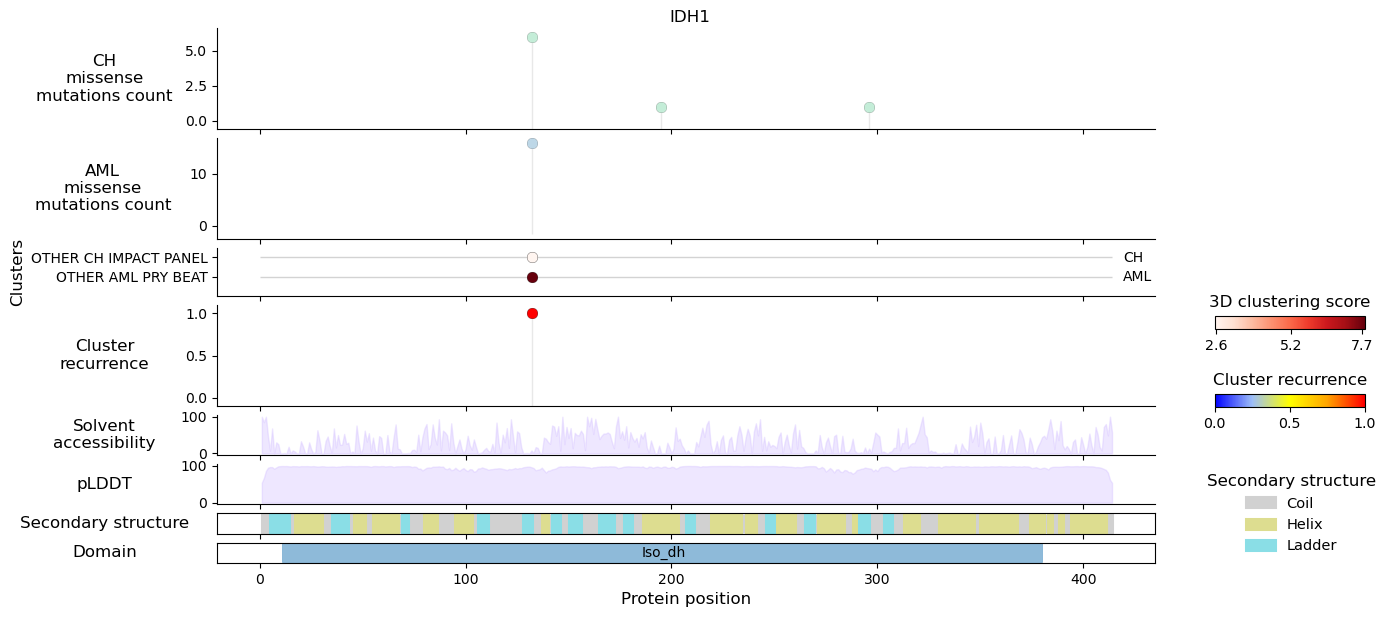

/tmp/jobs/spellegrini/10373218/ipykernel_952499/2679420442.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


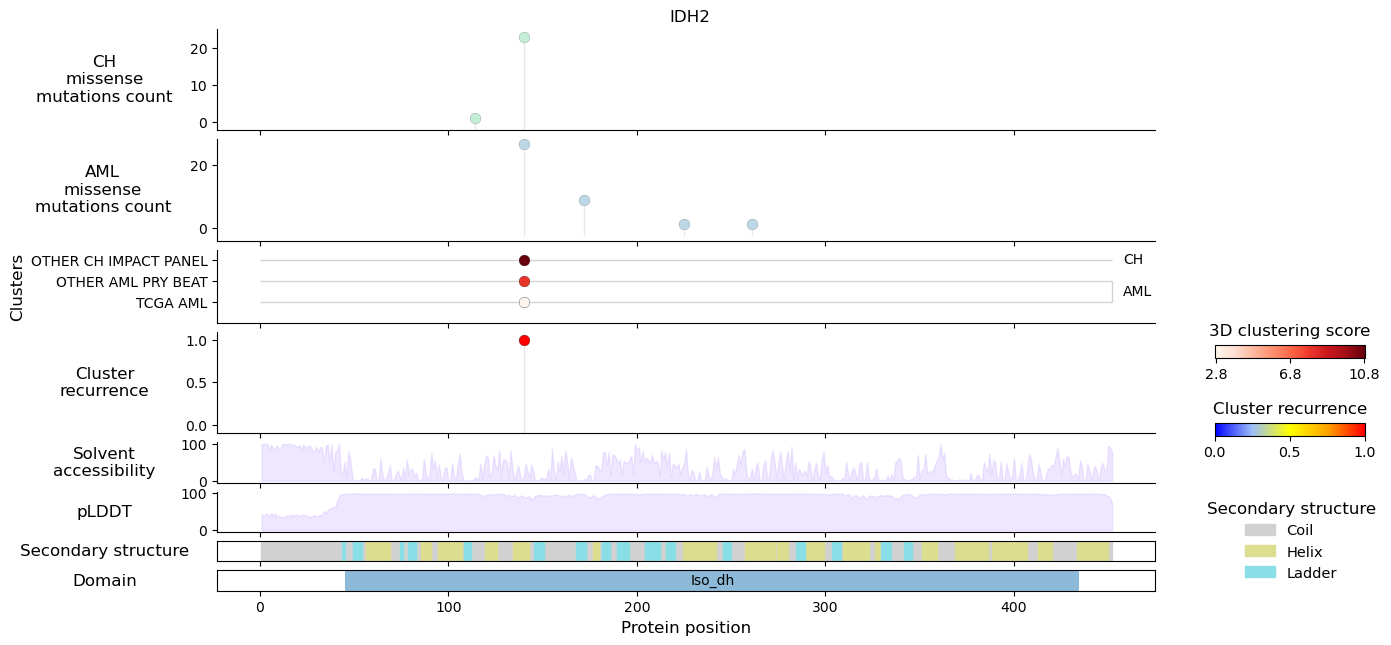

/tmp/jobs/spellegrini/10373218/ipykernel_952499/2679420442.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


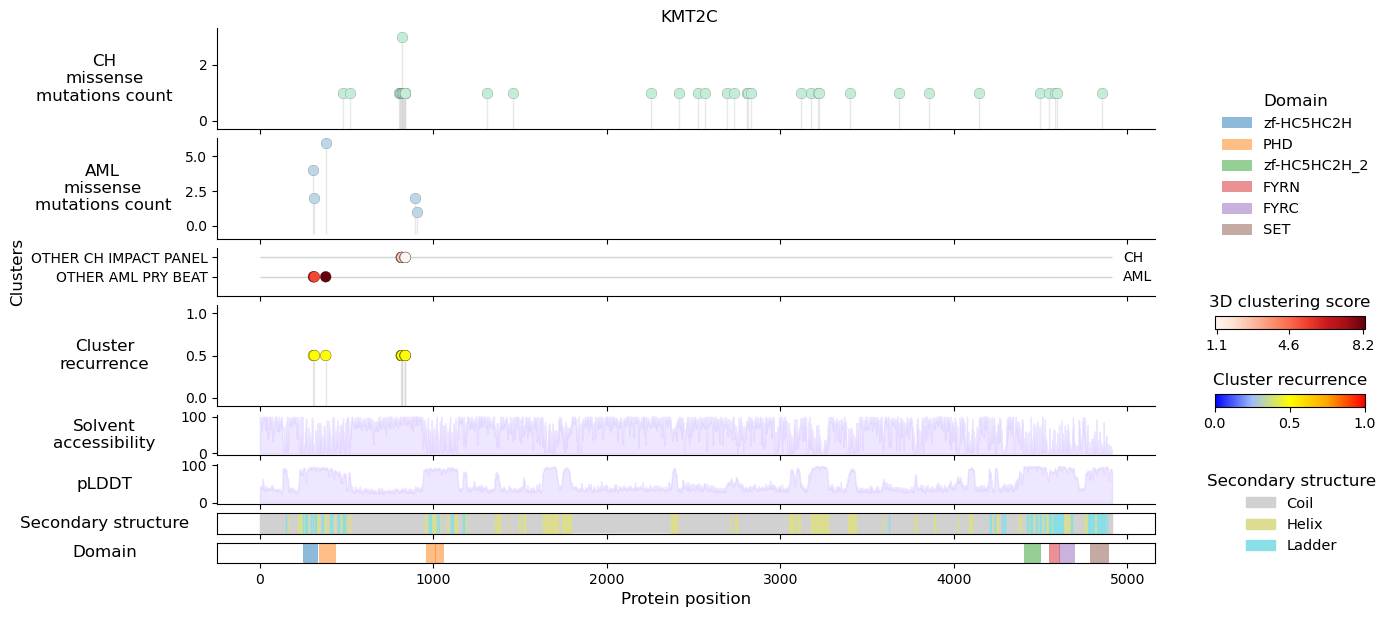

/tmp/jobs/spellegrini/10373218/ipykernel_952499/2679420442.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/2679420442.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


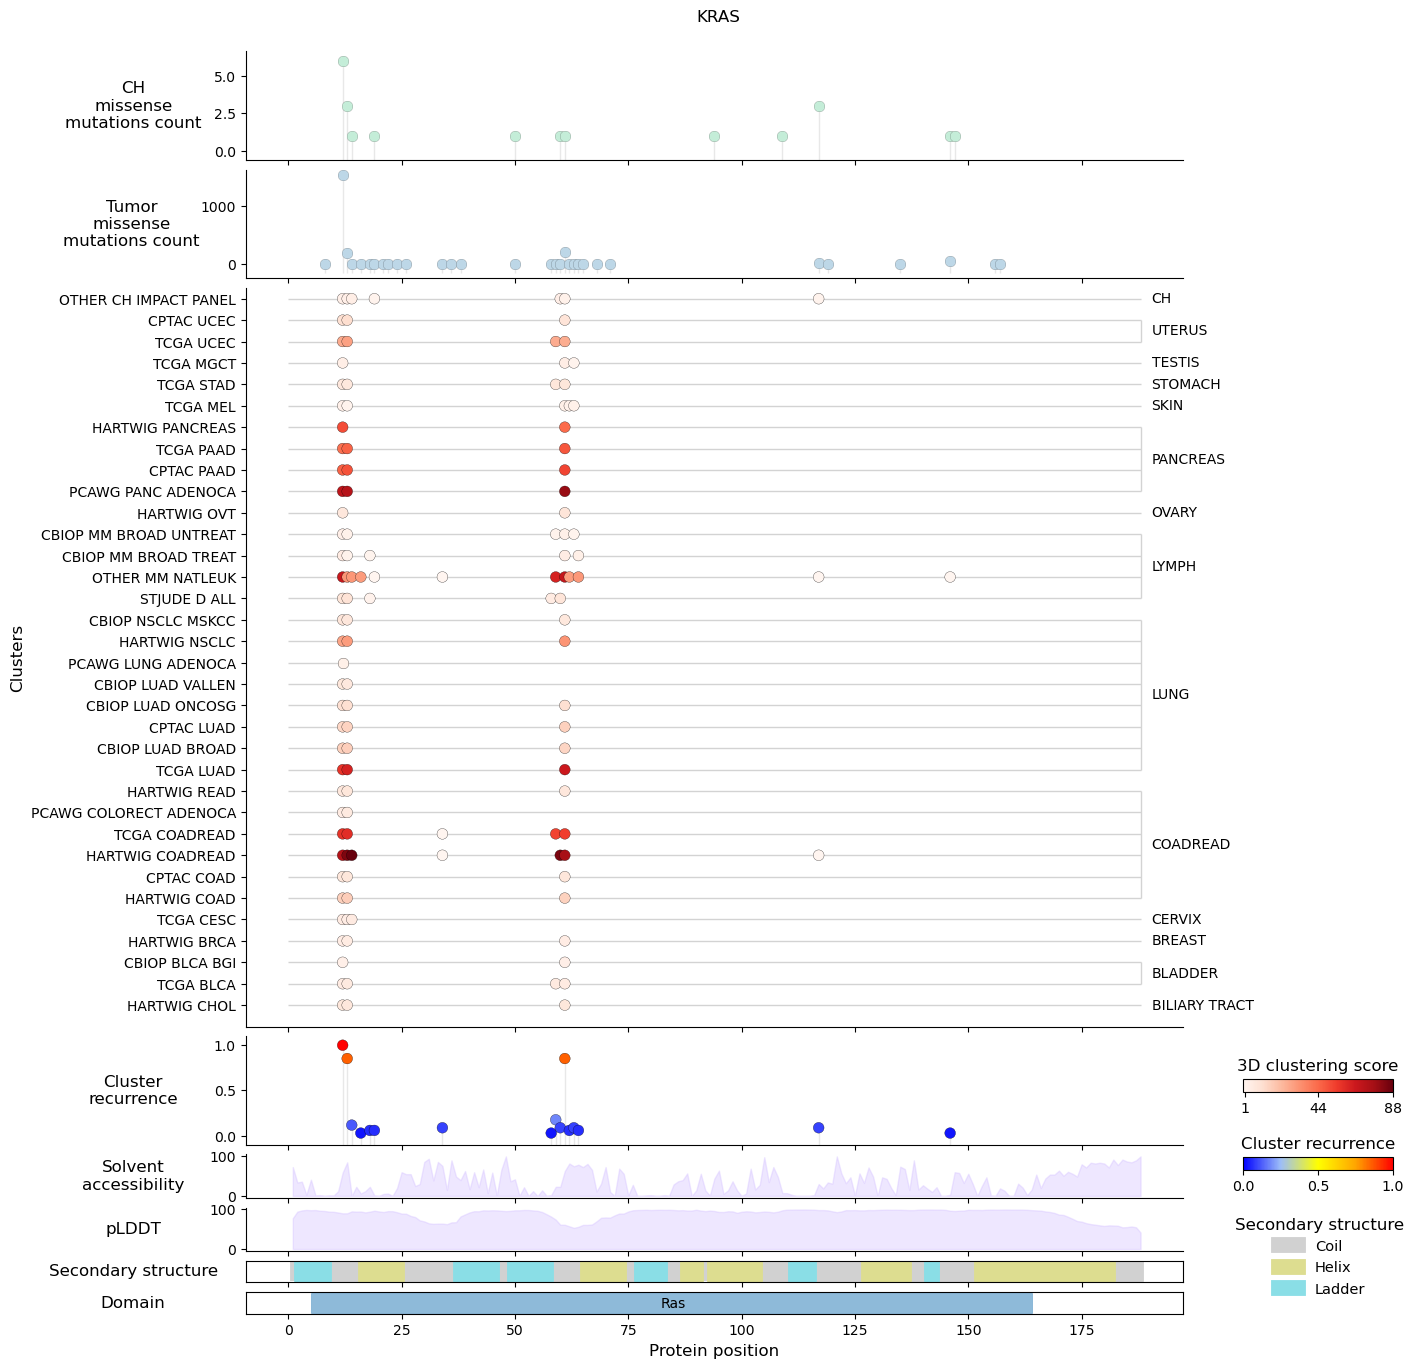

/tmp/jobs/spellegrini/10373218/ipykernel_952499/2679420442.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/2679420442.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


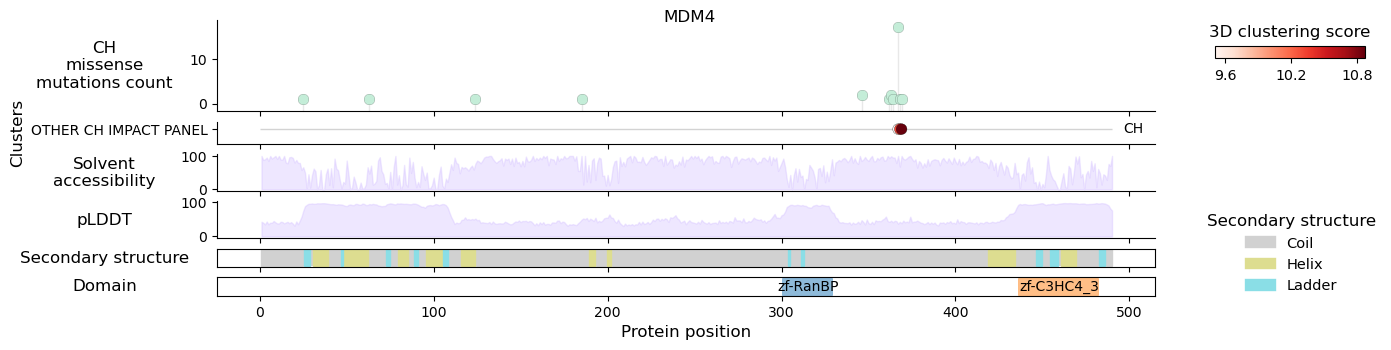

/tmp/jobs/spellegrini/10373218/ipykernel_952499/2679420442.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


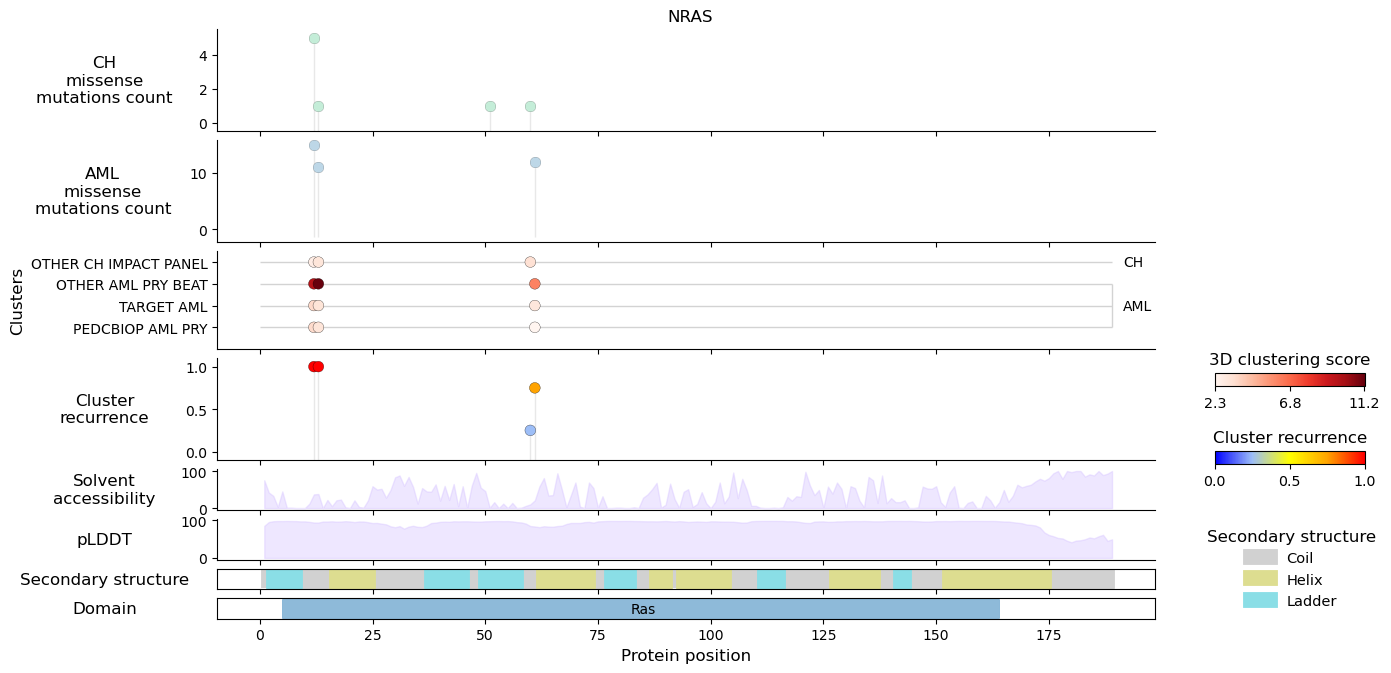

/tmp/jobs/spellegrini/10373218/ipykernel_952499/2679420442.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


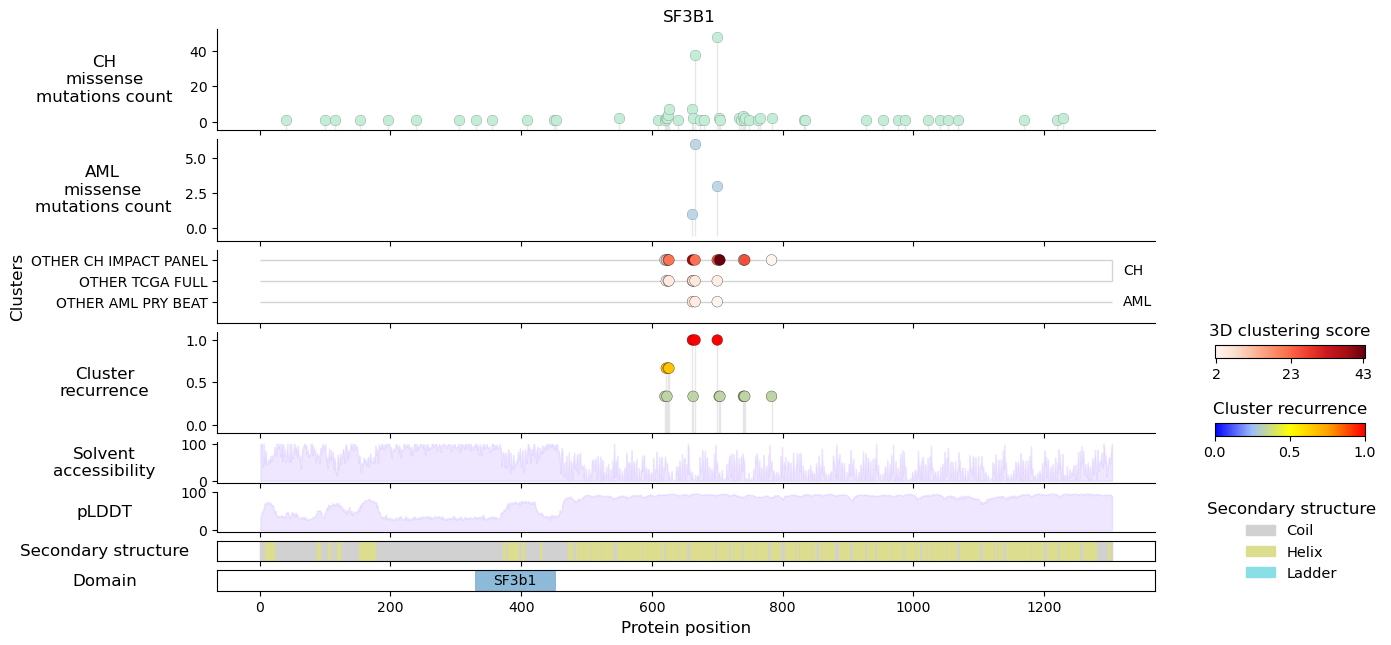

/tmp/jobs/spellegrini/10373218/ipykernel_952499/2679420442.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


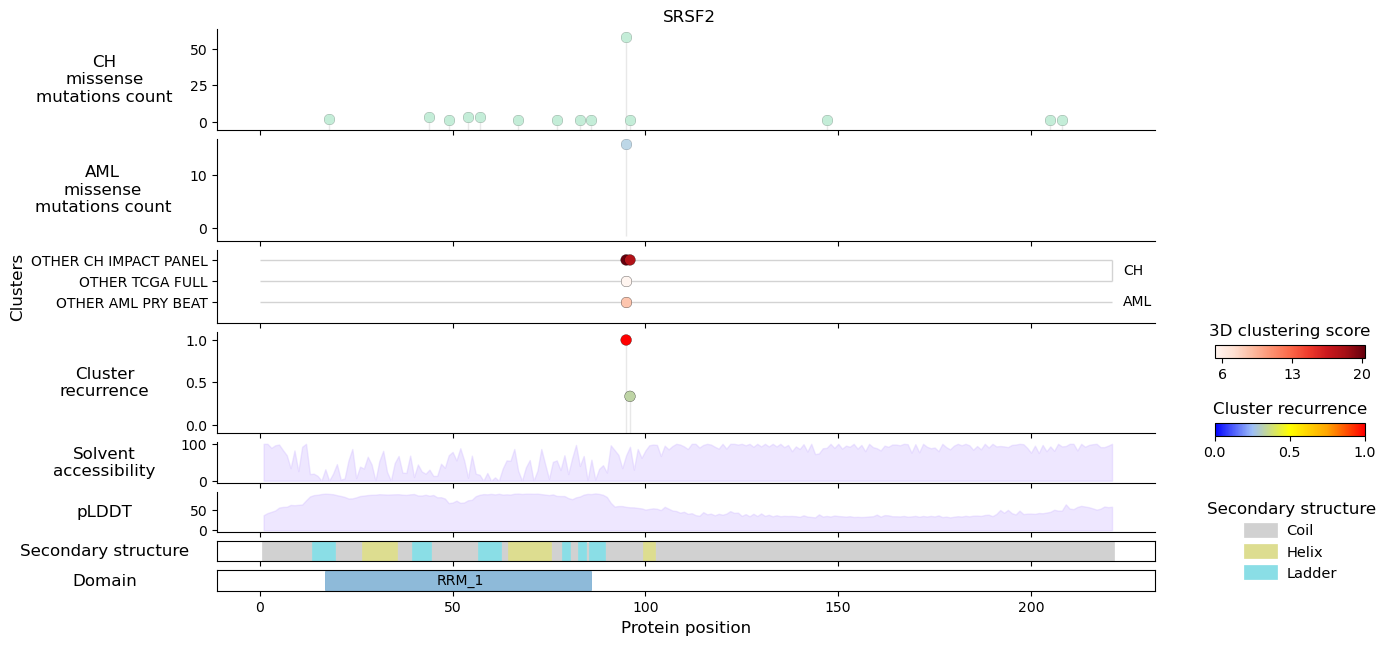

/tmp/jobs/spellegrini/10373218/ipykernel_952499/2679420442.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/2679420442.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


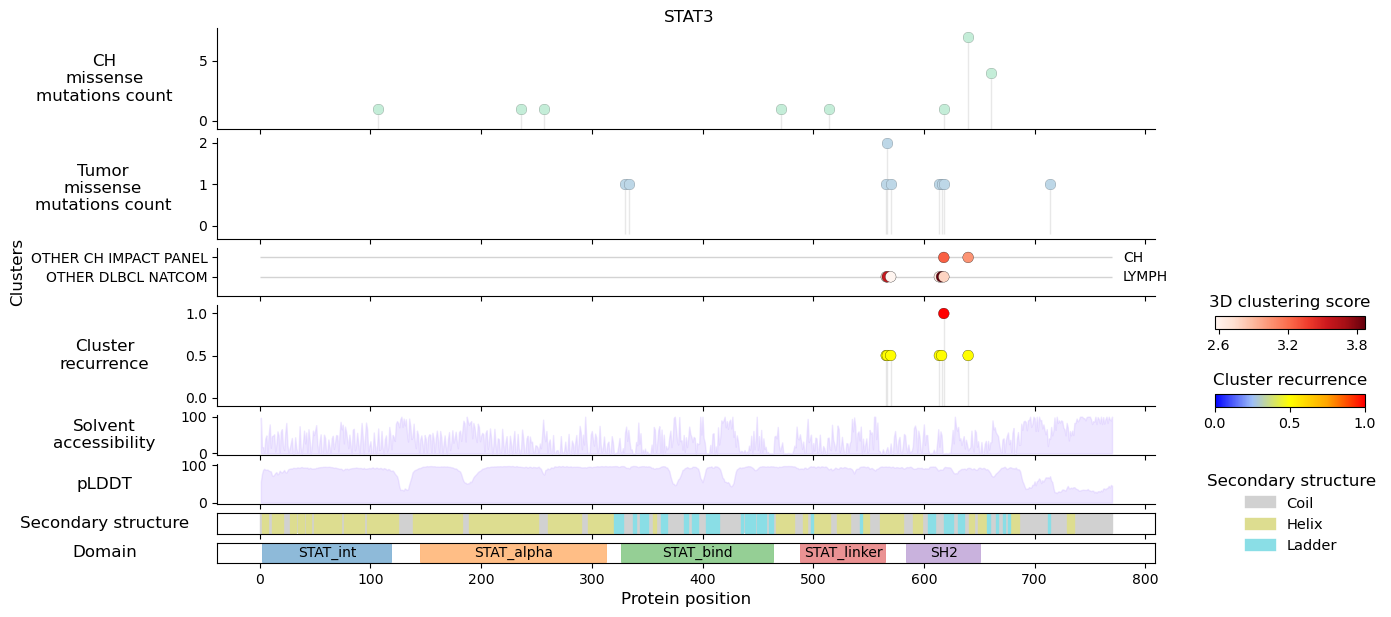

/tmp/jobs/spellegrini/10373218/ipykernel_952499/2679420442.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/2679420442.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


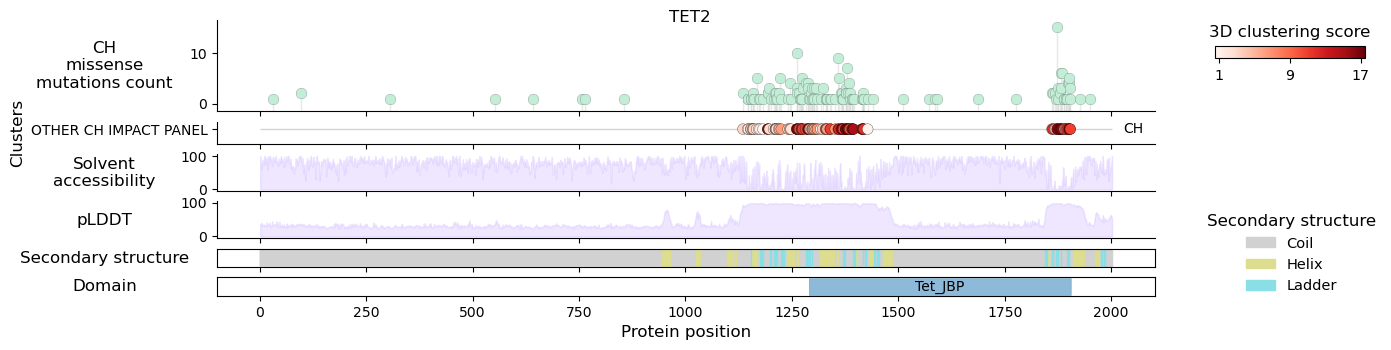

/tmp/jobs/spellegrini/10373218/ipykernel_952499/2679420442.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/2679420442.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


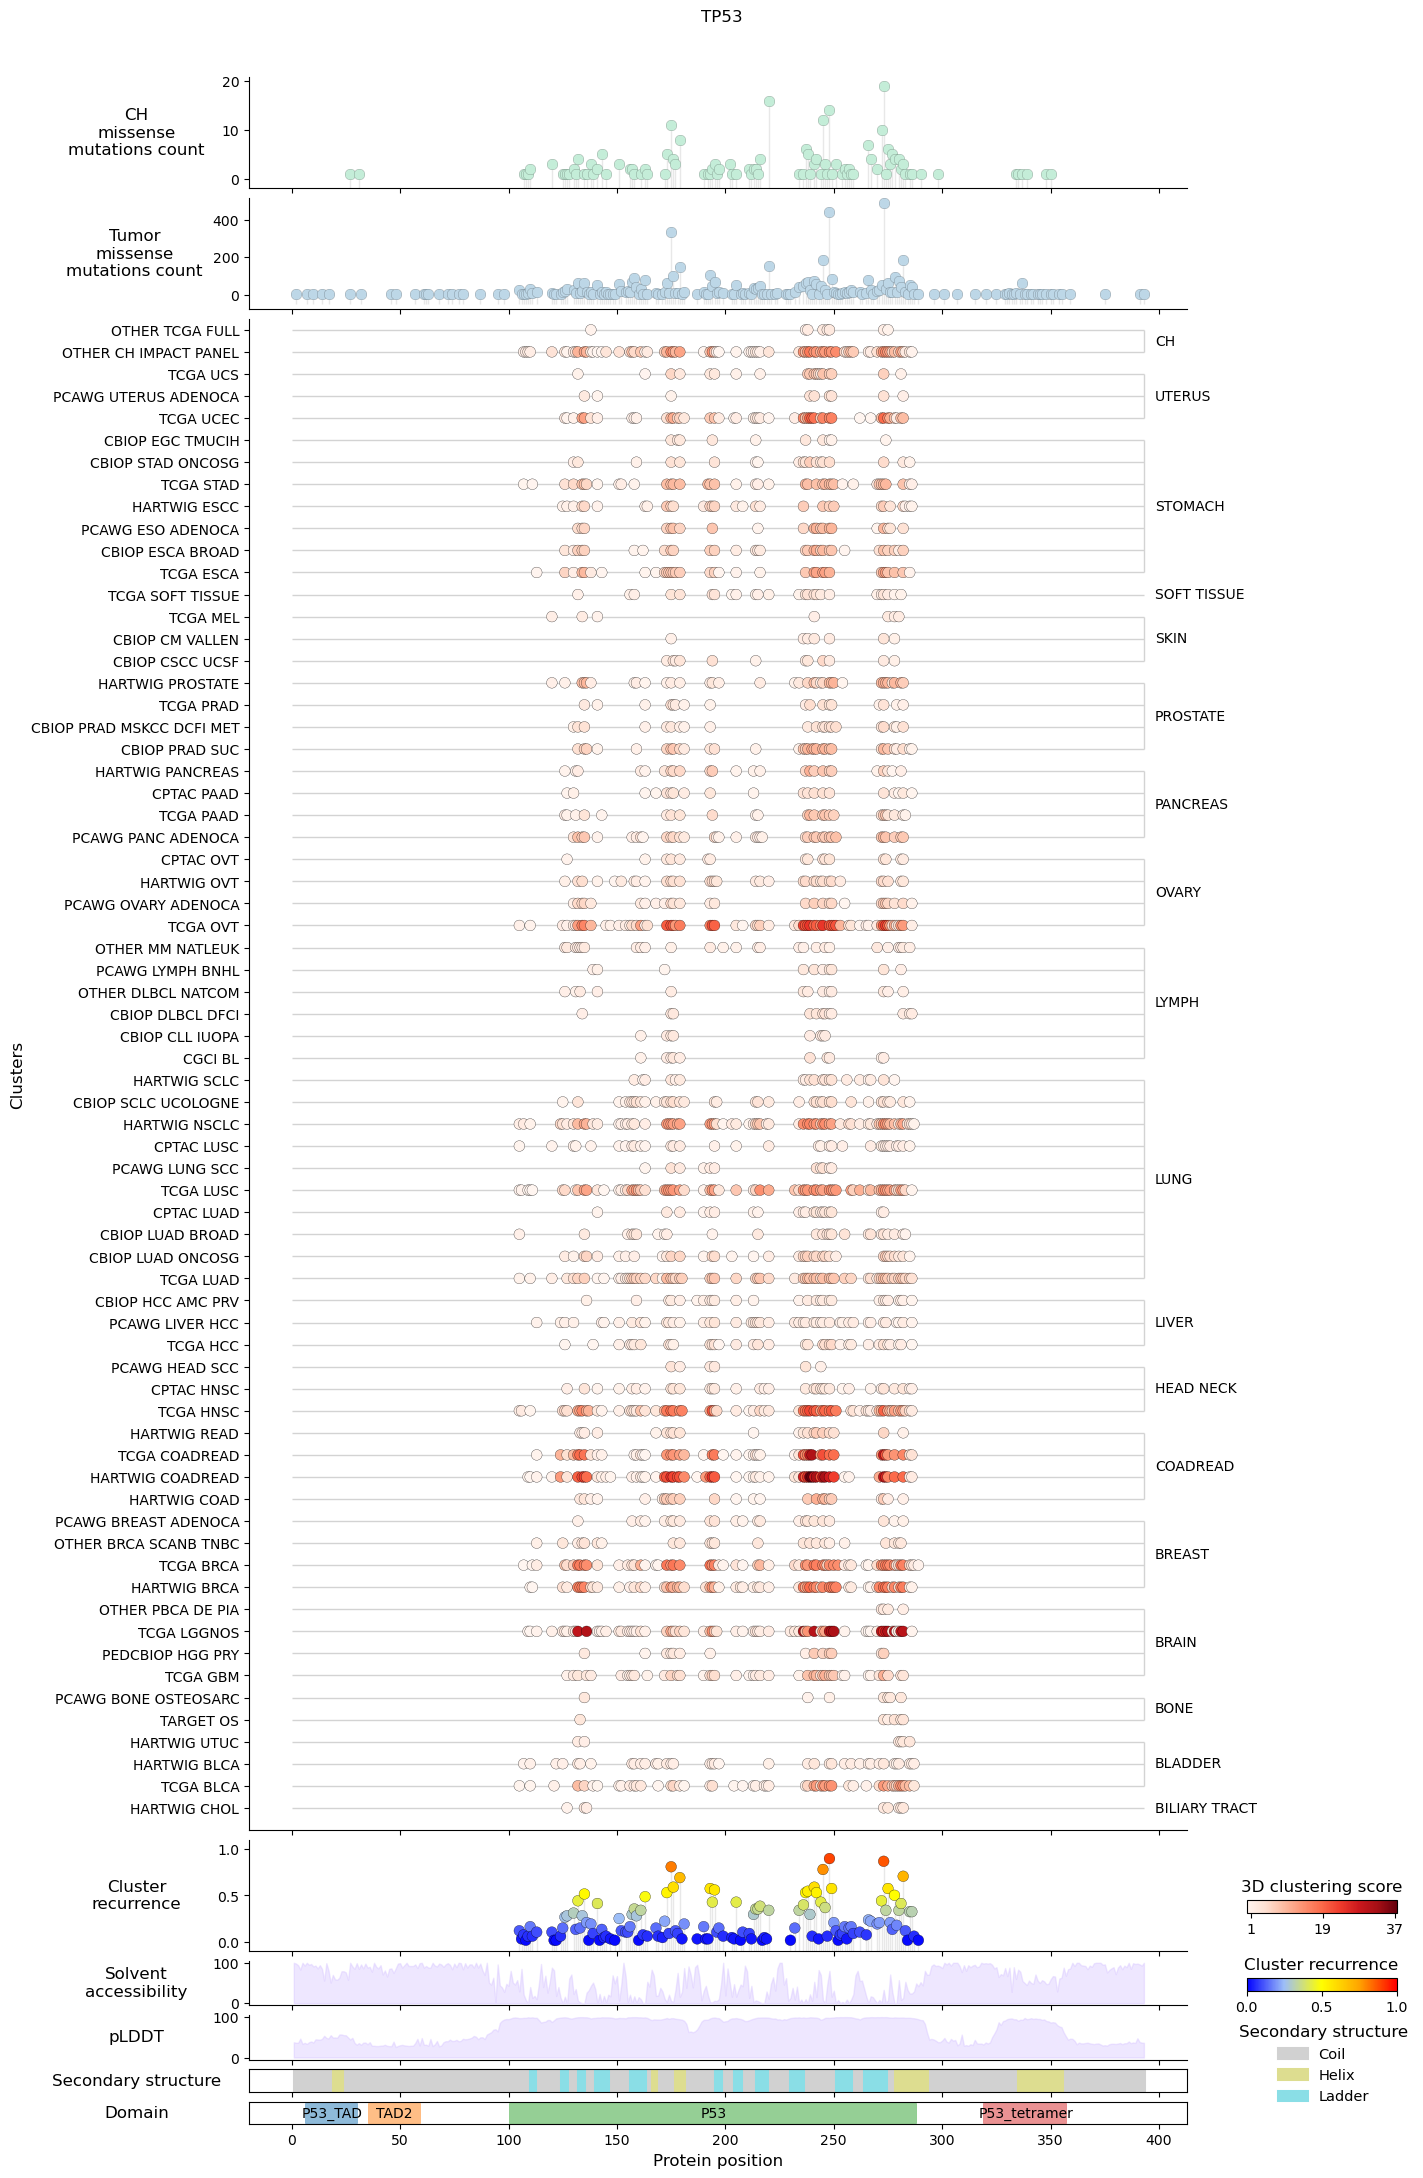

/tmp/jobs/spellegrini/10373218/ipykernel_952499/2679420442.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


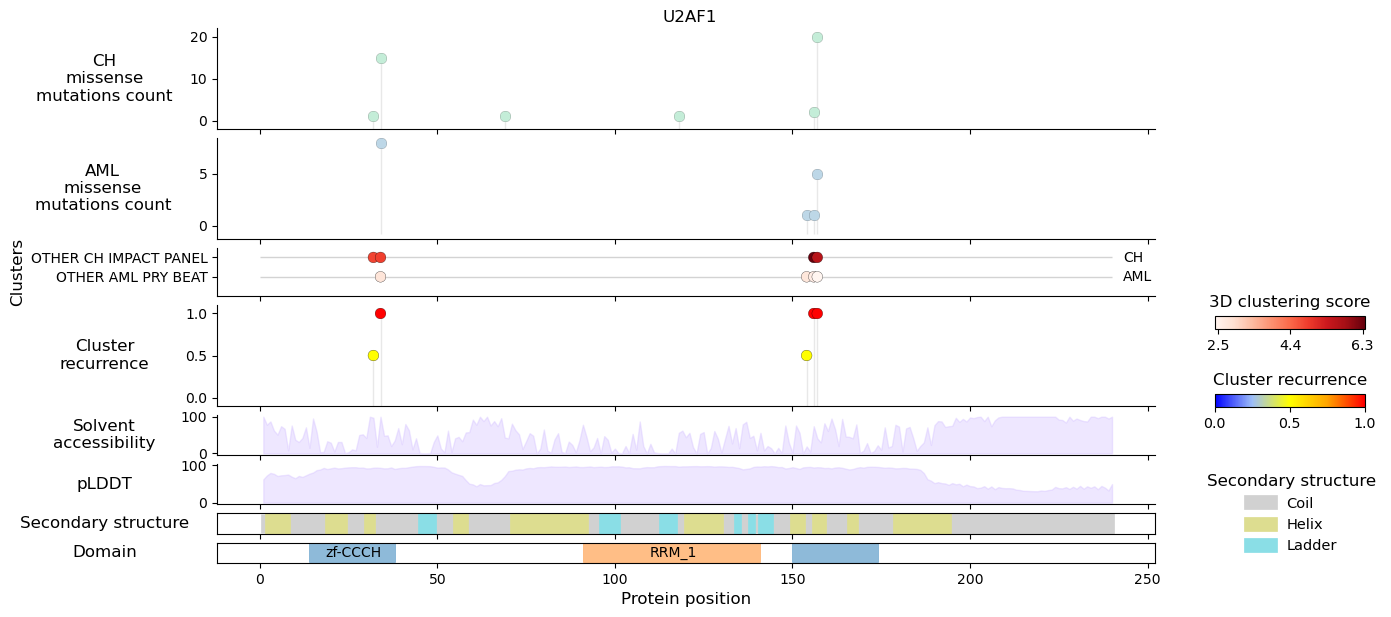

Gene, Uniprot ID tuple for cluster conservation: [('DNMT3A', 'Q9Y6K1'), ('EGFR', 'P00533'), ('SF3B1', 'O75533')]


In [122]:
genes_cluster_conservation = ["DNMT3A", "SF3B1", "APOBR", "EGFR"]
uni_id_cluster_conservation = []

for gene in gene_cohort_ch_df[gene_cohort_ch_df["Cohort"] == "OTHER_WXS_CH_IMPACT_PANEL"].Gene.values[0]:
    if gene != "GNAS":

        o3d_gene_dict = o3d_dict[gene] 
        
        if gene not in o3d_seq_df.Gene.values:
            cohort_1 = list(o3d_gene_dict.keys())[0]
            o3d_seq_df_gene = f"{o3d_ch_output_dir}/{cohort_1}/{cohort_1}.seq_df.processed.tsv"
            o3d_seq_df_gene = pd.read_table(o3d_seq_df_gene)
        else:
            o3d_seq_df_gene = o3d_seq_df.copy()

        uni_id, tr_id = o3d_seq_df_gene.loc[o3d_seq_df_gene["Gene"] == gene, ["Uniprot_ID", "Ens_Transcr_ID"]].values[0]
        pdb_tool_gene = o3d_pdb_tool_df[o3d_pdb_tool_df["Uniprot_ID"] == uni_id].reset_index(drop=True)
        domain_gene = o3d_annot_df[(o3d_annot_df["Gene"] == gene) & 
                                   (o3d_annot_df["Type"] == "DOMAIN") & 
                                   (o3d_annot_df["Evidence"] == "Pfam")].reset_index(drop=True)
        disorder_gene = disorder_df[disorder_df["Uniprot_ID"] == uni_id].reset_index(drop=True)
        if gene in ["EGFR", "ERBB2"]:
            domain_gene.Description = domain_gene.Description.replace("GF_recep_IV", "GF_recep_IV      ")
            domain_gene.Description = domain_gene.Description.replace("TM_ErbB1", "   TM_ErbB1")
        if gene in ["DNMT3A"]:
            domain_gene.Description = domain_gene.Description.replace("ADD_DNMT3", "ADD_DNMT3             ")
            domain_gene.Description = domain_gene.Description.replace("ADDz_Dnmt3b", "        ADDz_Dnmt3b")
        
        cohort_df_gene = cohort_all_ch_df[cohort_all_ch_df.COHORT.isin(o3d_gene_dict.keys())]

        if len(cohort_df_gene.GENERAL_CANCER_TYPE.unique()) == 1:
            cohort_df_gene = cohort_all_df[cohort_all_df.COHORT.isin(o3d_gene_dict.keys())]    
            cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
            cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]
            cohort_df_gene = cohort_df_gene.sort_values(["ORDER", "GENERAL_CANCER_TYPE", "CANCER_TYPE", "MAX_SCORE"], ascending=[True, True, True, False]).reset_index(drop=True)
        
        else:
            cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]
            cohort_df_gene = cohort_df_gene.sort_values(["GENERAL_CANCER_TYPE", "MAX_SCORE"], ascending=[True, True]).reset_index(drop=True)

        o3d_gene_dict = {k: v for k, v in o3d_gene_dict.items() if k in cohort_df_gene.COHORT.values}
        missense_gene_df = missense_df[missense_df.Cohort.isin(o3d_gene_dict.keys())]
        missense_gene_df = missense_gene_df.groupby(['Gene', 'Pos']).size().reset_index(name='Count')
        missense_gene_df = missense_gene_df[missense_gene_df["Gene"] == gene]
        missense_gene_ch_df = missense_count_ch_df[missense_count_ch_df["Gene"] == gene]
            
        gene_conservation_df = plot_cluster_conservation_ch(o3d_gene_dict,
                                                           missense_gene_df,
                                                           missense_gene_ch_df,
                                                           domain_gene, 
                                                           pd.DataFrame(columns=['DEGRON']),
                                                           disorder_gene,
                                                           pdb_tool_gene,
                                                           cohort_df_gene,
                                                           gene,
                                                           plot_pars,
                                                           o3d_seq_df_gene,
                                                           title=gene,
                                                           absolute_score=True,
                                                           extend_clusters=True,
                                                           return_conservation_df=True)

        if gene in genes_cluster_conservation:
            attr_file_path = f"data/ch/{gene}.ch_clusters_conservation.defattr"
            write_defattr_file(attr_file_path, gene, uni_id, gene_conservation_df)
            uni_id_cluster_conservation.append((gene, uni_id))

print("Gene, Uniprot ID tuple for cluster conservation:", uni_id_cluster_conservation)

### Top genes detected across the three CH cohorts

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


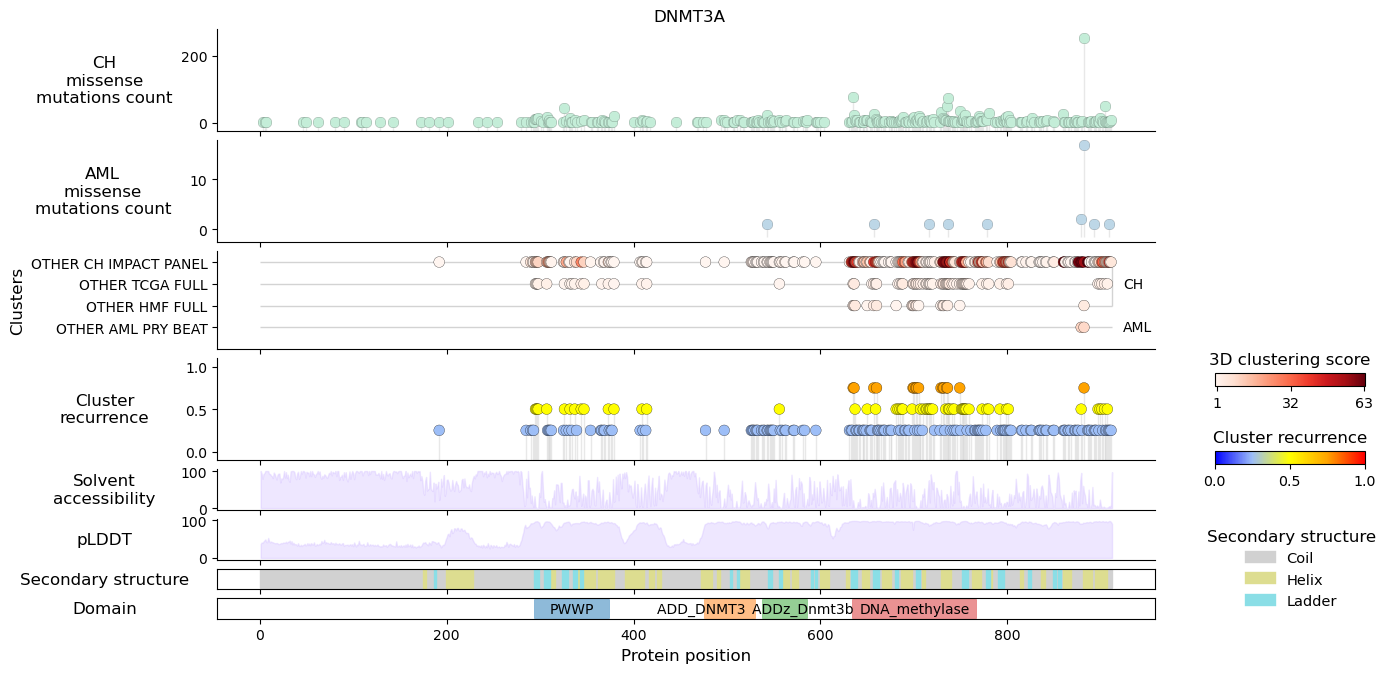

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


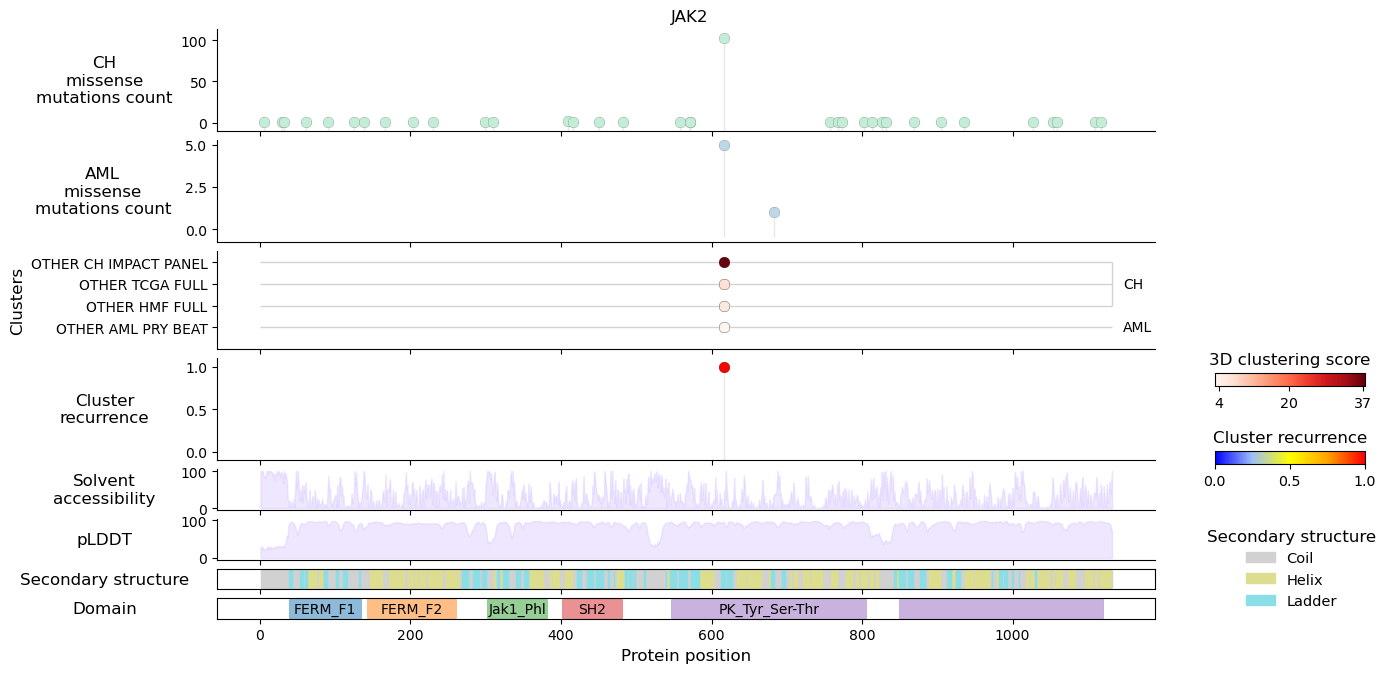

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


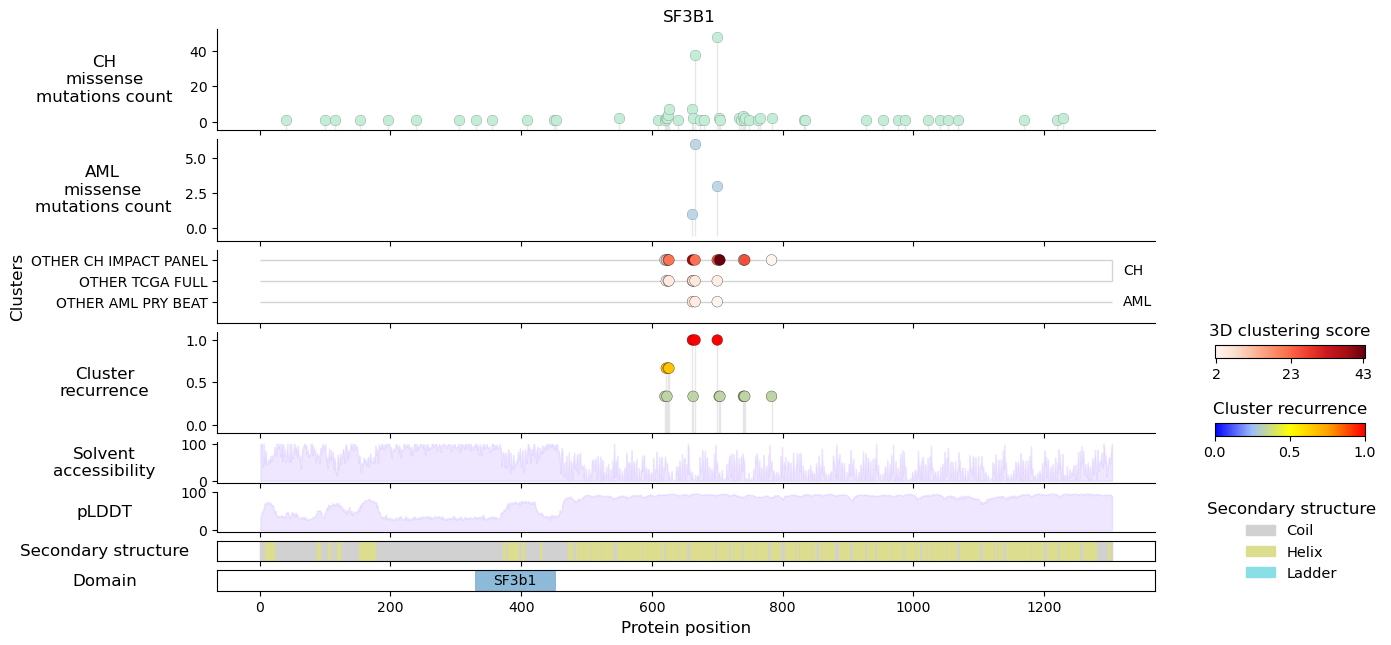

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


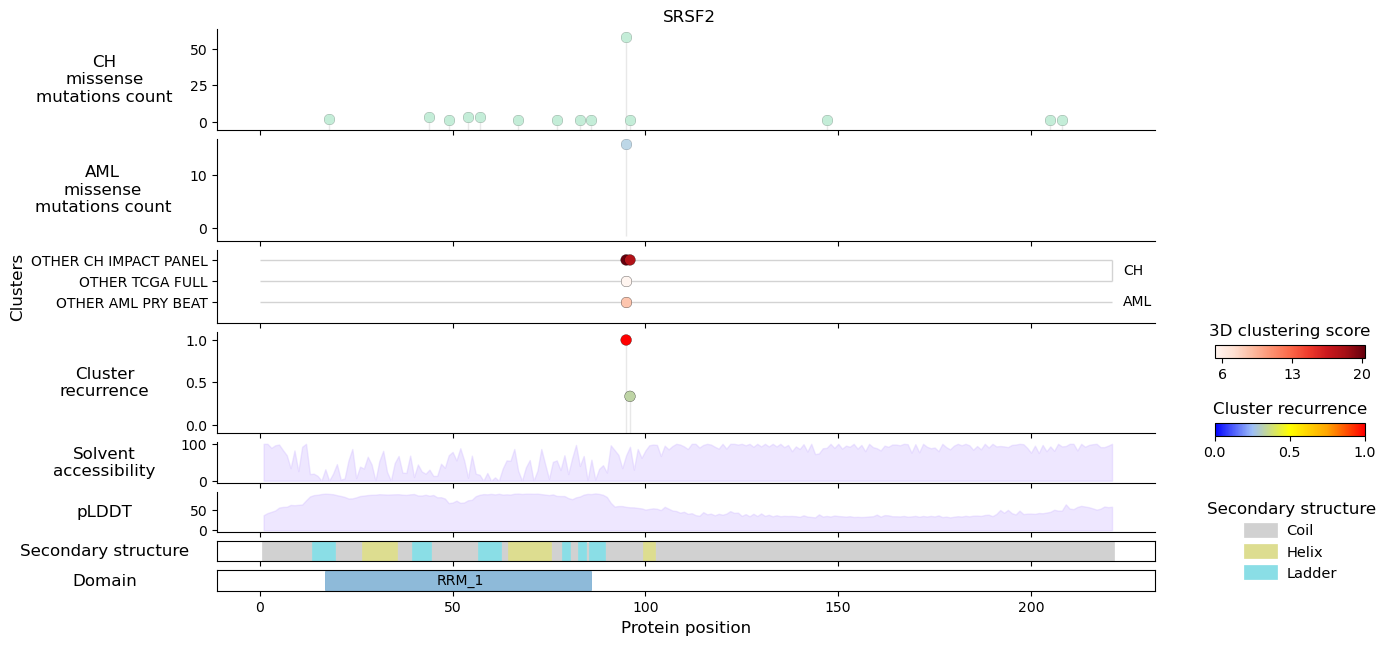

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


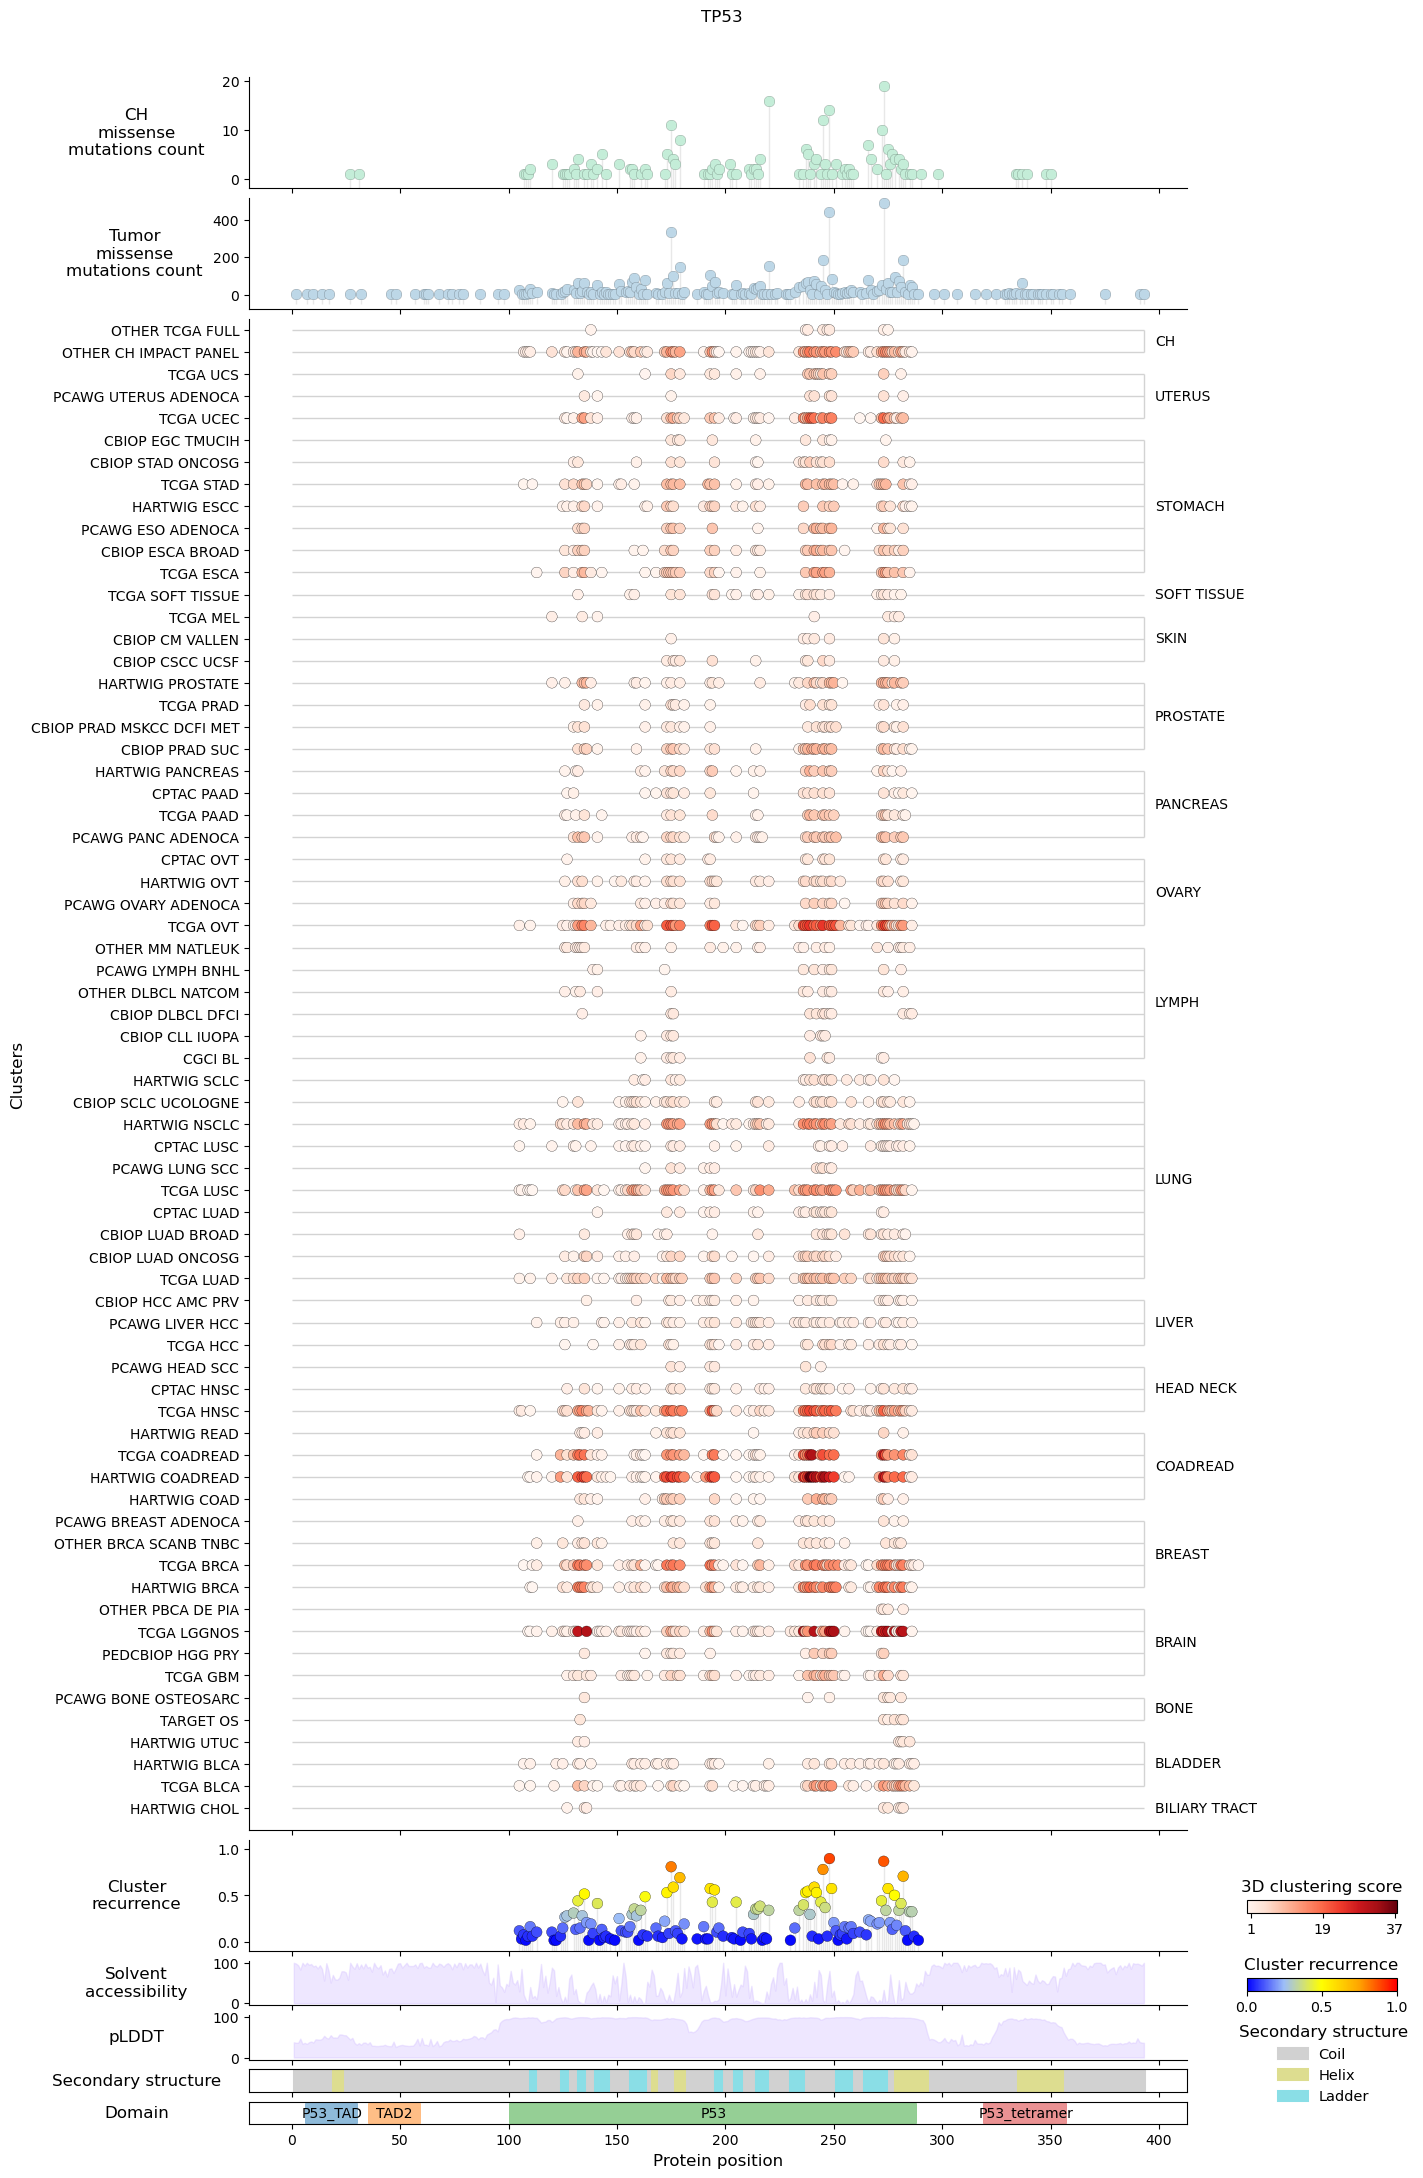

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


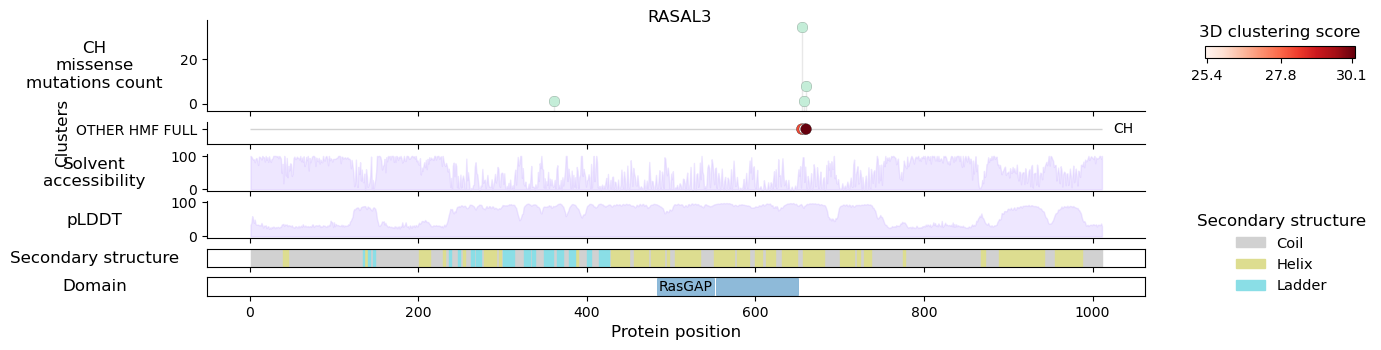

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


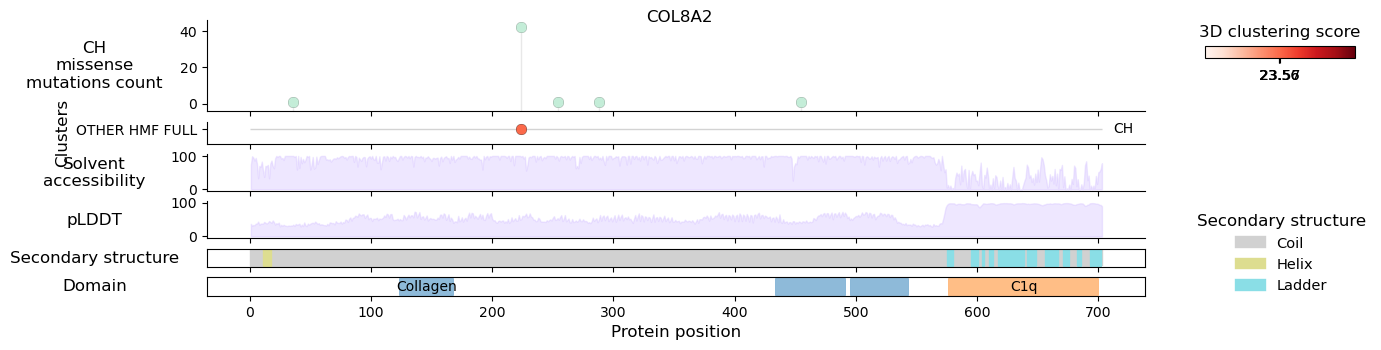

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


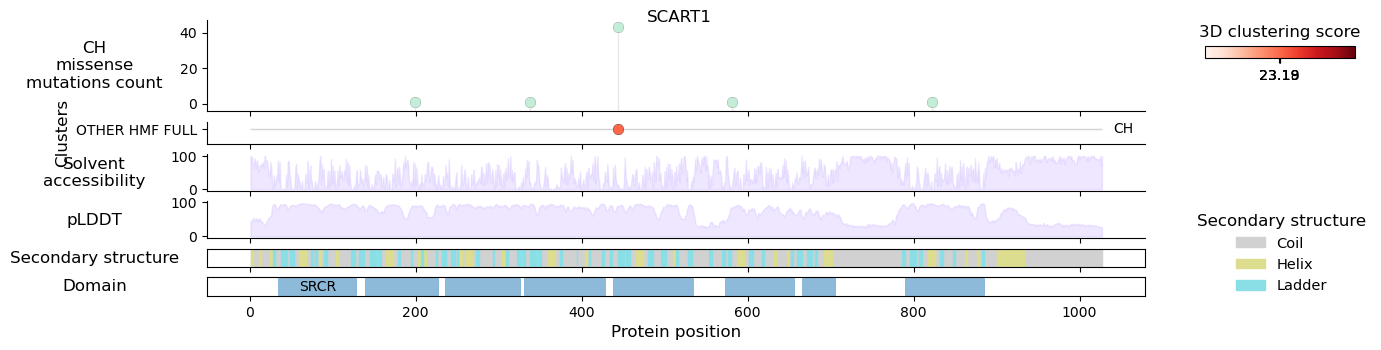

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


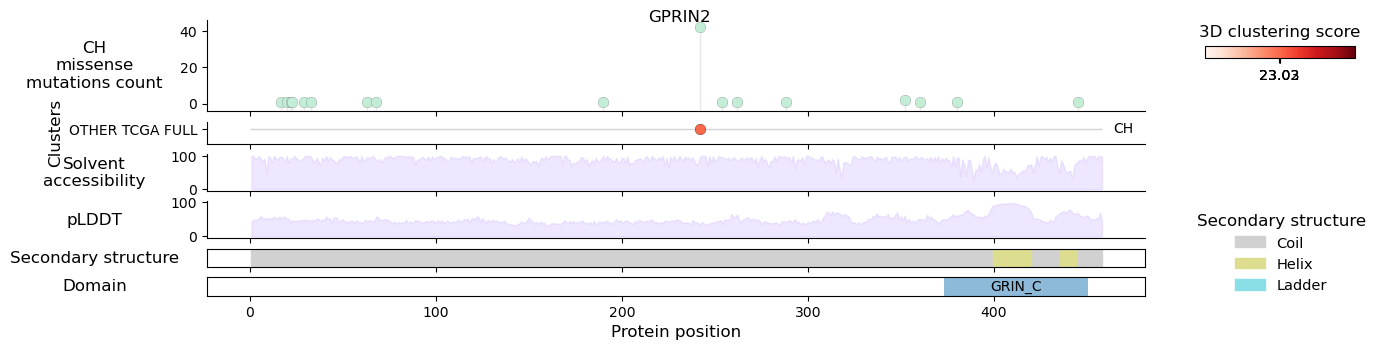

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


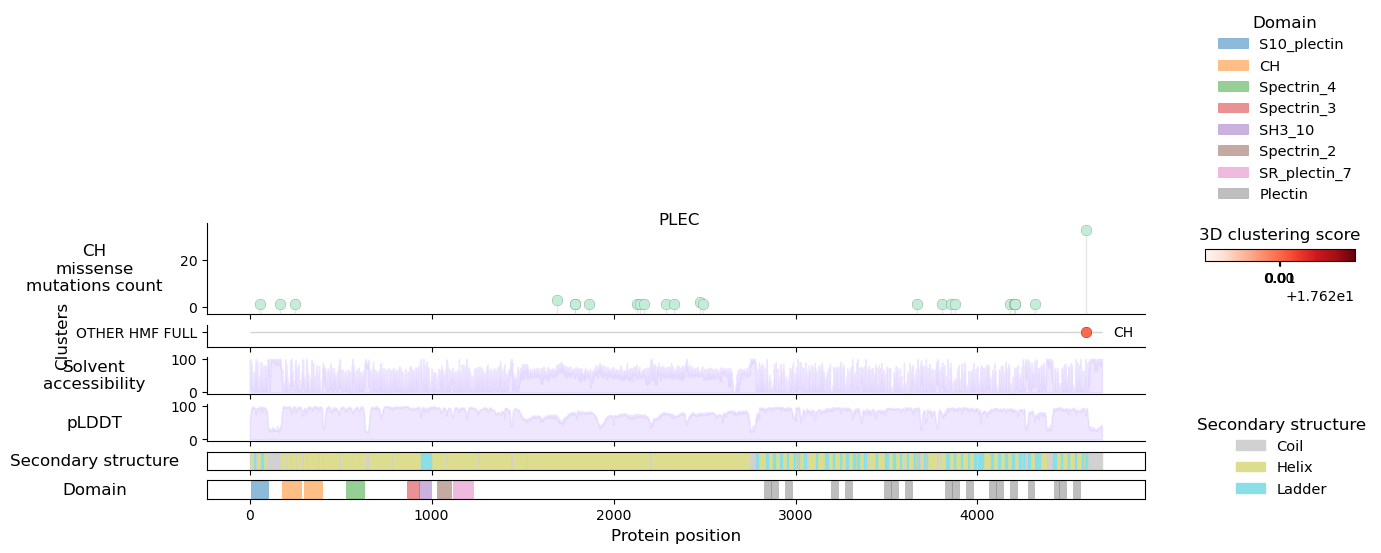

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


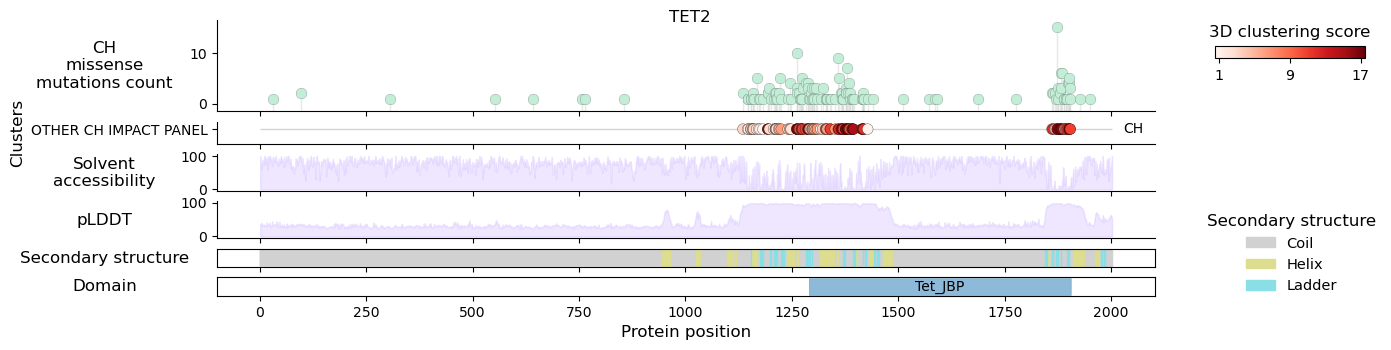

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


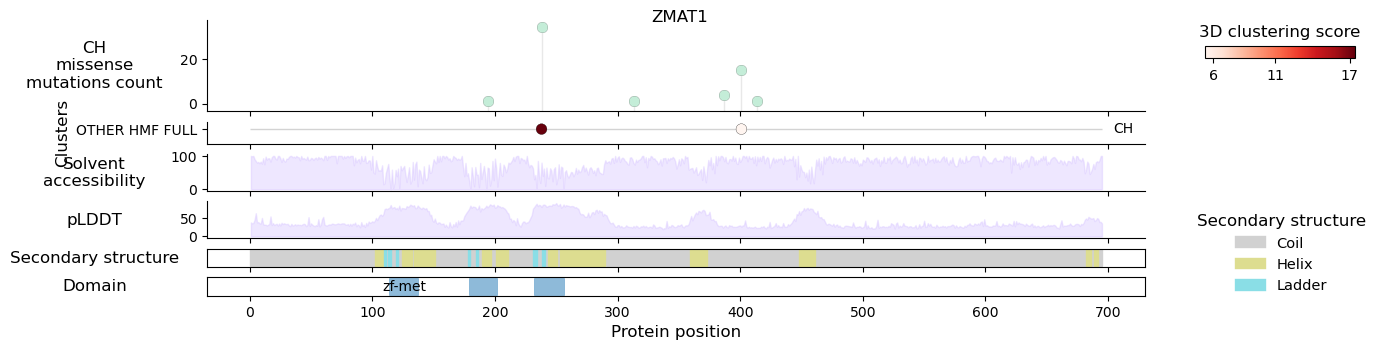

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


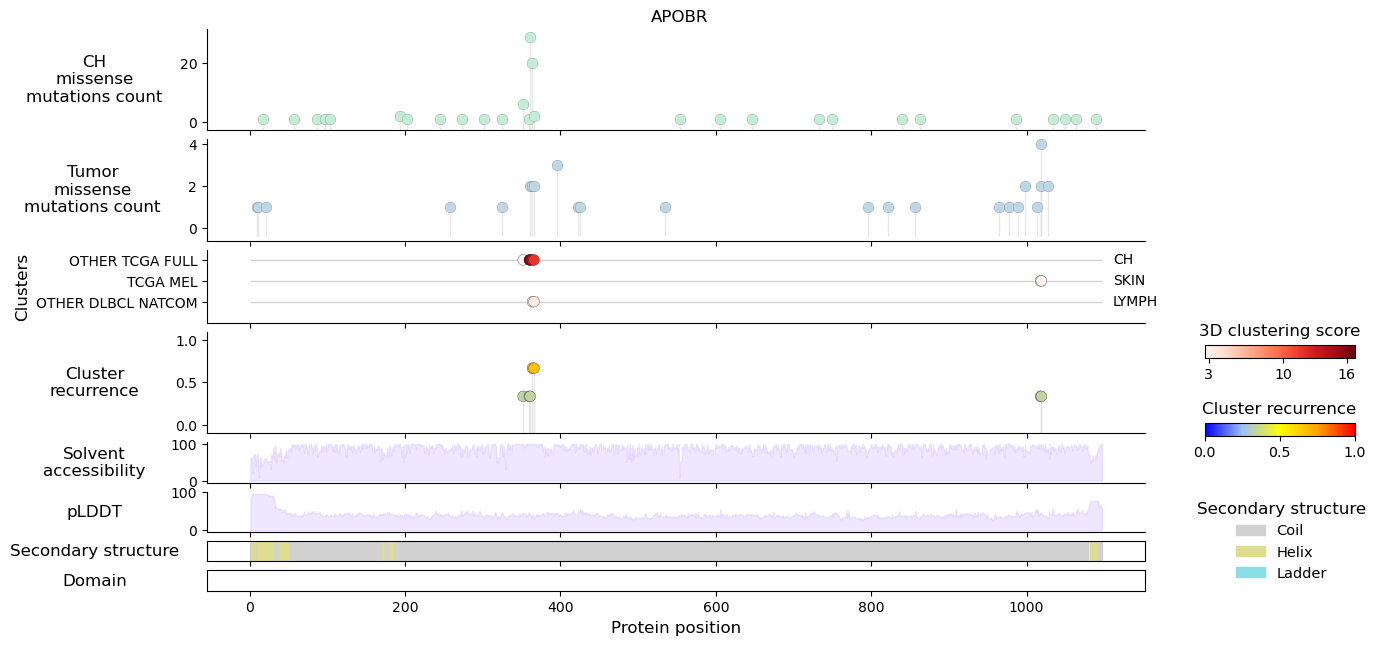

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


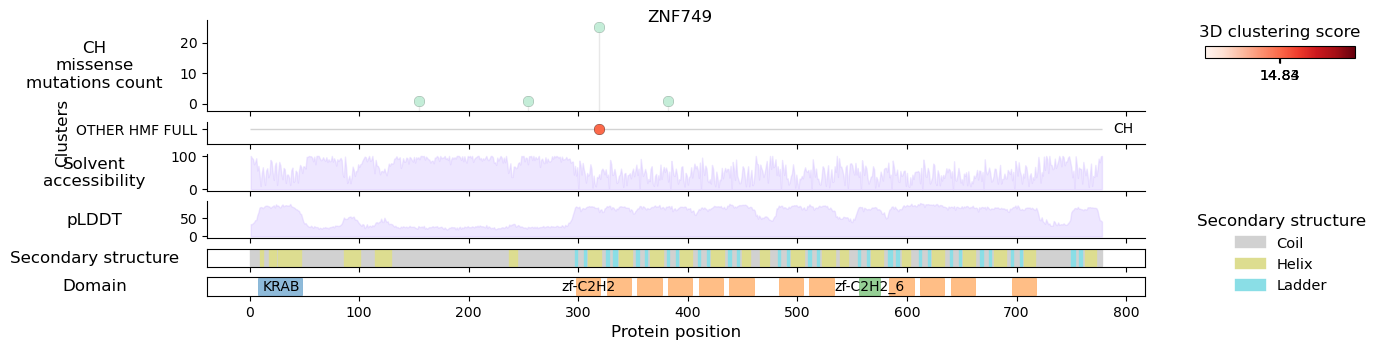

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


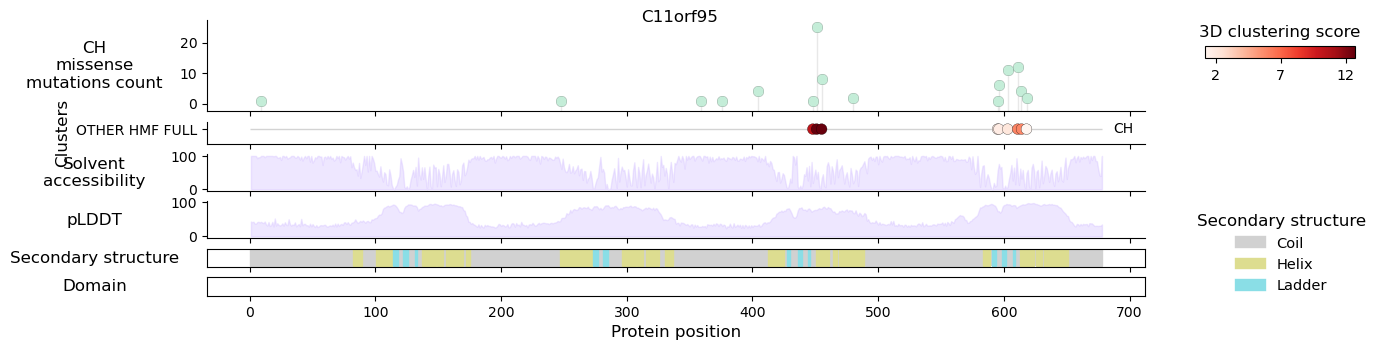

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


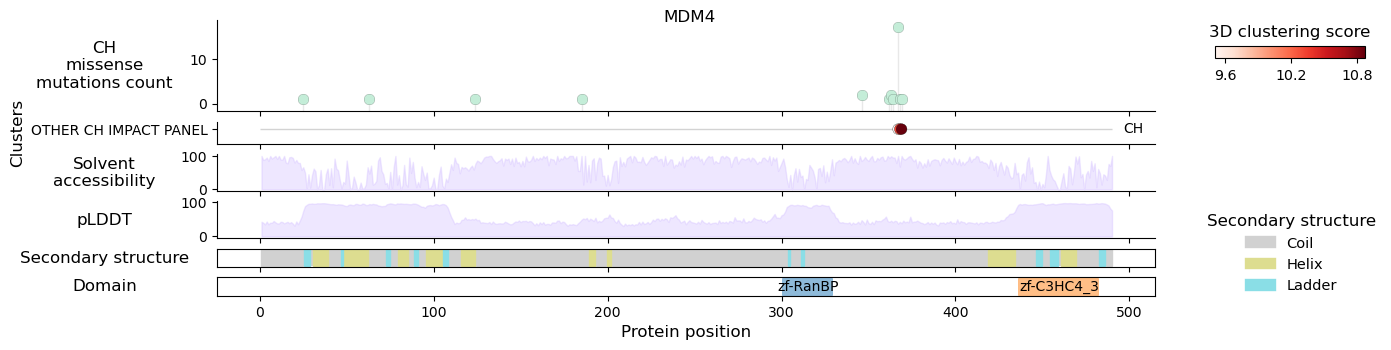

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


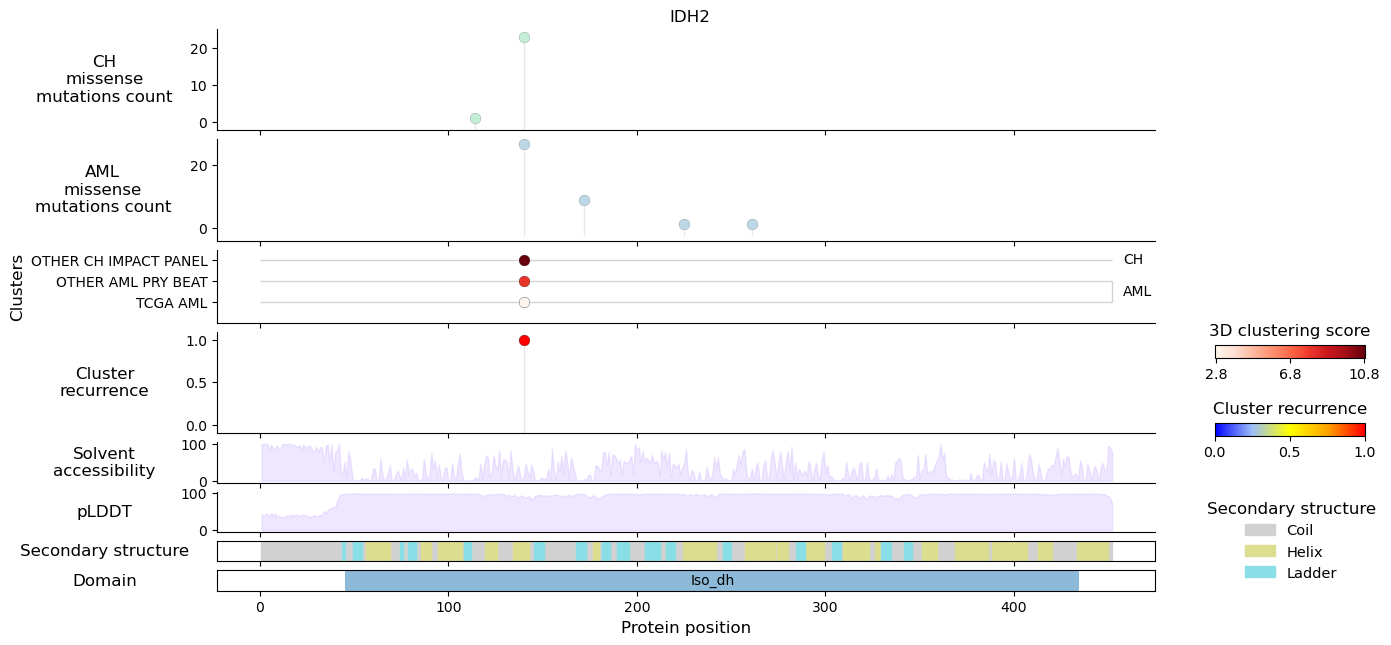

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


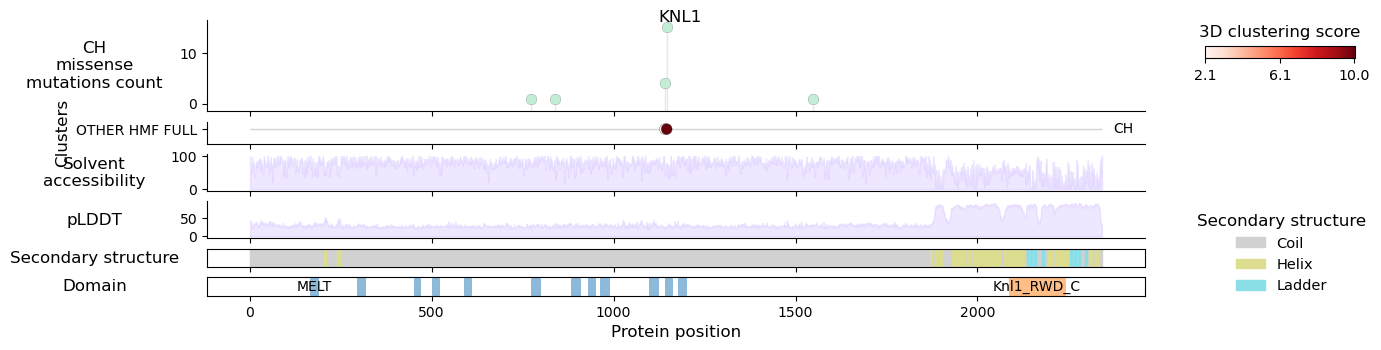

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


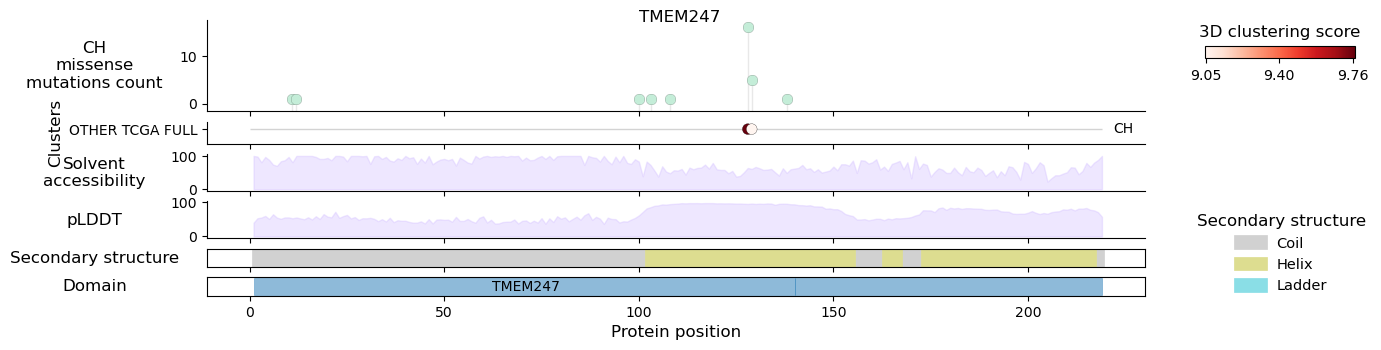

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


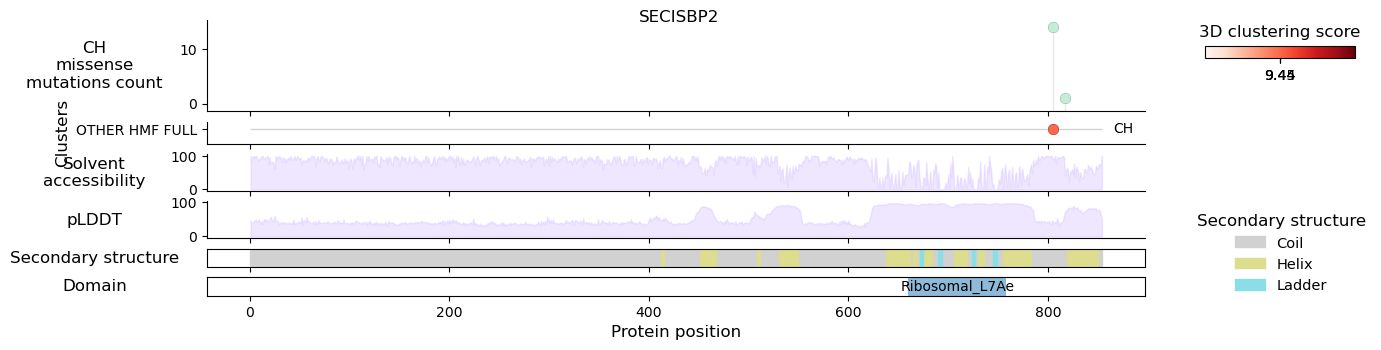

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


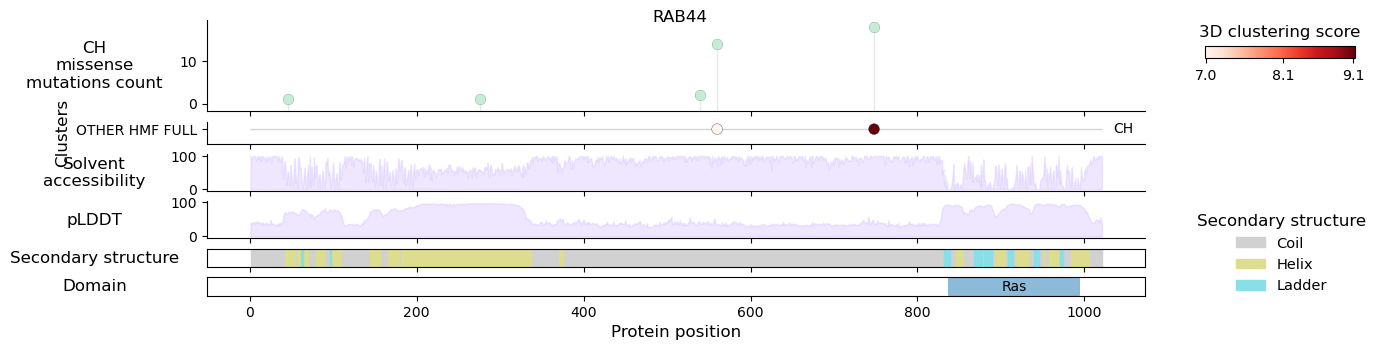

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


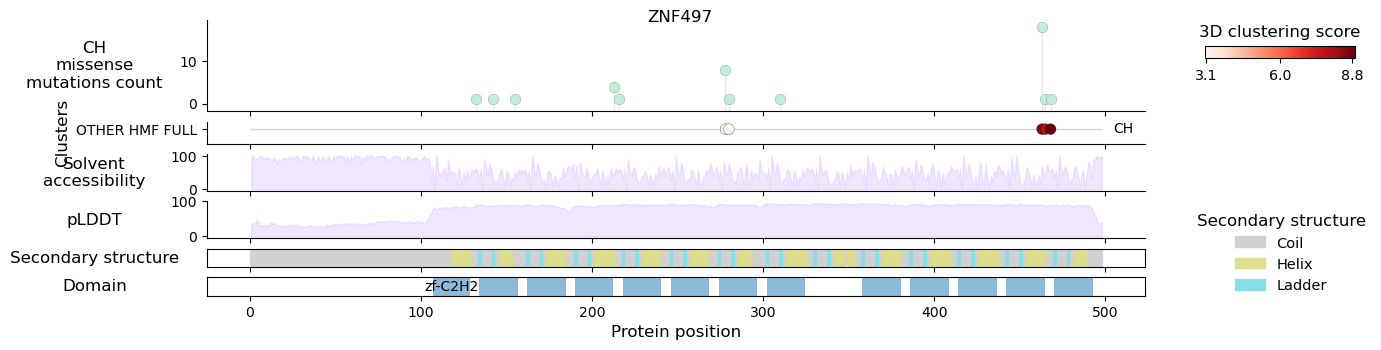

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


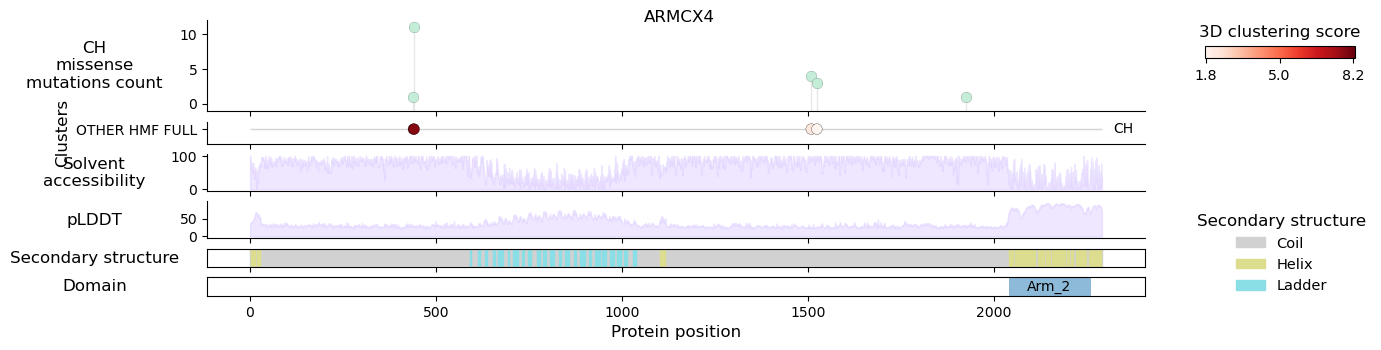

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


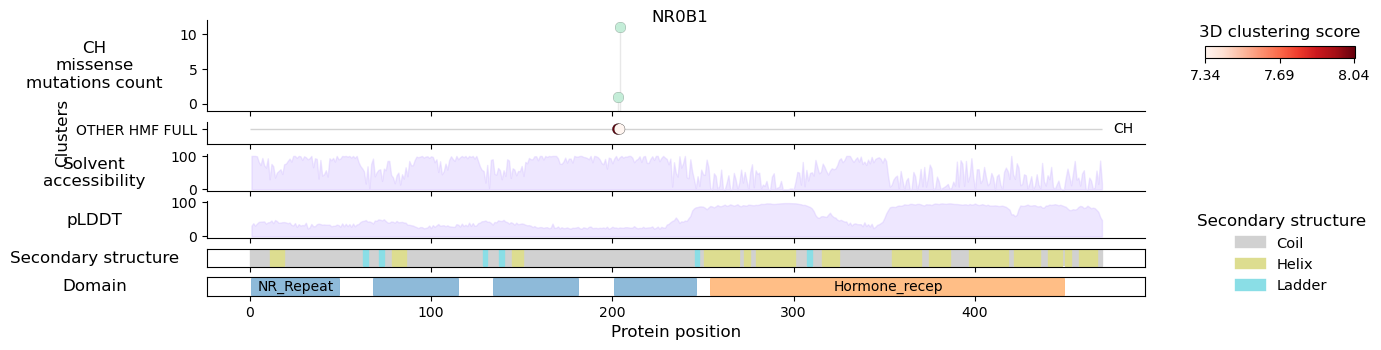

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


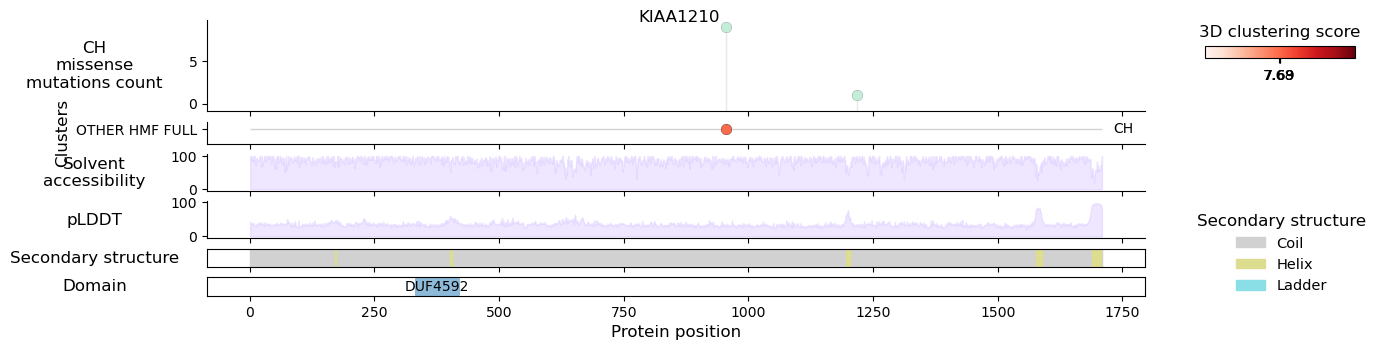

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


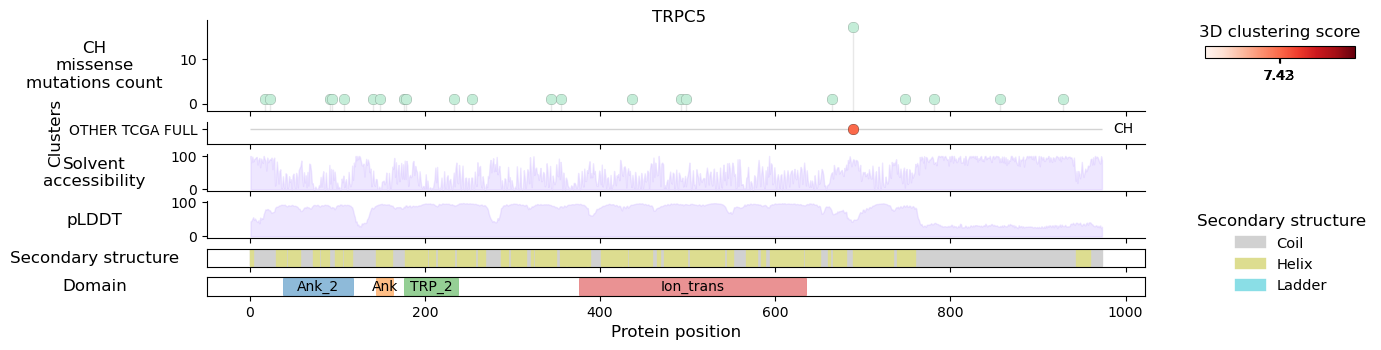

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


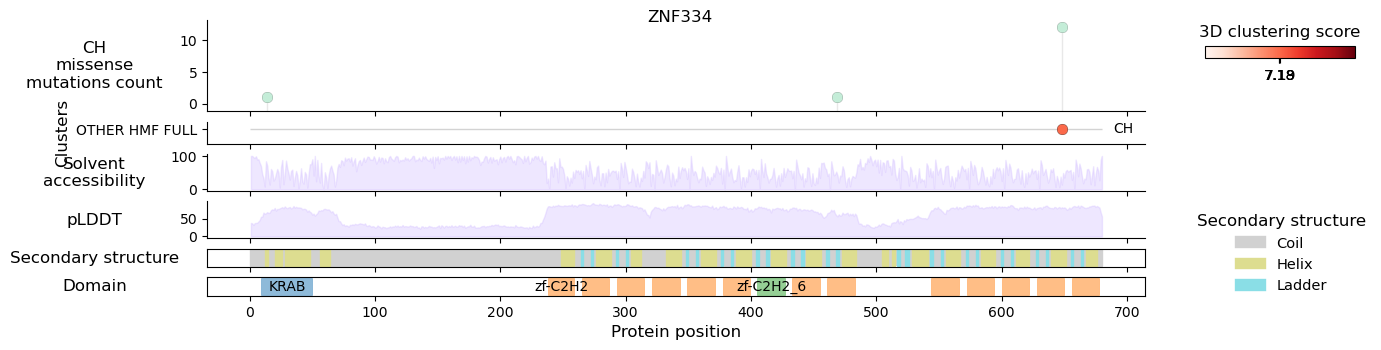

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


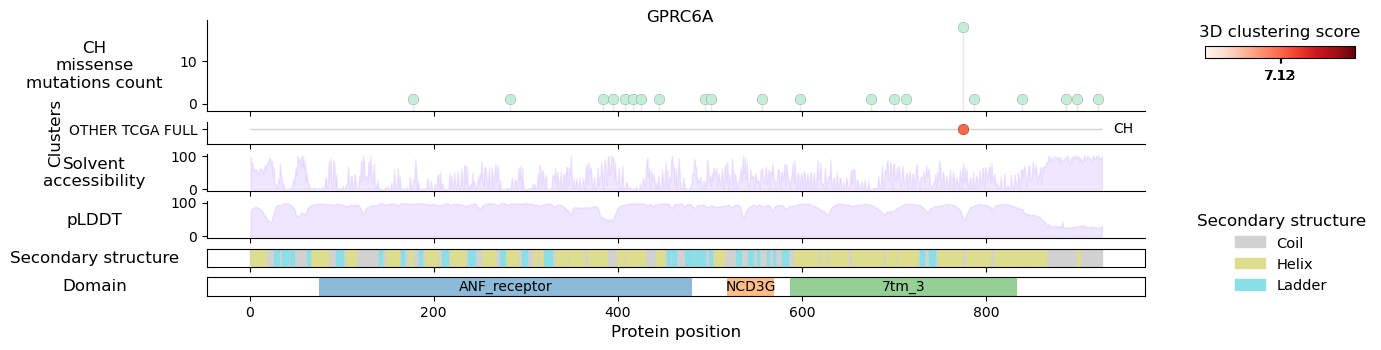

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


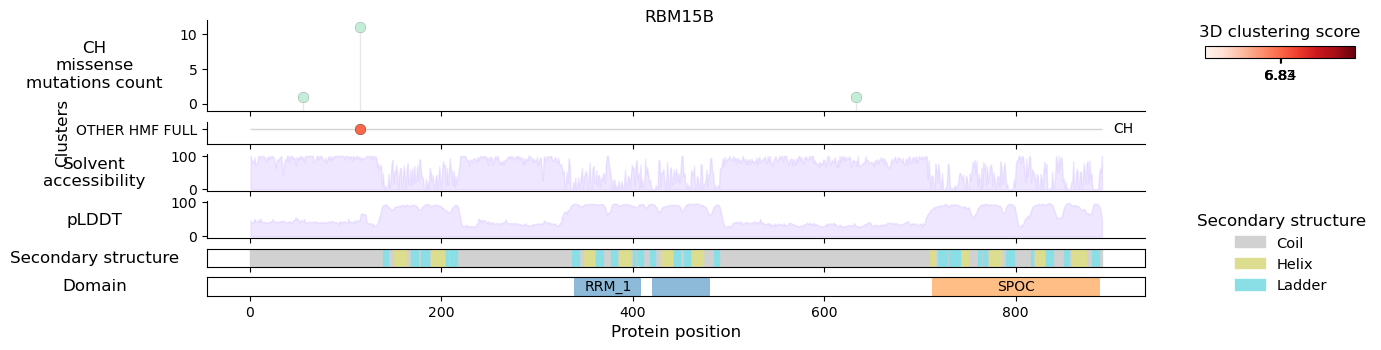

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


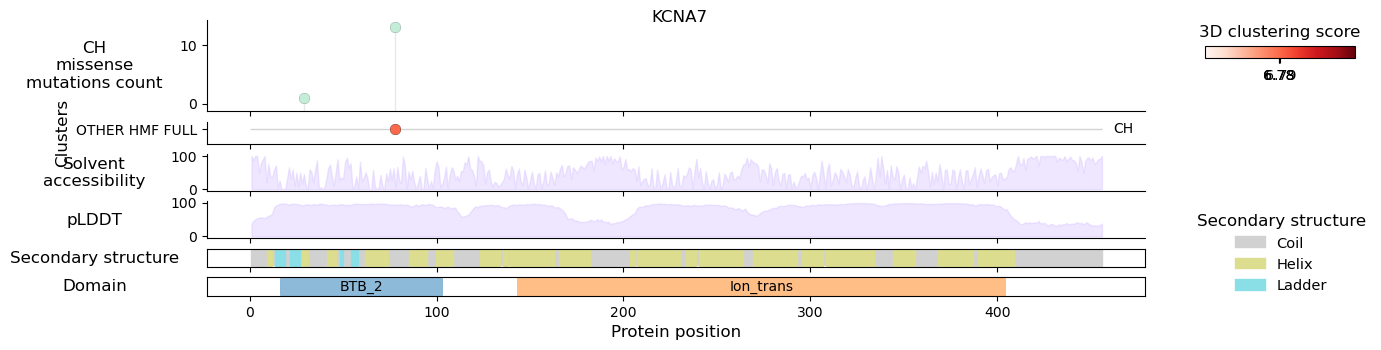

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


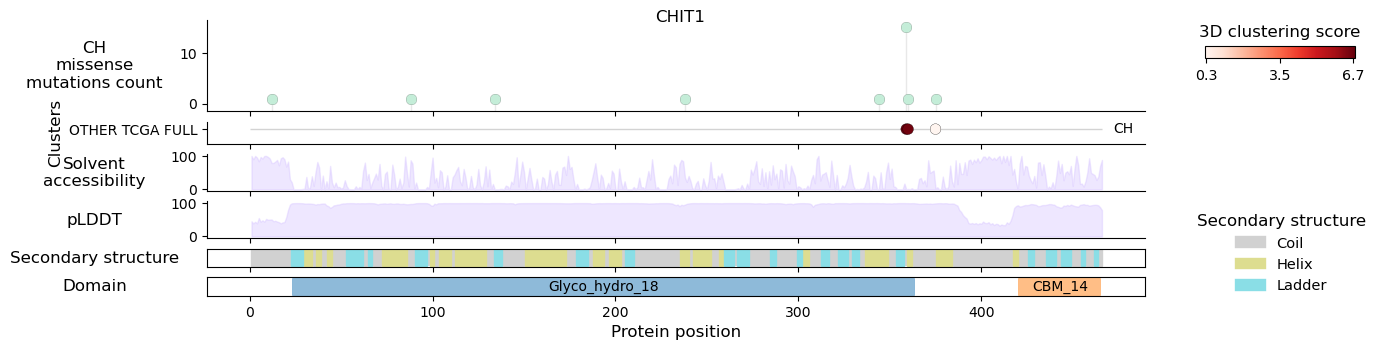

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


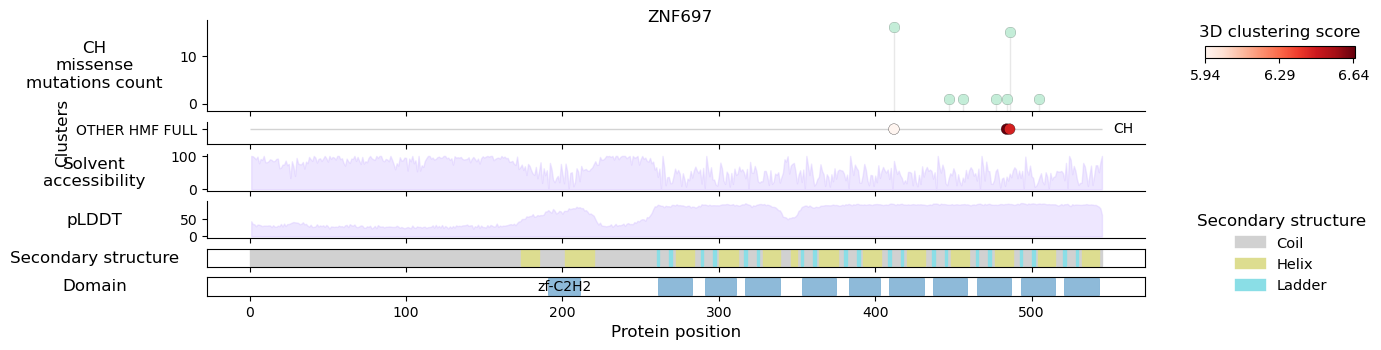

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


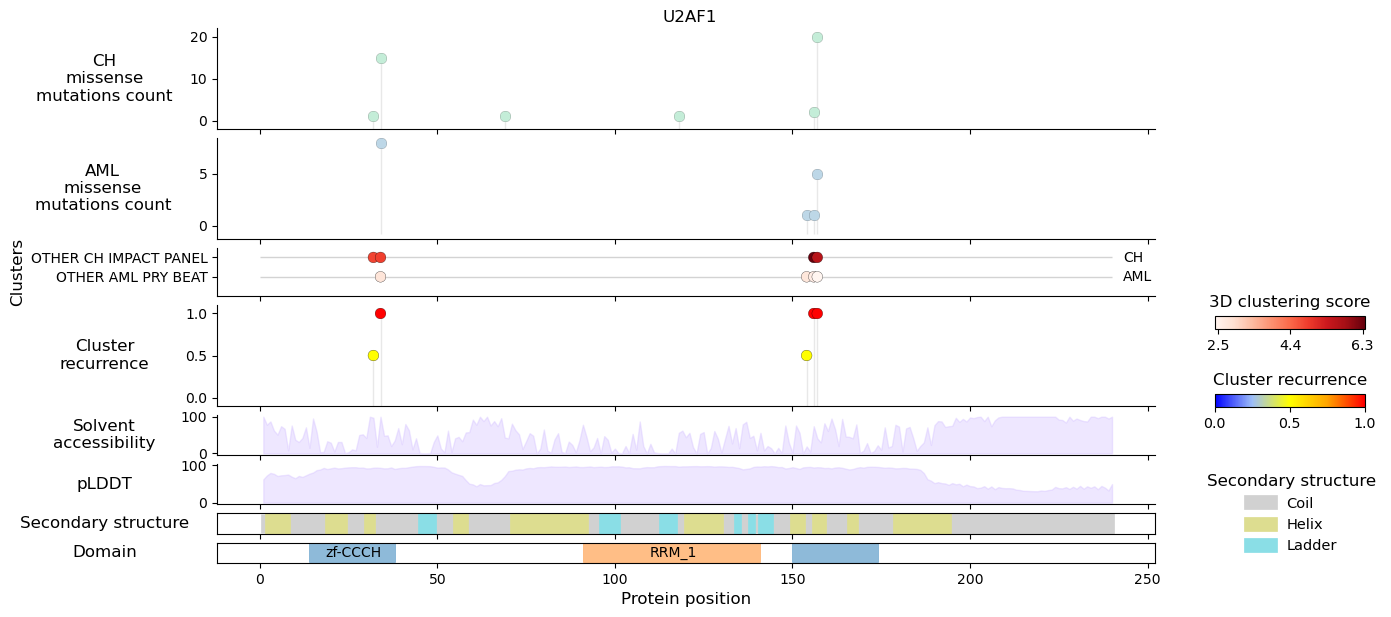

/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
/tmp/jobs/spellegrini/10373218/ipykernel_952499/883610938.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]


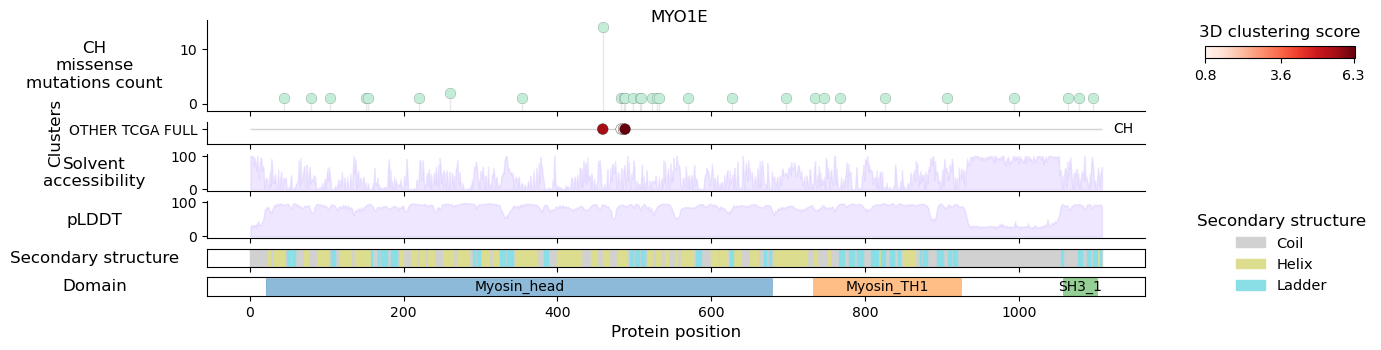

Gene, Uniprot ID tuple for cluster conservation: [('DNMT3A', 'Q9Y6K1'), ('EGFR', 'P00533'), ('SF3B1', 'O75533'), ('DNMT3A', 'Q9Y6K1'), ('SF3B1', 'O75533'), ('APOBR', 'Q0VD83')]


In [123]:
genes_cluster_conservation = ["DNMT3A", "SF3B1", "APOBR", "EGFR"]
ch_genes = ['DNMT3A', 'JAK2', 'SF3B1', 'GNAS', 'SRSF2', 'TP53', 'RASAL3', 'COL8A2',
            'SCART1', 'GPRIN2', 'PLEC', 'TET2', 'ZMAT1', 'APOBR', 'ZNF749',
            'C11orf95', 'MDM4', 'IDH2', 'KNL1', 'TMEM247', 'SECISBP2', 'RAB44',
            'ZNF497', 'ARMCX4', 'NR0B1', 'KIAA1210', 'TRPC5', 'ZNF334', 'GPRC6A',
            'RBM15B', 'KCNA7', 'CHIT1', 'ZNF697', 'U2AF1', 'MYO1E']

for gene in ch_genes:
    
    if gene != "GNAS":

        o3d_gene_dict = o3d_dict[gene] 
        
        if gene not in o3d_seq_df.Gene.values:
            cohort_1 = list(o3d_gene_dict.keys())[0]
            o3d_seq_df_gene = f"{o3d_ch_output_dir}/{cohort_1}/{cohort_1}.seq_df.processed.tsv"
            o3d_seq_df_gene = pd.read_table(o3d_seq_df_gene)
        else:
            o3d_seq_df_gene = o3d_seq_df.copy()

        uni_id, tr_id = o3d_seq_df_gene.loc[o3d_seq_df_gene["Gene"] == gene, ["Uniprot_ID", "Ens_Transcr_ID"]].values[0]
        pdb_tool_gene = o3d_pdb_tool_df[o3d_pdb_tool_df["Uniprot_ID"] == uni_id].reset_index(drop=True)
        domain_gene = o3d_annot_df[(o3d_annot_df["Gene"] == gene) & 
                                   (o3d_annot_df["Type"] == "DOMAIN") & 
                                   (o3d_annot_df["Evidence"] == "Pfam")].reset_index(drop=True)
        disorder_gene = disorder_df[disorder_df["Uniprot_ID"] == uni_id].reset_index(drop=True)
        if gene in ["EGFR", "ERBB2"]:
            domain_gene.Description = domain_gene.Description.replace("GF_recep_IV", "GF_recep_IV      ")
            domain_gene.Description = domain_gene.Description.replace("TM_ErbB1", "   TM_ErbB1")
        if gene in ["DNMT3A"]:
            domain_gene.Description = domain_gene.Description.replace("ADD_DNMT3", "ADD_DNMT3             ")
            domain_gene.Description = domain_gene.Description.replace("ADDz_Dnmt3b", "        ADDz_Dnmt3b")
        
        cohort_df_gene = cohort_all_ch_df[cohort_all_ch_df.COHORT.isin(o3d_gene_dict.keys())]

        if len(cohort_df_gene.GENERAL_CANCER_TYPE.unique()) == 1:
            cohort_df_gene = cohort_all_df[cohort_all_df.COHORT.isin(o3d_gene_dict.keys())]    
            cohort_df_gene["ORDER"] = cohort_df_gene.apply(lambda x: 2 if x.GENERAL_CANCER_TYPE == "CH" else 1 if x.GENERAL_CANCER_TYPE == "MYELOID" else 0, axis=1)
            cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]
            cohort_df_gene = cohort_df_gene.sort_values(["ORDER", "GENERAL_CANCER_TYPE", "CANCER_TYPE", "MAX_SCORE"], ascending=[True, True, True, False]).reset_index(drop=True)
        
        else:
            cohort_df_gene["MAX_SCORE"] = [o3d_gene_dict[cohort]["Result"].Score_obs_sim.max() for cohort in cohort_df_gene.COHORT]
            cohort_df_gene = cohort_df_gene.sort_values(["GENERAL_CANCER_TYPE", "MAX_SCORE"], ascending=[True, True]).reset_index(drop=True)

        o3d_gene_dict = {k: v for k, v in o3d_gene_dict.items() if k in cohort_df_gene.COHORT.values}
        missense_gene_df = missense_df[missense_df.Cohort.isin(o3d_gene_dict.keys())]
        missense_gene_df = missense_gene_df.groupby(['Gene', 'Pos']).size().reset_index(name='Count')
        missense_gene_df = missense_gene_df[missense_gene_df["Gene"] == gene]
        missense_gene_ch_df = missense_count_ch_df[missense_count_ch_df["Gene"] == gene]
        
        gene_conservation_df = plot_cluster_conservation_ch(o3d_gene_dict,
                                                           missense_gene_df,
                                                           missense_gene_ch_df,
                                                           domain_gene, 
                                                           pd.DataFrame(columns=['DEGRON']),
                                                           disorder_gene,
                                                           pdb_tool_gene,
                                                           cohort_df_gene,
                                                           gene,
                                                           plot_pars,
                                                           o3d_seq_df_gene,
                                                           title=gene,
                                                           absolute_score=True,
                                                           extend_clusters=True,
                                                           return_conservation_df=True)

        if gene in genes_cluster_conservation:
            attr_file_path = f"data/ch/{gene}.ch_clusters_conservation.defattr"
            write_defattr_file(attr_file_path, gene, uni_id, gene_conservation_df)
            uni_id_cluster_conservation.append((gene, uni_id))

print("Gene, Uniprot ID tuple for cluster conservation:", uni_id_cluster_conservation)